# Importações


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importando Dados

In [14]:
df1 = sns.load_dataset('fmri')
# df1 = df1.sort_values('timepoint')
df1.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [15]:
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [16]:
bovespa = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/bovespa.csv')

display(bovespa.shape)
display(bovespa.head())
display(bovespa.tail())
display(bovespa.Stock.value_counts())
display(bovespa.data.duplicated().sum())
display(bovespa.data.min(),bovespa.data.max())

(129, 3)

data  Stock  value
0  2020-01-02  VALE3  13.45
1  2020-01-03  VALE3  13.29
2  2020-01-06  VALE3  13.14
3  2020-01-07  VALE3  13.23
4  2020-01-08  VALE3  13.22

data  Stock   value
124  2020-03-03  DOLAR  4.4724
125  2020-03-04  DOLAR  4.5132
126  2020-03-05  DOLAR  4.5834
127  2020-03-06  DOLAR  4.6062
128  2020-03-09  DOLAR  4.5898

Stock
VALE3    43
PETR4    43
DOLAR    43
Name: count, dtype: int64

86

'2020-01-02'

'2020-03-09'

In [17]:

bovespa = pd.pivot(bovespa,columns=['Stock'],values='value',index='data').reset_index()
bovespa = bovespa.rename_axis('',axis='columns') # este rename é opcional
bovespa.head()

data   DOLAR      PETR4  VALE3
0  2020-01-02  4.0163  16.270000  13.45
1  2020-01-03  4.0234  15.990000  13.29
2  2020-01-06  4.0570  16.219999  13.14
3  2020-01-07  4.0604  16.059999  13.23
4  2020-01-08  4.0662  15.700000  13.22

In [18]:
IBOV = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/IBOV.csv')

display(IBOV.shape)
display(IBOV.head())
display(IBOV.data.min(),bovespa.data.max())

(43, 3)

data Stock     value
0  2020-01-02  IBOV  118573.0
1  2020-01-03  IBOV  117707.0
2  2020-01-06  IBOV  116878.0
3  2020-01-07  IBOV  116662.0
4  2020-01-08  IBOV  116247.0

'2020-01-02'

'2020-03-09'

In [19]:
IBOV = IBOV.rename(columns={'value':'IBOV'})
bovespa = pd.merge(bovespa, IBOV[['data','IBOV']], on='data')
display(bovespa.head())

data   DOLAR      PETR4  VALE3      IBOV
0  2020-01-02  4.0163  16.270000  13.45  118573.0
1  2020-01-03  4.0234  15.990000  13.29  117707.0
2  2020-01-06  4.0570  16.219999  13.14  116878.0
3  2020-01-07  4.0604  16.059999  13.23  116662.0
4  2020-01-08  4.0662  15.700000  13.22  116247.0

#### Corrigindo o formato de data

In [20]:
display(bovespa.dtypes)
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce')
display(bovespa.dtypes)

data      object
DOLAR    float64
PETR4    float64
VALE3    float64
IBOV     float64
dtype: object

data     datetime64[ns]
DOLAR           float64
PETR4           float64
VALE3           float64
IBOV            float64
dtype: object

In [21]:
wine = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/winemag-data-130k-v2.csv')

display(wine.shape)
display(wine.head())

(129971, 14)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [75]:
# Gapminder, https://www.gapminder.org/data/, é uma importante fonte de dados aberta que contêm diversas informações e índices relacionados ao desenvolvimento dos países.
# Aqui diversos dados já foram coletados e agregados e estaremos interessados em explorar unicamente algumas correlações dos dados. Correlações estão entre as primeiras e mais importantes análises bivariadas (relação entre duas variáveis) que devemos fazer sobre os dados e neste ponto você pode achar útil voltar na aula 2 quando estudamos covariância e correlação.desenvolvimento_Paises = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/gapminder_2015.csv')
desenvolvimento_Paises['cod_continent'] = desenvolvimento_Paises[['continent']].astype('category').apply(lambda x: x.cat.codes)
desenvolvimento_Paises.head()

continent        country  year  demox_eiu  income_per_person  invest_%_gdp  \
0    Africa       Botswana  2015       78.7              15700          32.1   
1    Africa   Burkina Faso  2015       47.0               1600          24.3   
2    Africa  Cote d'Ivoire  2015       33.1               3230          20.1   
3    Africa          Egypt  2015       31.8              10200          14.3   
4    Africa          Kenya  2015       53.3               2800          21.5   

   tax_%_gdp  gini_index  LifeExpect  HappyIdx  SchoolYears15_24  \
0       24.7        60.5        66.9     0.376              8.40   
1       15.1        35.5        60.7     0.442              3.76   
2       15.4        41.6        61.0     0.445              6.59   
3       12.5        31.2        70.2     0.476             10.60   
4       16.3        41.5        64.7     0.436              9.06   

   VacineBelieve  ChildMortality  Co2Emissions   CPI  Population  \
0            NaN            40.7         2.560  63.0     2120000   
1            NaN            86.8         0.182  38.0    18100000   
2            NaN            90.0         0.405  32.0    23200000   
3            NaN            23.6         2.370  36.0    92400000   
4            NaN            46.3         0.341  25.0    47900000   

   cod_continent  
0              0  
1              0  
2              0  
3              0  
4              0

In [115]:
beer = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')
beer.head()

state  year  barrels         type
0    AK  2008  2067.69  On Premises
1    AK  2009  2263.65  On Premises
2    AK  2010  1929.15  On Premises
3    AK  2011  2251.02  On Premises
4    AK  2012  2312.43  On Premises

In [141]:
boston = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BostonHousing.csv')
boston.drop(columns='b',inplace=True)
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [272]:
HM = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Projects/glassdoordata.csv')
HM.head()

jobtitle  gender  age  performance education      department  \
0     Graphic Designer  Female   18            5   College      Operations   
1    Software Engineer    Male   21            5   College      Management   
2  Warehouse Associate  Female   19            4       PhD  Administration   
3    Software Engineer    Male   20            5   Masters           Sales   
4     Graphic Designer    Male   26            5   Masters     Engineering   

   seniority  income  bonus  
0          2   42363   9938  
1          5  108476  11128  
2          5   90208   9268  
3          4  108080  10154  
4          5   99464   9319

# Conteudo

# Cuidado Valores sem ordem + ploat

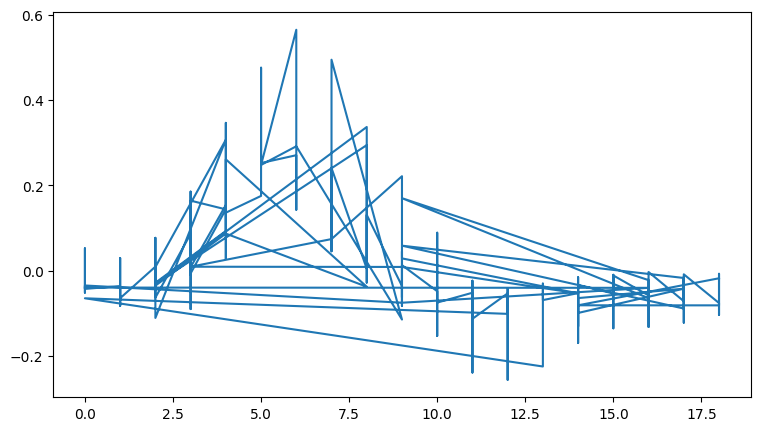

In [22]:
fig = plt.figure(figsize=(9,5))

mask = (df1.event == 'stim') & (df1.region == 'parietal')
x = df1[mask].timepoint
y = df1[mask].signal

plt.plot(x,y)
plt.show()

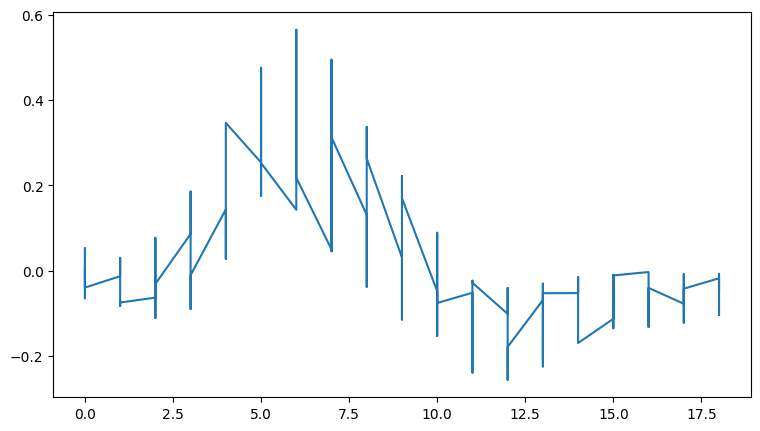

In [23]:
df1 = df1.sort_values('timepoint')
fig = plt.figure(figsize=(9,5))

mask = (df1.event == 'stim') & (df1.region == 'parietal')
x = df1[mask].timepoint
y = df1[mask].signal

plt.plot(x,y)
plt.show()

# Iterando no ax[i,j]

In [24]:
df = penguins

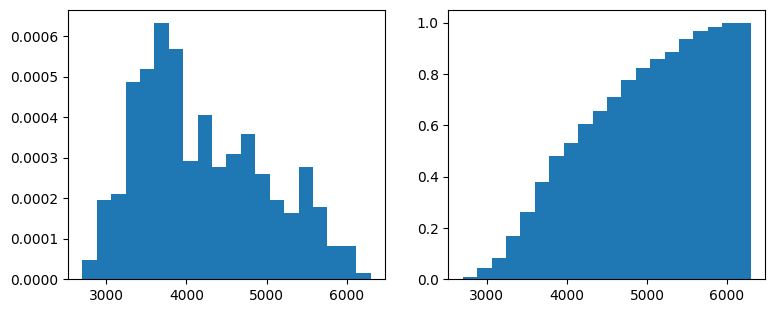

In [25]:
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
plt.hist(df.body_mass_g, density=True, bins=20)

plt.subplot(1,2,2)
plt.hist(df.body_mass_g, density=True, cumulative=True, bins=20)

plt.show()

`artist layer`.

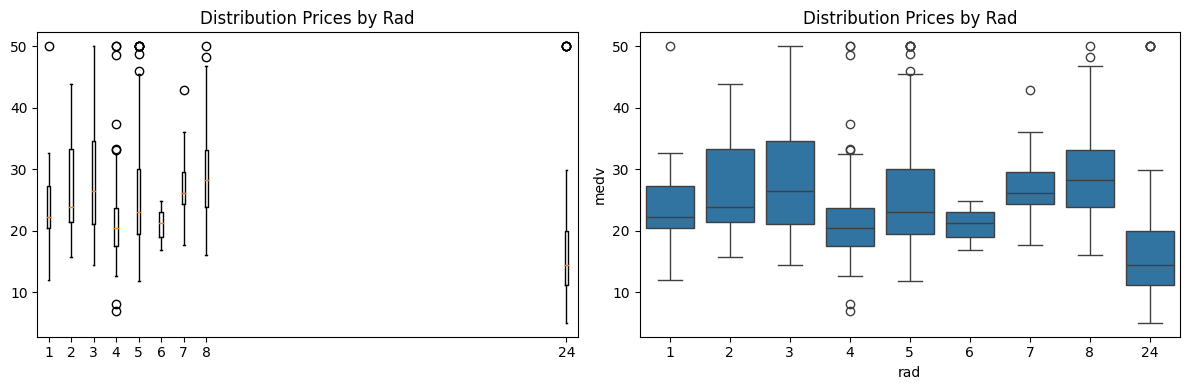

In [155]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

for r in boston['rad'].unique():
  ax[0].boxplot(boston[boston.rad == r]['medv'], positions=[r])

ax[0].set_title('Distribution Prices by Rad')

sns.boxplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

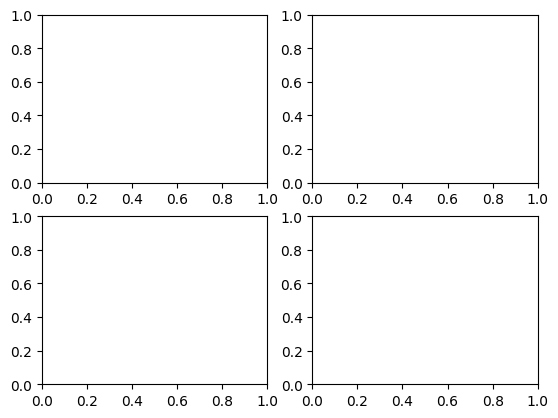

In [26]:
fig, ax = plt.subplots(2,2)
ax

In [27]:
ax.reshape(-1)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [28]:
( ax1, ax2 ) = ax
ax1

array([<Axes: >, <Axes: >], dtype=object)

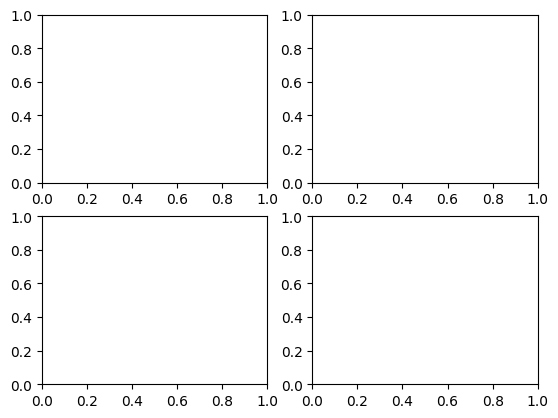

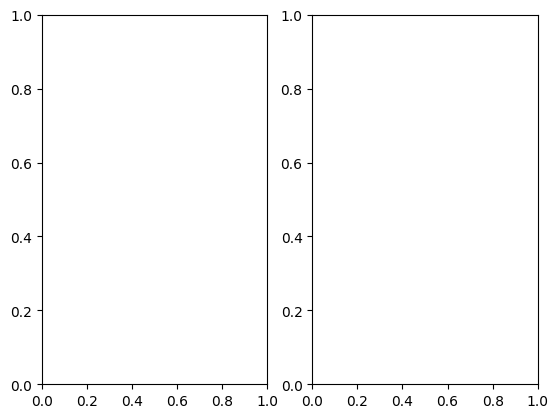

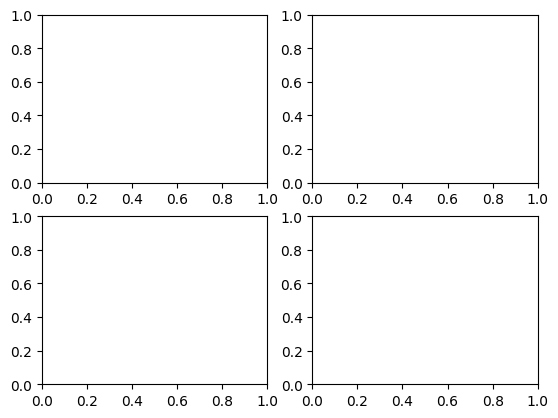

In [29]:
# using the variable axs for multiple Axes
fig, axs = plt.subplots(2, 2)

# using tuple unpacking for multiple Axes
fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

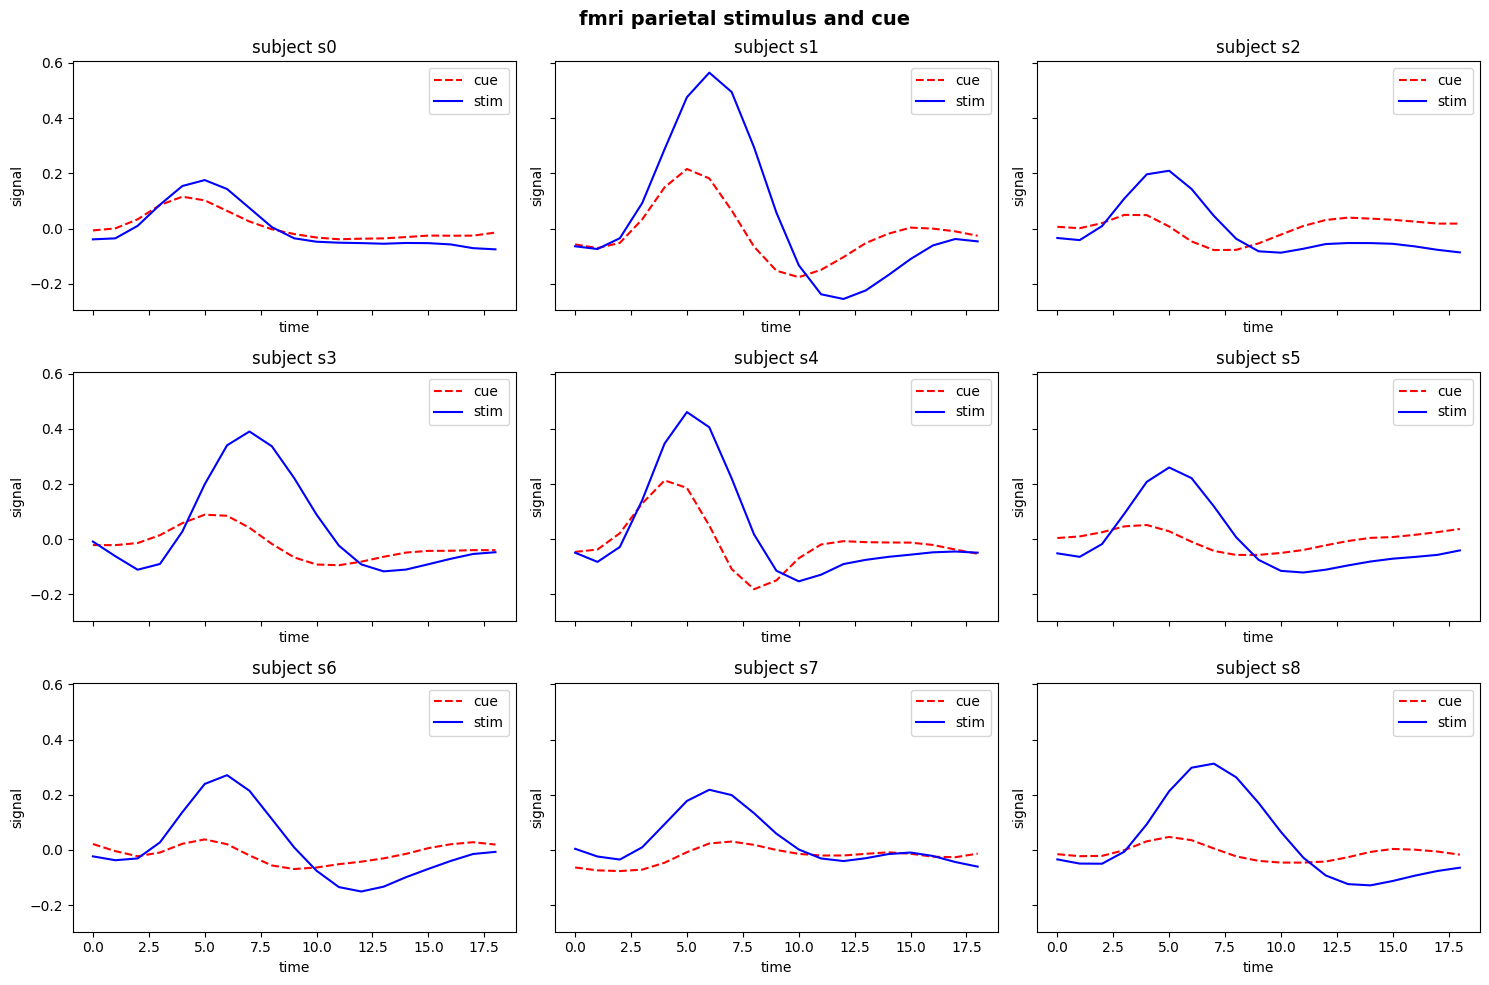

In [30]:
## Interando i e j

fig, ax= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

i_s = 0

for i in range(0,ax.shape[0]):
  for j in range(0,ax.shape[1]):

    s = 's' + str(i_s)

    for e in df1.event.unique():
      mask = (df1.subject == s) & (df1.event == e) & (df1.region == 'parietal')
      ax[i,j].plot(df1[ mask ].timepoint, df1[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

    ax[i,j].set_title('subject ' + s, fontsize=12)
    ax[i,j].set_xlabel('time')
    ax[i,j].set_ylabel('signal')
    ax[i,j].legend()

    i_s = i_s + 1

  plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_1.png')

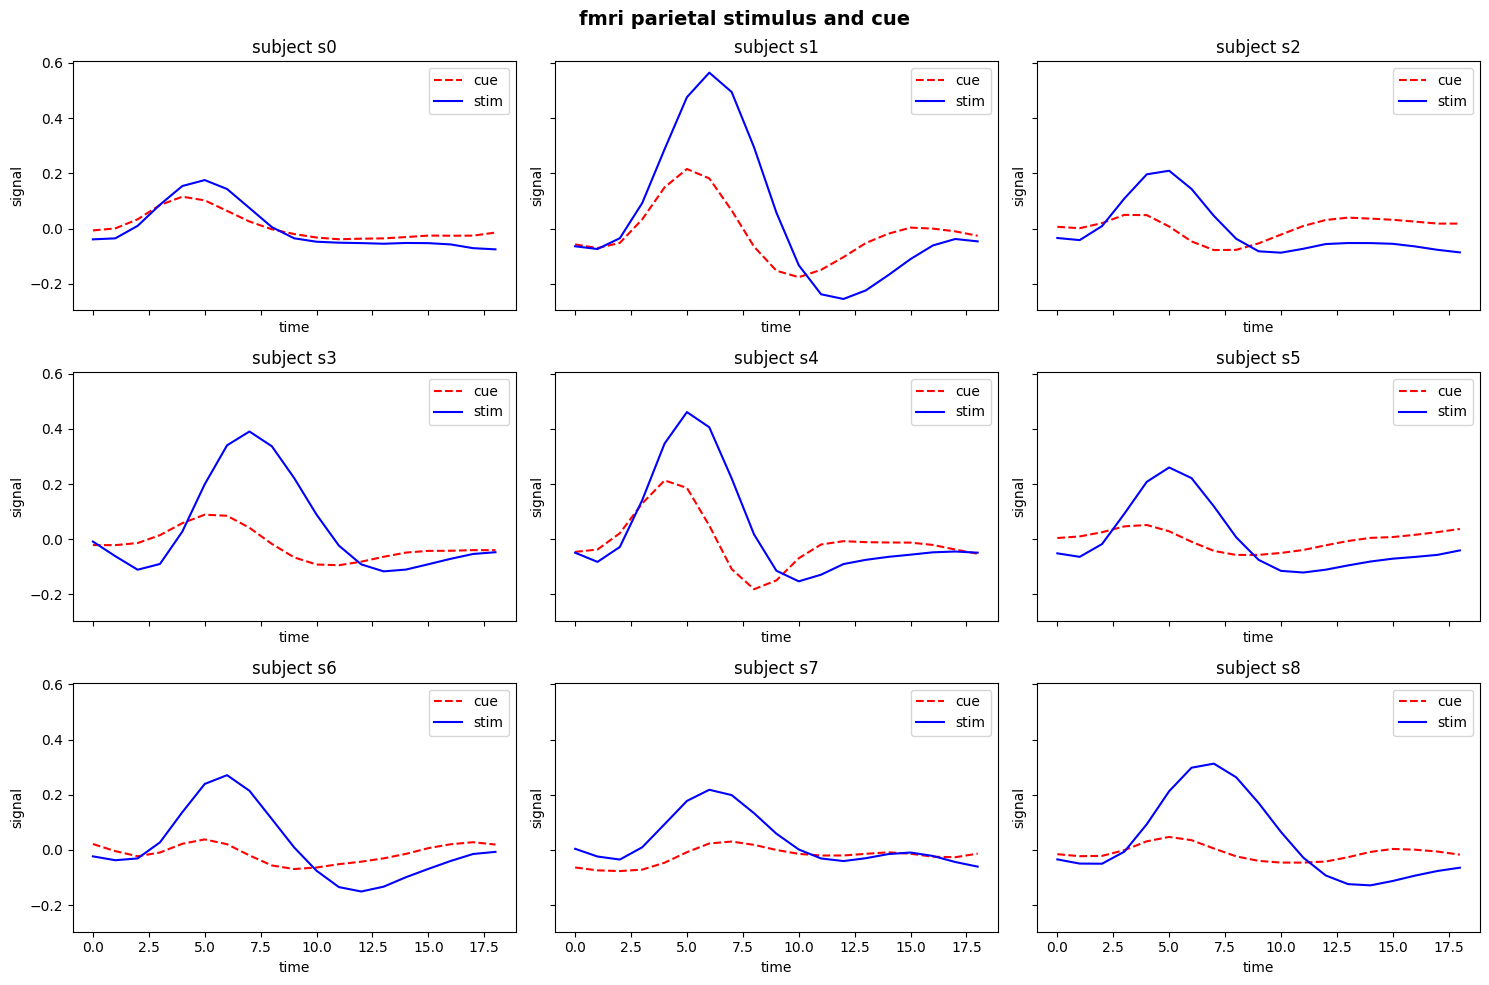

In [31]:
## Interando i
fig, axis= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

ax = axis.reshape(-1)

for i in range(0,9):
  s = 's' + str(i)

  for e in df1.event.unique():
    mask = (df1.subject == s) & (df1.event == e) & (df1.region == 'parietal')
    ax[i].plot(df1[ mask ].timepoint, df1[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

  ax[i].set_title('subject ' + s, fontsize=12)
  ax[i].set_xlabel('time')
  ax[i].set_ylabel('signal')
  ax[i].legend()

  plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_1.png')

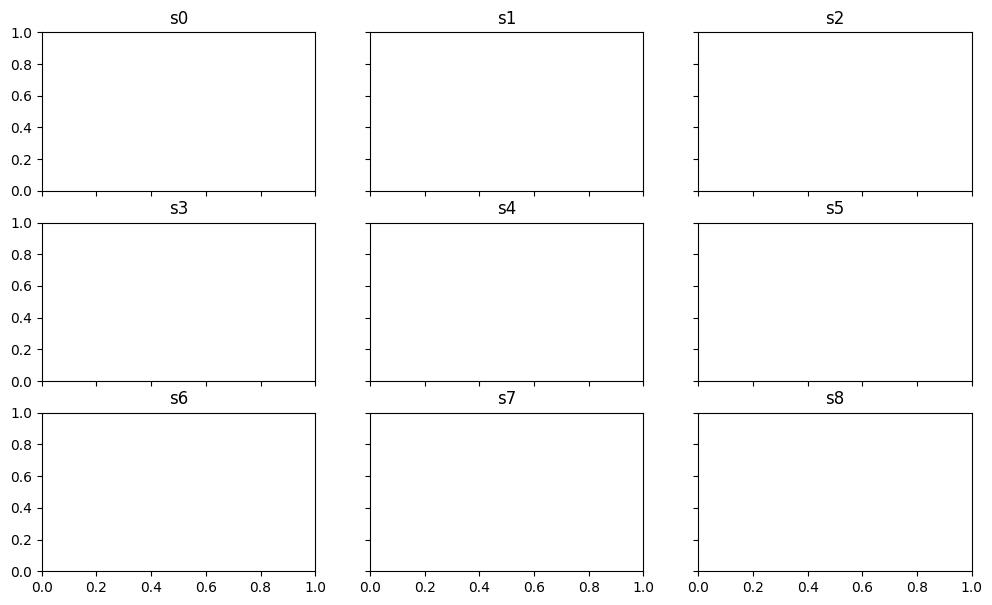

In [32]:
fig, ax = plt.subplots(3,3,figsize=(12,7),sharex=True,sharey=True)

for axis, s in zip(ax.reshape(-1),(['s' + str(x) for x in range(0,10)])):
  axis.set_title(s)

plt.show()


In [33]:
df1_mean = df1.groupby(['timepoint','event','region']).signal.mean().reset_index()
df1_mean.head()

timepoint event    region    signal
0          0   cue   frontal -0.013137
1          0   cue  parietal -0.023166
2          0  stim   frontal -0.005349
3          0  stim  parietal -0.024995
4          1   cue   frontal -0.015612

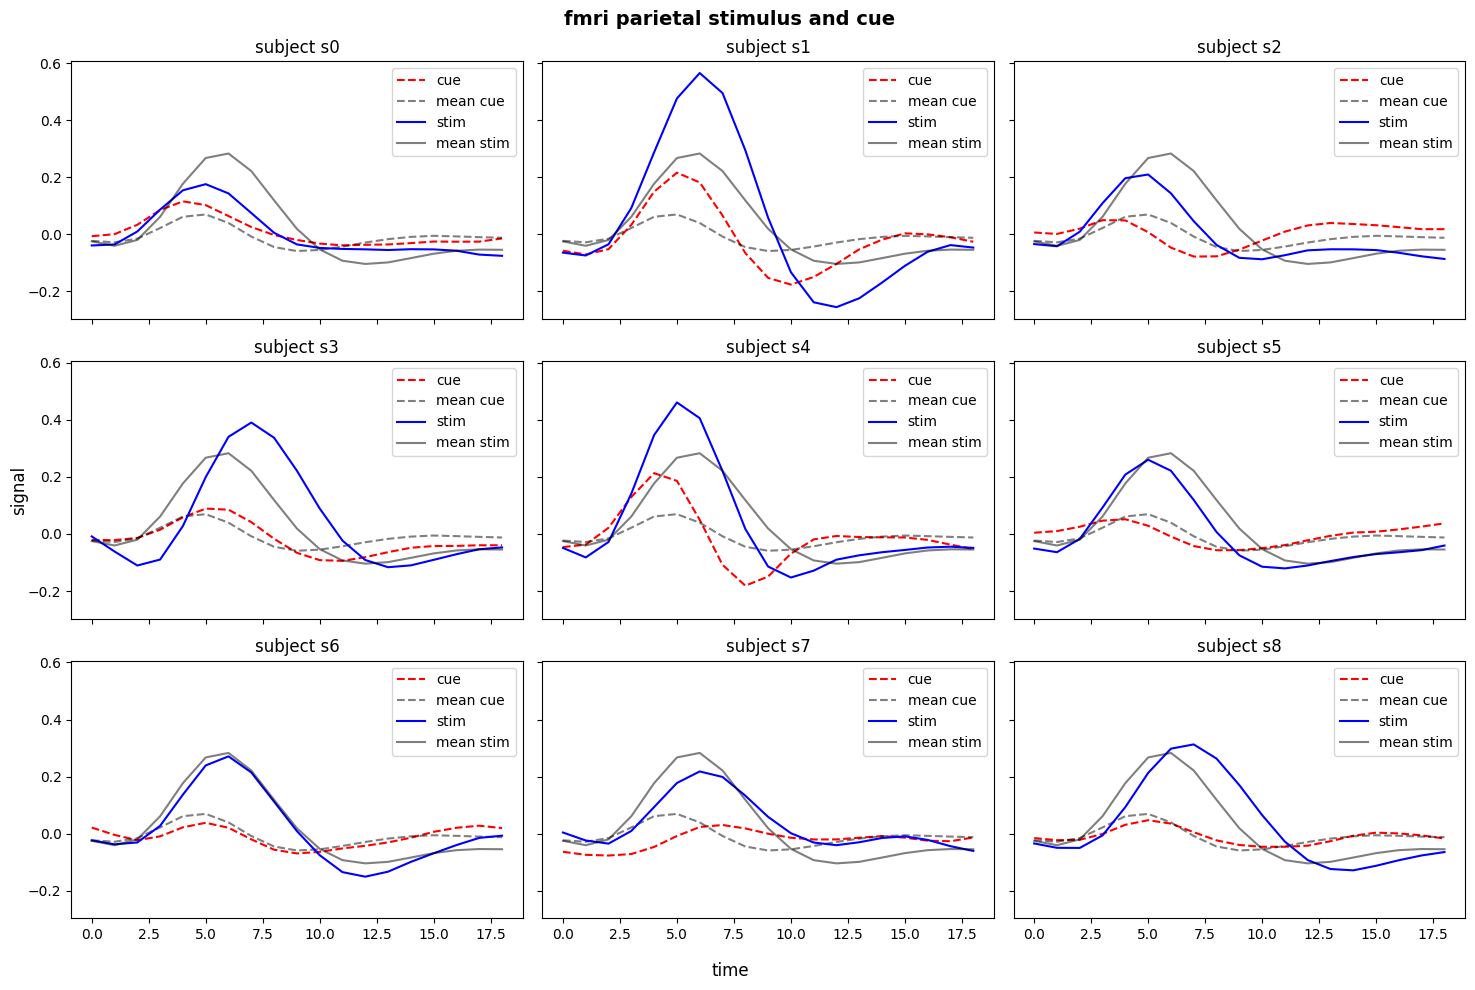

In [34]:
fig, axis= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

for ax, s in zip(axis.reshape(-1),(['s' + str(x) for x in range(0,10)])):

  for e in df1.event.unique():
    mask = (df1.subject == s) & (df1.event == e) & (df1.region == 'parietal')
    ax.plot(df1[ mask ].timepoint, df1[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

    mask = (df1_mean.event == e) & (df1_mean.region == 'parietal')
    ax.plot(df1_mean[ mask ].timepoint, df1_mean[ mask ].signal, color='k', linestyle=linestyle[e], label='mean ' + e, alpha=0.5)

  ax.set_title('subject ' + s, fontsize=12)
  ax.legend()

plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')
fig.supxlabel('time')
fig.supylabel('signal')

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_2.png')

In [35]:
%%capture
!pip install yfinance

In [36]:
import yfinance as yf

data = yf.download(['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BRL=X'],'2018-10-01','2022-03-01')

df = data['Adj Close'].reset_index()

[*********************100%%**********************]  5 of 5 completed


In [37]:
for c in ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']:
  df[c + '_USD'] = df[c] / df['BRL=X']

df.head()

Ticker       Date   BRL=X   ITUB4.SA  PETR4.SA   VALE3.SA    ^BVSP  \
0      2018-10-01  4.0527  22.874462  7.165787  39.436623  78624.0   
1      2018-10-02  4.0164  23.755449  7.786821  39.958961  81612.0   
2      2018-10-03  3.9395  24.830475  8.117812  39.142803  83273.0   
3      2018-10-04  3.9004  24.856693  8.196294  38.391941  82953.0   
4      2018-10-05  3.8739  24.772795  8.175817  37.536610  82322.0   

Ticker  ITUB4.SA_USD  PETR4.SA_USD  VALE3.SA_USD  
0           5.644252      1.768151      9.730950  
1           5.914613      1.938756      9.948950  
2           6.302951      2.060620      9.935982  
3           6.372858      2.101398      9.843078  
4           6.394795      2.110488      9.689618

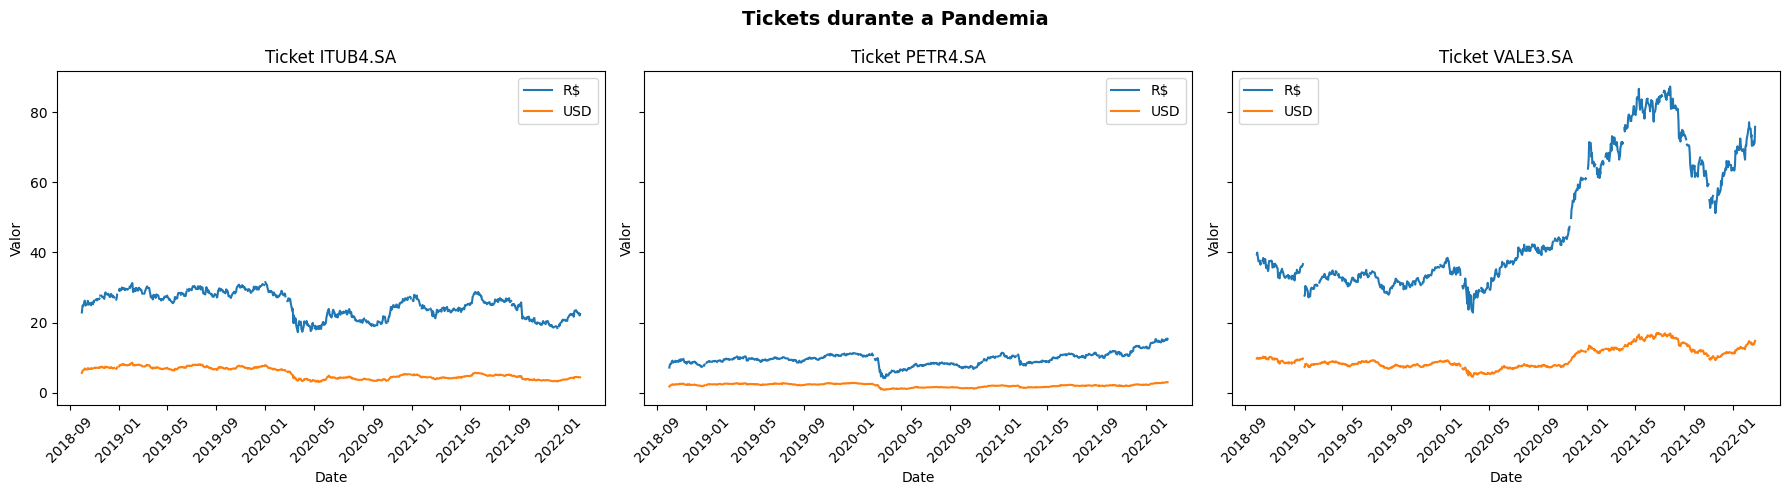

In [38]:
fig, ax= plt.subplots(1,3,figsize=(18,5),sharey=True)
for ax, c in zip(ax,['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']):
  ax.plot(df.Date, df[c], label='R$')
  ax.plot(df.Date, df[c + '_USD'], label='USD')

  ax.set_title('Ticket ' + c, fontsize=12)
  ax.set_xlabel('Date')
  ax.set_ylabel('Valor')
  ax.legend()

  ax.tick_params(axis='x', rotation=45)

plt.suptitle('Tickets durante a Pandemia', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_3.png')


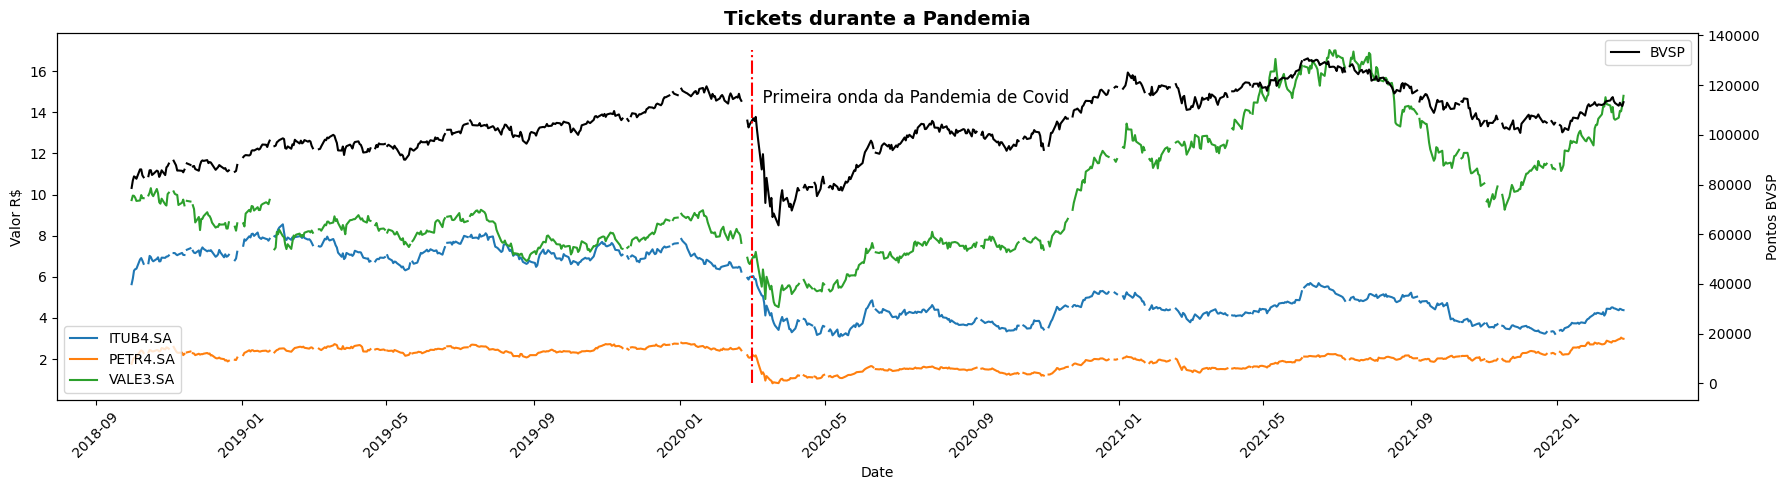

In [39]:
fig, ax= plt.subplots(figsize=(18,5))

for c in ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']:
  ax.plot(df.Date, df[c + '_USD'], label=c)

ax2 = ax.twinx()
ax2.plot(df.Date, df['^BVSP'], color='k', label='BVSP')

ax.set_xlabel('Date')
ax.set_ylabel('Valor R$')
ax2.set_ylabel('Pontos BVSP')
ax.legend(loc='lower left')
ax2.legend(loc='upper right')

ax.tick_params(axis='x', rotation=45)

plt.title('Tickets durante a Pandemia', fontsize=14, weight='bold')

plt.vlines( pd.to_datetime('2020-03-01') , 0, ax2.get_ylim()[1], color='r', linestyle='-.' )
plt.text( pd.to_datetime('2020-03-01') , 4* ax2.get_ylim()[1] / 5, '  Primeira onda da Pandemia de Covid', fontsize=12 )

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_6.png')

# Tipos de Grafico

## plt.plot

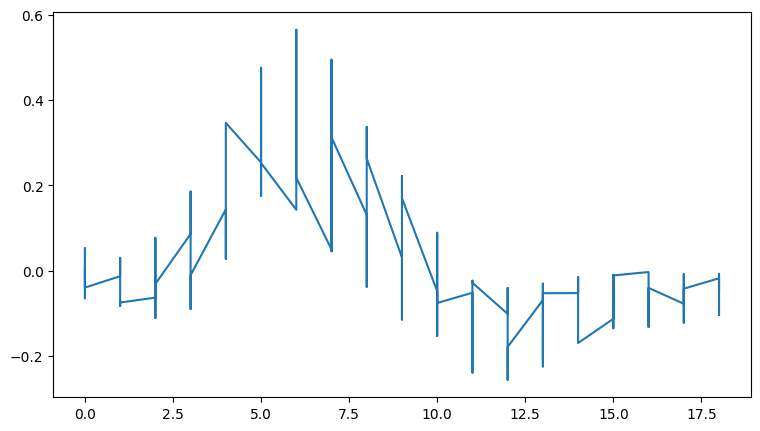

In [40]:
fig = plt.figure(figsize=(9,5))

mask = (df1.event == 'stim') & (df1.region == 'parietal')
x = df1[mask].timepoint
y = df1[mask].signal

plt.plot(x,y)
plt.show()

## `plt.scatter()`

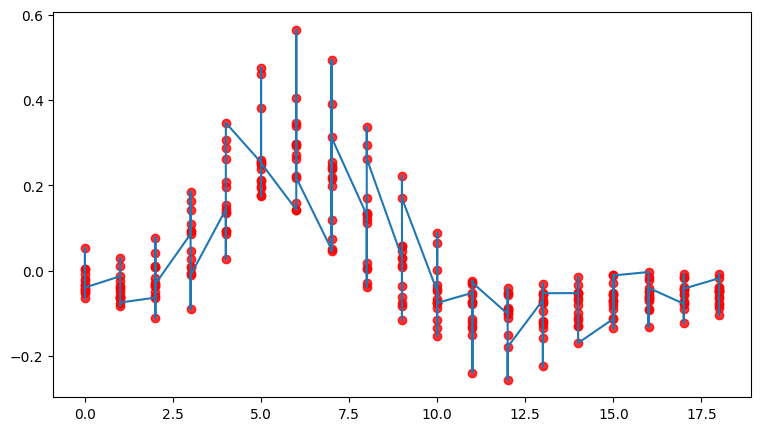

In [41]:
fig = plt.figure(figsize=(9,5))

mask = (df1.event == 'stim') & (df1.region == 'parietal')
x = df1[mask].timepoint
y = df1[mask].signal

plt.plot(x,y)
plt.scatter(x,y,color='r',alpha=0.8)
plt.show()

## `sns.lineplot()`
plota com o intervalo de confiança

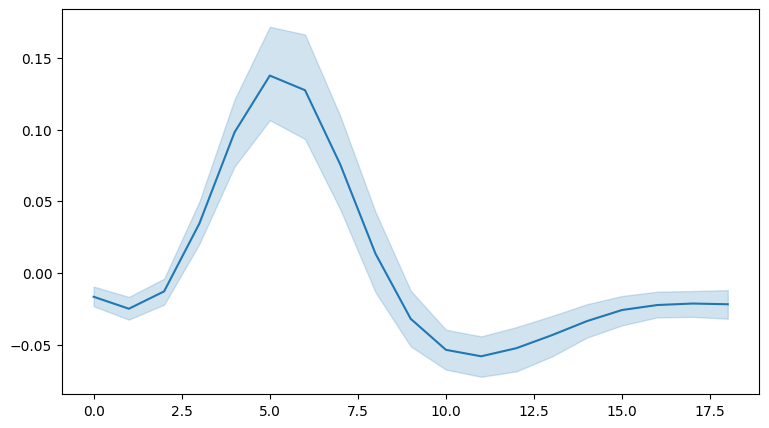

In [42]:
fig = plt.figure(figsize=(9,5))

x = df1.timepoint
y = df1.signal

sns.lineplot(x=x,y=y)

plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Grafico de Barras


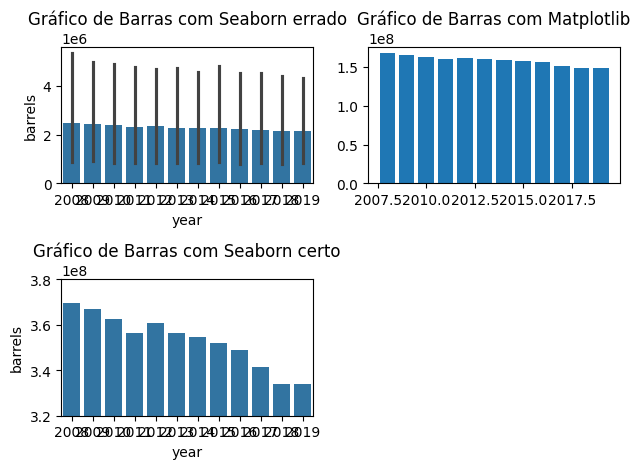

In [128]:
plt.figure()

plt.subplot(2,2,1)

sns.barplot(x='year', y='barrels', data=beer).set_title('Gráfico de Barras com Seaborn errado')
plt.subplot(2,2,2)

plt.bar(x='year', height='barrels', data=beer)
plt.title('Gráfico de Barras com Matplotlib')

plt.subplot(2,2,3)

sns.barplot(x='year', y='barrels', data=beer.groupby('year')[['barrels']].sum()).set_title('Gráfico de Barras com Seaborn certo')
plt.ylim([32e7, 38e7])



plt.tight_layout()
plt.show()

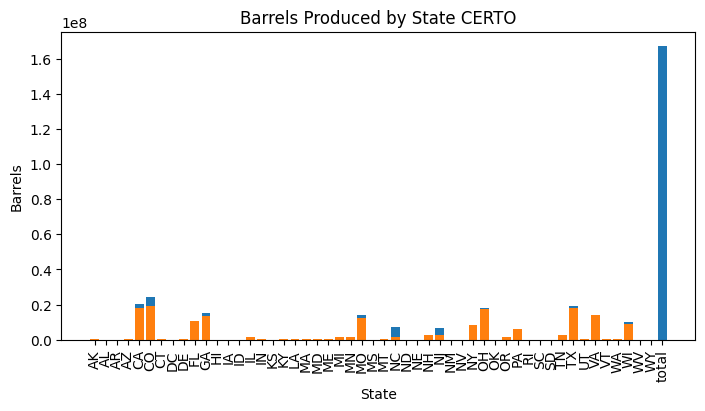

In [133]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,2)

plt.bar(beer.state, beer.barrels)
plt.xlabel('State')
plt.ylabel('Barrels')
plt.title('Barrels Produced by State ERRADO')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
beer_barrels_by_state = beer[ (beer.state != 'total') & (beer.year == 2019) ].groupby('state')['barrels'].sum().sort_values(ascending=False)

plt.bar(beer_barrels_by_state.index, beer_barrels_by_state.values)
plt.xlabel('State')
plt.ylabel('Barrels')
plt.title('Barrels Produced by State CERTO')
plt.xticks(rotation=90)
plt.show()


Classificando em categorias

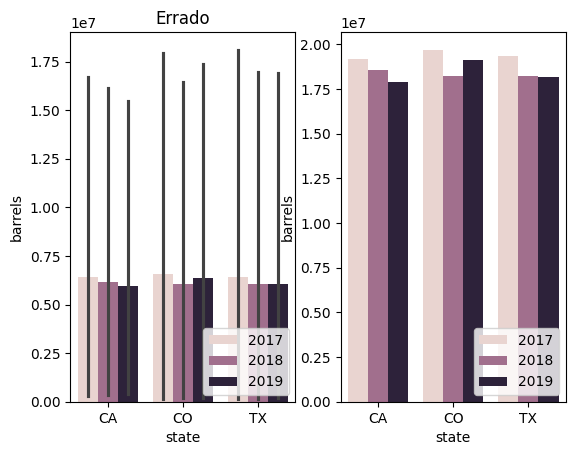

In [138]:
plt.subplot(1,2,1)

sns.barplot(x = 'state', y = 'barrels', hue = 'year',
            data = beer[beer['state'].isin(['TX', 'CO', 'CA']) & (beer['year'] >= 2017)]).set_title('Errado')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
beer_3 = beer[beer['state'].isin(['TX', 'CO', 'CA']) & (beer['year'] >= 2017)].groupby(['state', 'year'])['barrels'].sum().reset_index()
sns.barplot(x = 'state', y = 'barrels', hue = 'year', data = beer_3)
plt.legend(loc='lower right')
plt.show()
plt.show()

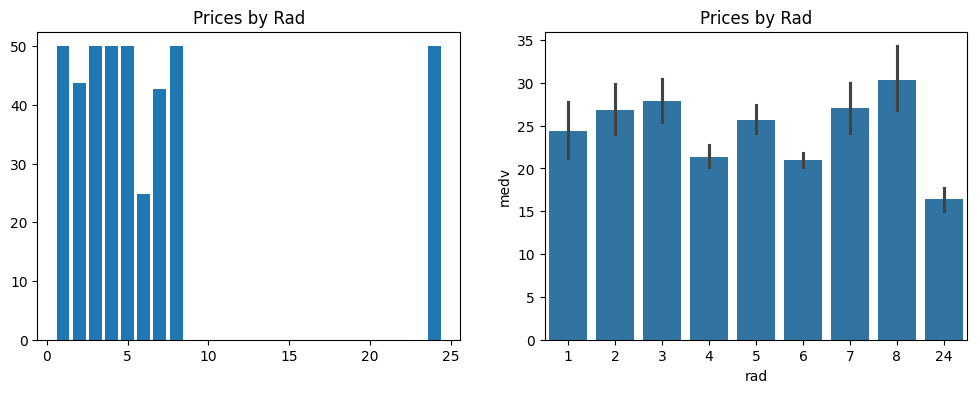

In [142]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

# depois tente empregar boston2 no matplotlib e entenda a diferença
# boston2 = boston.copy()
# boston2.rad = boston.rad.astype('str')


ax[0].bar(x='rad',height='medv',data=boston)
ax[0].set_title('Prices by Rad')

sns.barplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Prices by Rad')

plt.show()

In [145]:
boston_group= boston.groupby('rad').medv.mean()
boston_group

rad
1     24.365000
2     26.833333
3     27.928947
4     21.387273
5     25.706957
6     20.976923
7     27.105882
8     30.358333
24    16.403788
Name: medv, dtype: float64

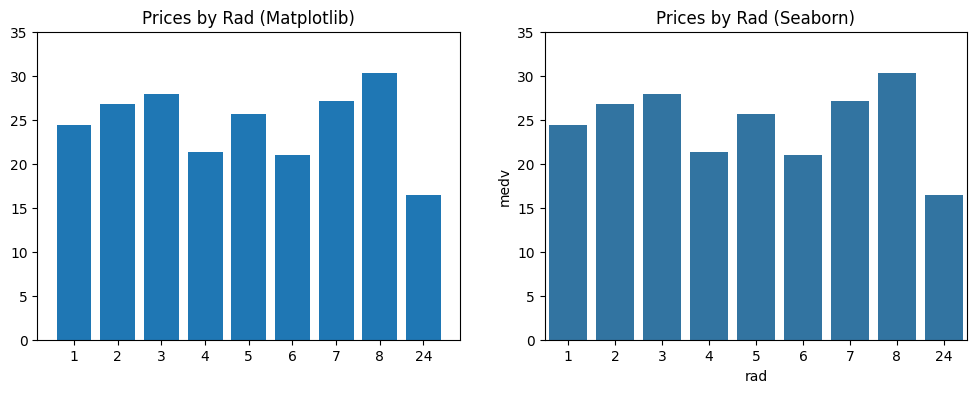

In [146]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].bar(x=np.arange(0,len(boston_group)),height=boston_group)
ax[0].set_xticks(np.arange(0,len(boston_group)), labels=boston_group.index)
ax[0].set_title('Prices by Rad (Matplotlib)')
ax[0].set_ylim([0,35])

sns.barplot(x='rad',y='medv',data=boston,ax=ax[1],errorbar=None)
ax[1].set_title('Prices by Rad (Seaborn)')
ax[1].set_ylim([0,35])

plt.show()

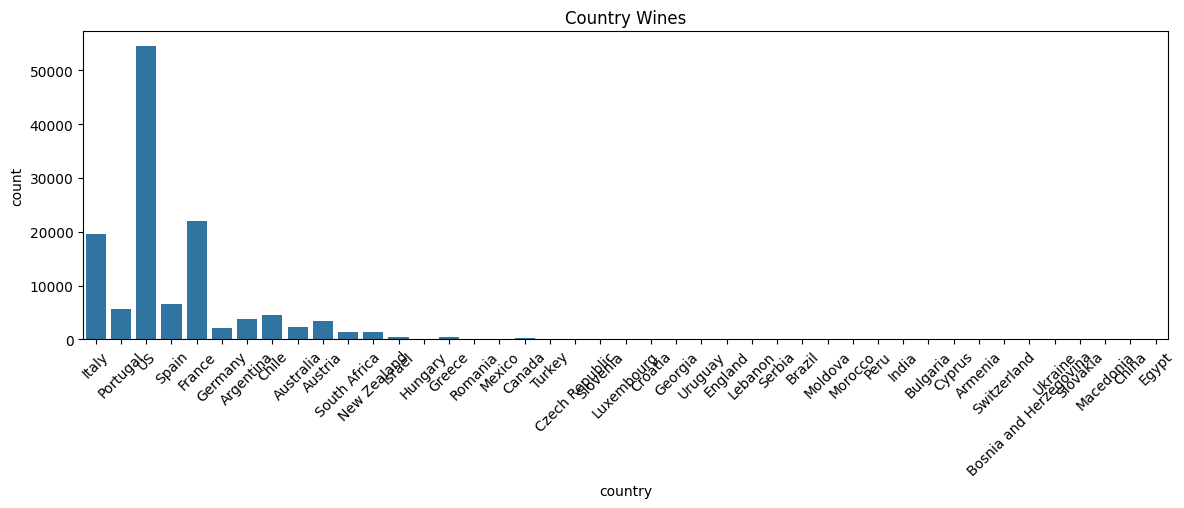

In [43]:
plt.figure(figsize=(14,4))
sns.countplot(x=wine.country)
plt.title('Country Wines')
plt.xticks(rotation=45)
plt.show()

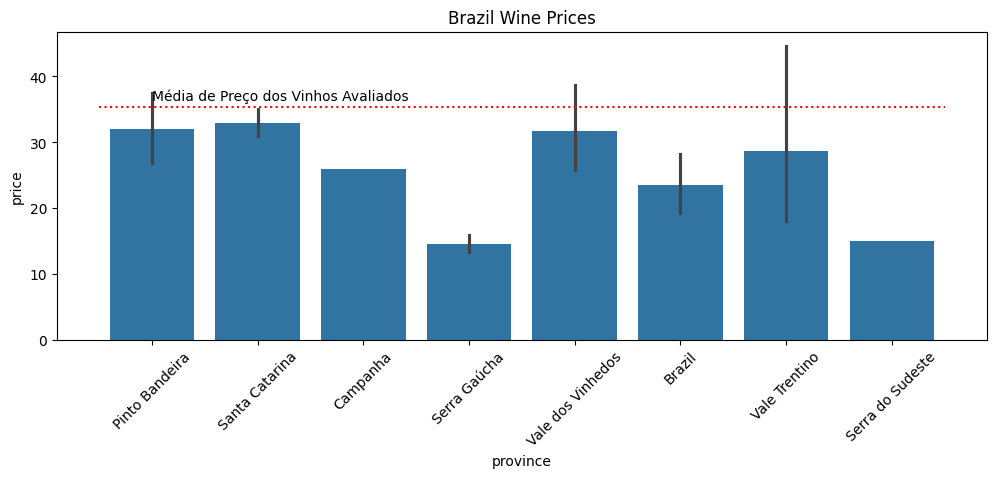

In [44]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine[wine.country == 'Brazil'].province, y=wine[wine.country == 'Brazil'].price)
plt.title('Brazil Wine Prices')
plt.hlines(wine.price.mean(),-0.5,7.5,color='r',linestyles=':')
plt.text(0, wine.price.mean()+1,'Média de Preço dos Vinhos Avaliados')
plt.xticks(rotation=45)
plt.show()

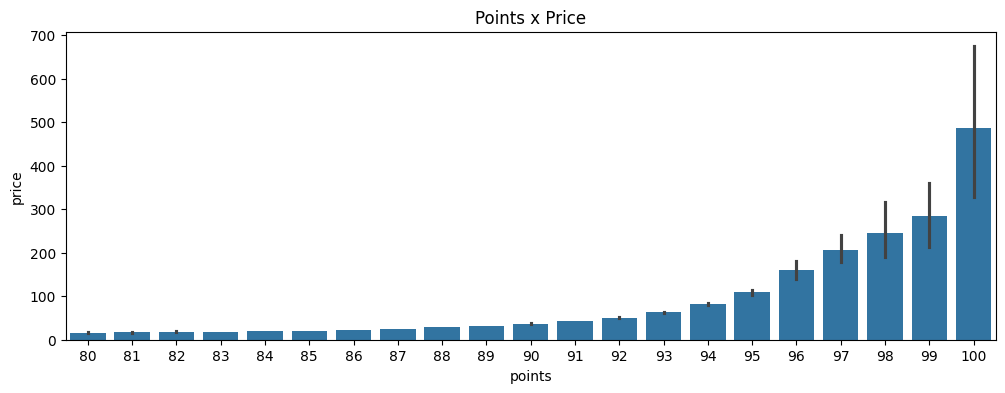

In [45]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine.points, y=wine.price)
plt.title('Points x Price')
plt.show()

CUIDADO

Novamente a visualização falha em mostrar adequadamente os dados, mas aqui o refinamento é bastante simples e basta reconfigurarmos os limites do eixo de pontos.

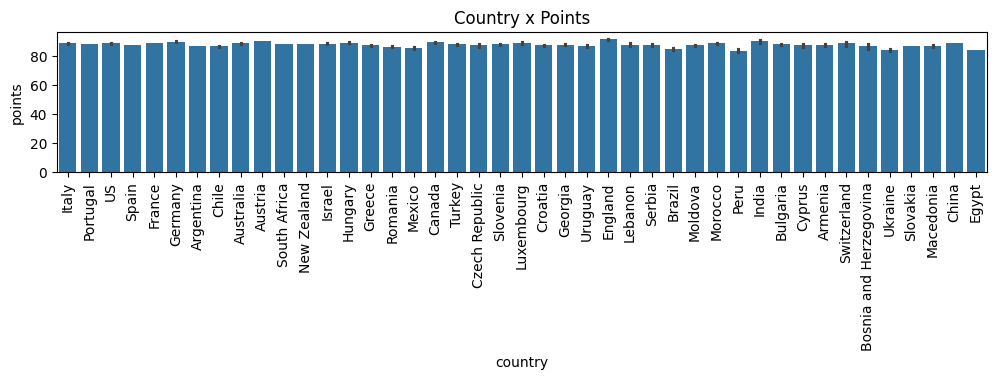

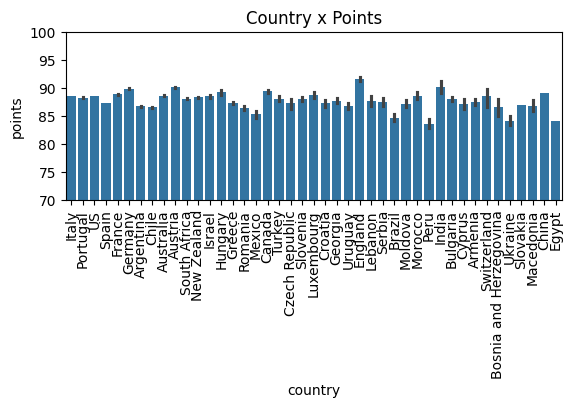

In [46]:
plt.figure(figsize=(12,4))

plt.subplot(2,1,1)
sns.barplot(x=wine.country, y=wine.points)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.show()

plt.subplot(2,1,2)
sns.barplot(x='country', y='points', data=wine)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.ylim([70,100])
plt.show()

##### Enfeites

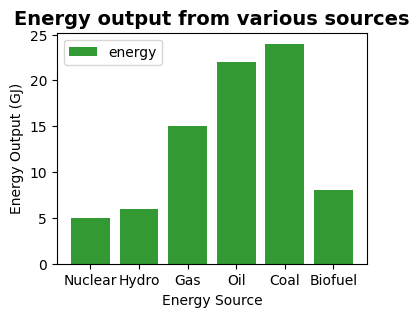

In [164]:
# Basico
plt.figure(figsize=(4,3))
energy_type = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]
consumo = [4.5, 30, 30, 12, 14, 6.7]

plt.bar(energy_type, energy, color='green',alpha=0.8, label='energy')
plt.legend()
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various sources", fontsize=14, weight='bold')

plt.show()

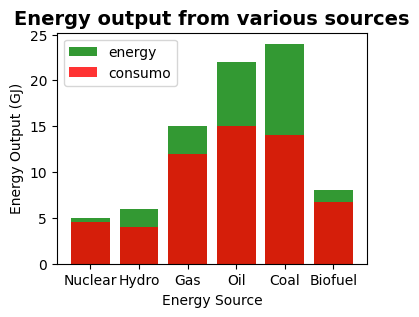

In [166]:
# Sobreposição de barras
plt.figure(figsize=(4,3))
energy_type = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]
consumo = [4.5, 4, 12, 15, 14, 6.7]

plt.bar(energy_type, energy, color='green',alpha=0.8, label='energy')
plt.bar(energy_type, consumo, color='red',alpha=0.8,label='consumo')
plt.legend()
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various sources", fontsize=14, weight='bold')

plt.show()

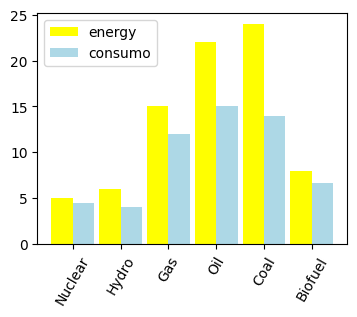

In [167]:
# barras paralelas

plt.figure(figsize=(4,3))

ind = np.arange(len(energy))
barwidth = 0.45

plt.bar(ind, energy, barwidth, label='energy', color='yellow')
plt.bar(ind + barwidth, consumo, barwidth, label='consumo', color='lightblue')

plt.xticks(ind + barwidth / 2,energy_type, rotation=60)
plt.legend()


plt.show()
#  seaborn com hue.

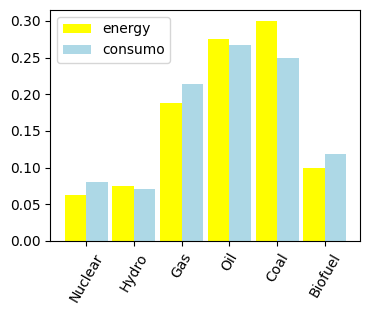

In [168]:
# Porporcional

plt.figure(figsize=(4,3))

ind = np.arange(len(energy))
barwidth = 0.45

plt.bar(ind, np.array(energy)/np.array(energy).sum(), barwidth, label='energy', color='yellow')
plt.bar(ind + barwidth, np.array(consumo)/np.array(consumo).sum(), barwidth, label='consumo', color='lightblue')

plt.xticks(ind + barwidth / 2,energy_type, rotation=60)
plt.legend()


plt.show()

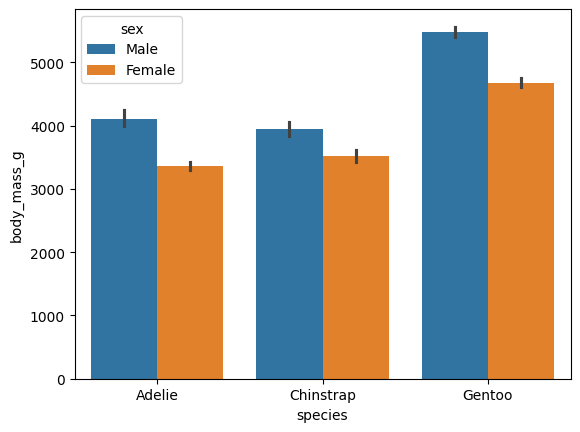

In [172]:
sns.barplot(x='species',y='body_mass_g',hue='sex',data=penguins)
plt.show()

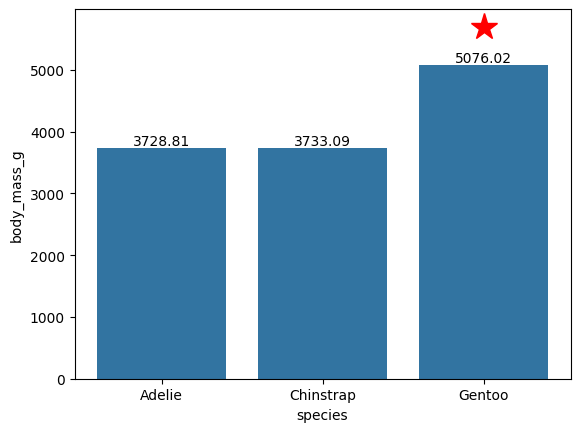

In [173]:
ax = sns.barplot(x='species',y='body_mass_g',data=penguins, errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
ax.plot(2, 5700, "*", markersize=20, color="r")

plt.show()

## BoxPlot

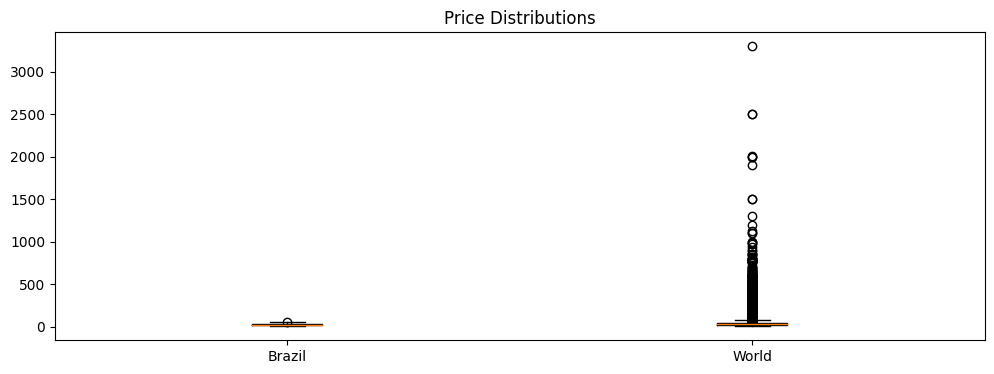

In [47]:
wine_not_null = wine[ ~ np.isnan( wine.price ) ]

plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price,positions=[1])
plt.boxplot(wine_not_null.price,positions=[2])
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

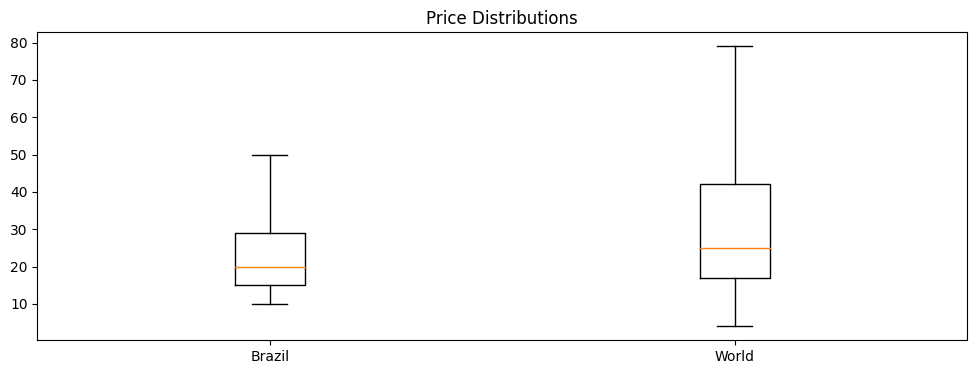

In [48]:
plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price,positions=[1],showfliers=False)
plt.boxplot(wine_not_null.price,positions=[2],showfliers=False)
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

CUIDADO !!!

SE O DF TIVER VALORES NULOS ELE DÁ ERRO E NÃO MOSTRA O GRÁFICO

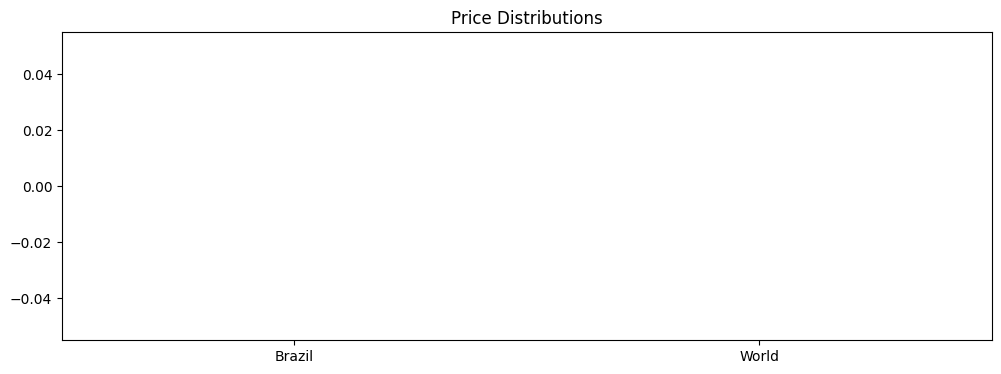

In [49]:
plt.figure(figsize=(12,4))
plt.boxplot(wine[wine.country == 'Brazil'].price,positions=[1])
plt.boxplot(wine.price,positions=[2])
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

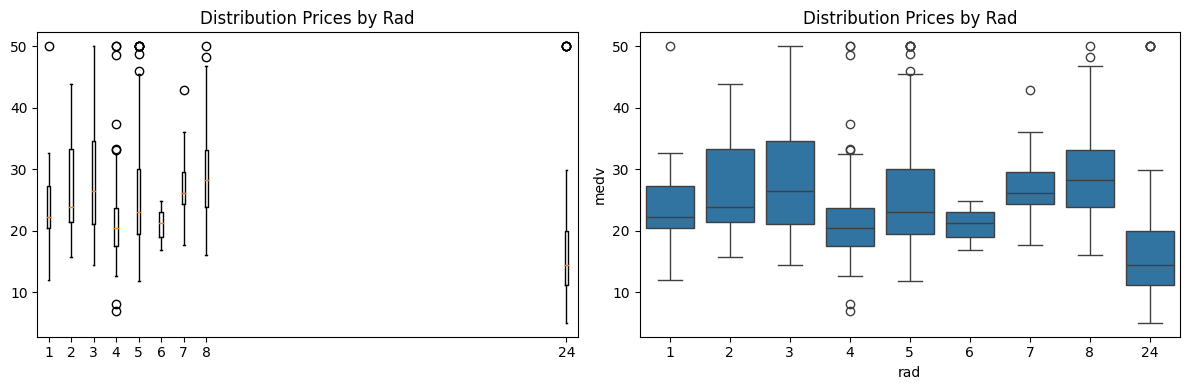

In [154]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

for r in boston['rad'].unique():
  ax[0].boxplot(boston[boston.rad == r]['medv'], positions=[r])

ax[0].set_title('Distribution Prices by Rad')

sns.boxplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

KeyError: 'rad'

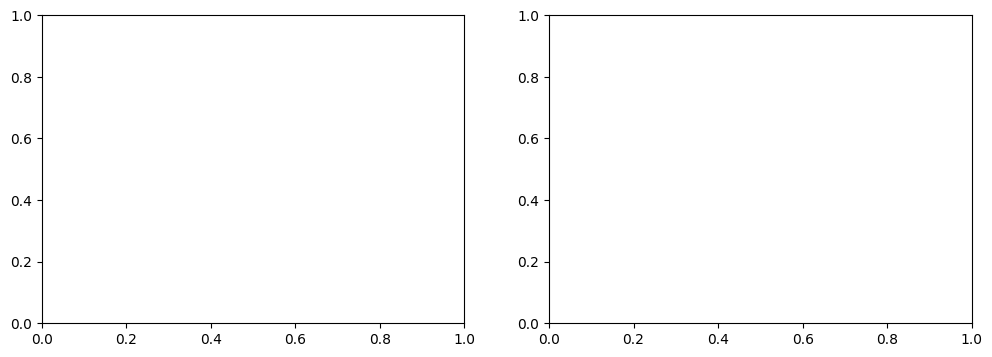

In [156]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

data = []
# for r in df['rad'].unique():
for r in sorted(df['rad'].unique()):
  data.append(df[df.rad == r]['medv'])

ax[0].boxplot(data)
ax[0].set_title('Distribution Prices by Rad')
ax[0].set_xticks(np.arange(1,len(df_group)+1), labels=df['rad'].unique())

sns.boxplot(x='rad',y='medv',data=df,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

#### Boxplot, identificando outliers
Cuidado com o dropna(). Com na o matplotlib não consegue fazer o cálculo de outliers.

In [111]:
df = penguins

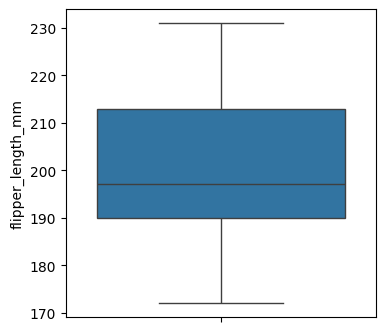

In [113]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

sns.boxplot(df.flipper_length_mm)

plt.show()

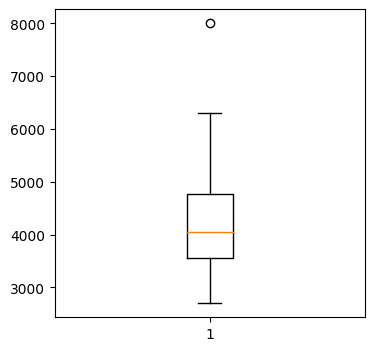

In [114]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

df.iloc[0:1,-2] = 8000

plt.boxplot(df.body_mass_g.dropna())

plt.show()

## Mapas de Calor

### Mapa de Correlação

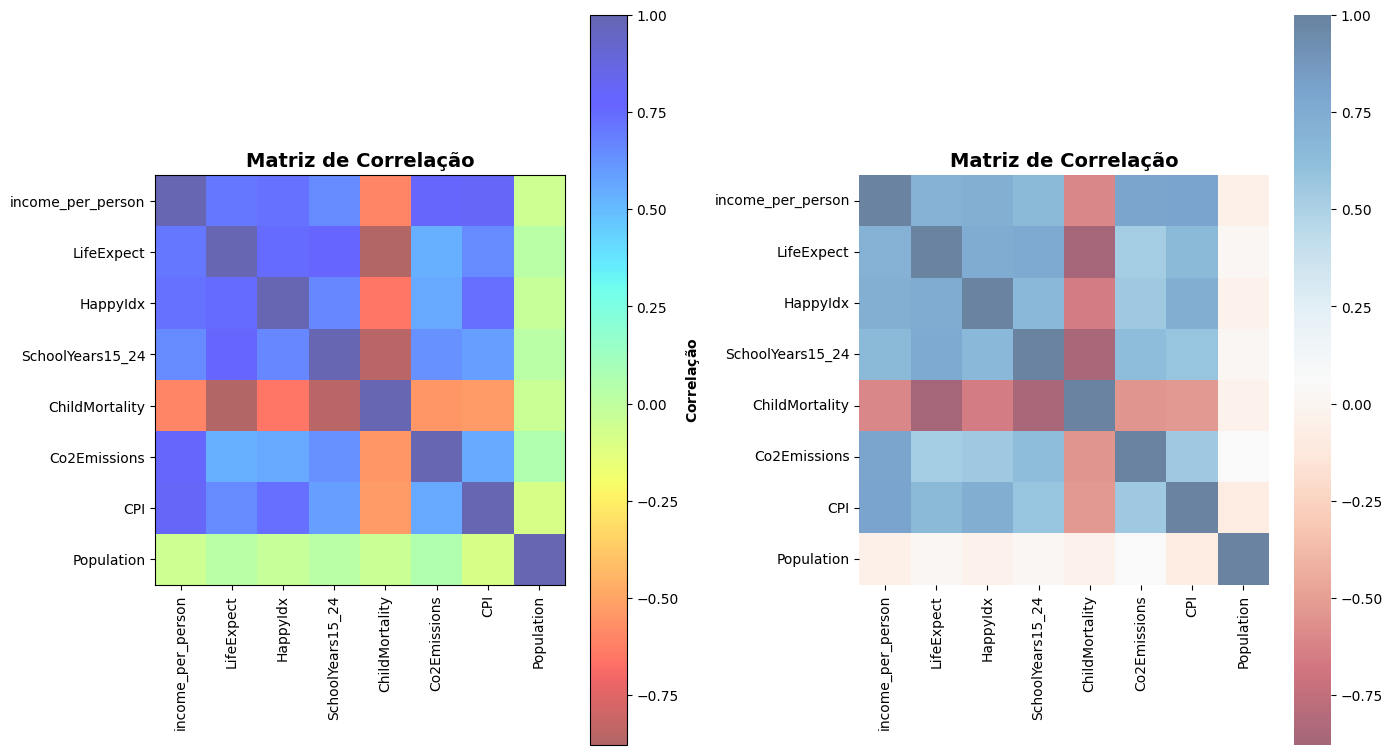

In [86]:
plt.figure(figsize=(14,8))

matriz = desenvolvimento_Paises[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr()

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r', alpha=0.6)

plt.xticks(np.arange(len( matriz.columns)), matriz.columns.to_list(), rotation=90)
plt.yticks(np.arange(len( matriz.columns)), matriz.columns.to_list())

cbar = plt.colorbar()
cbar.set_label('$\\bf{Correlação}$')

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.subplot(1,2,2)
sns.heatmap(matriz, cmap='RdBu', square=True, alpha=0.6)

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

### Tabelas de Contingência

In [88]:
# %load_ext rpy2.ipython

In [89]:
# %%R
# desenvolvimento_Paises = data.frame(
#   "Tipo" = c("Acompanhante", "Paciente", "Paciente", "Acompanhante", "Acompanhante", "Acompanhante", "Paciente"),
#   "Genero" = c("Feminino", "Masculino", "Masculino", "Feminino", "Masculino", "Feminino", "Feminino")
# )

# conTable = table(desenvolvimento_Paises)
# print(conTable)

              Genero
Tipo           Feminino Masculino
  Acompanhante        3         1
  Paciente            1         2


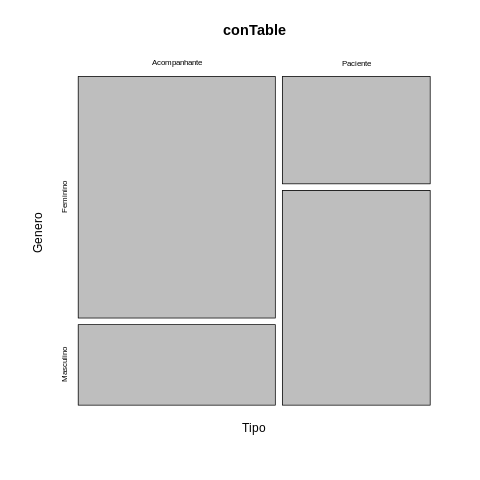

In [90]:
# %%R
# mosaicplot(conTable)

## Pizza

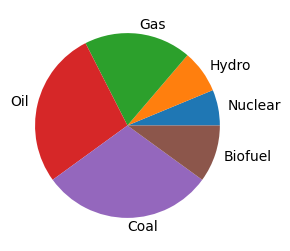

In [169]:
plt.figure(figsize=(4,3))

plt.pie( np.array(energy),labels=energy_type )
plt.show()

## Espelho

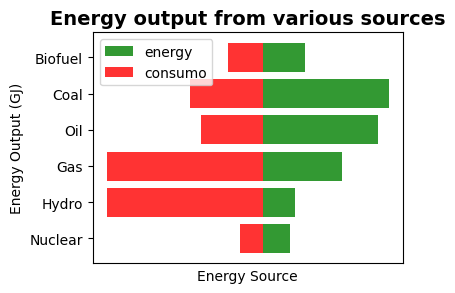

In [170]:
plt.figure(figsize=(4,3))
energy_type = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]
consumo = [4.5, 30, 30, 12, 14, 6.7]

plt.barh(energy_type, energy, color='green',alpha=0.8, label='energy')
plt.barh(energy_type, -np.array(consumo), color='red',alpha=0.8,label='consumo')
plt.legend()
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various sources", fontsize=14, weight='bold')
plt.xticks([])

plt.show()

## CUIDADO Matplotlib  ×  Seaborn

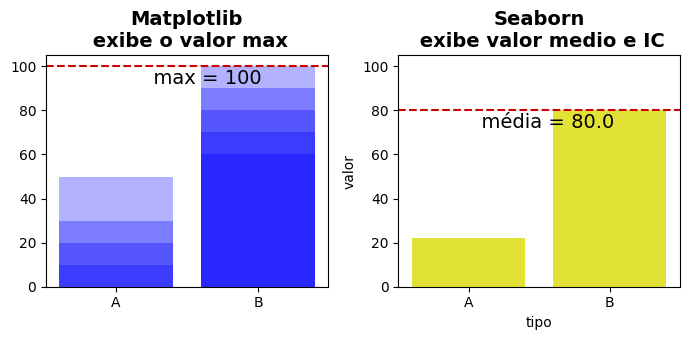

In [171]:
data = pd.DataFrame( { 'tipo': pd.Series(['A','A','A','A','A','B','B','B','B','B']),
                     'valor': pd.Series([0,10,20,30,50,60,70,80,90,100]) })

plt.figure(figsize=(7,3.5))

plt.subplot(1,2,1)
plt.bar(data.tipo, data.valor, color='blue',alpha=0.3)

plt.ylim([0,105])
plt.text(0,92,'      max = ' + str(data[ data.tipo == 'B' ].valor.max()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.max(), color = '#cc0000', linestyle = '--')
plt.title('Matplotlib\n exibe o valor max',fontsize=14,weight='bold')

plt.subplot(1,2,2)
sns.barplot(x=data.tipo, y=data.valor, color='yellow',alpha=0.9,errorbar=None)

plt.ylim([0,105])
plt.text(0,72,'  média = ' + str(data[ data.tipo == 'B' ].valor.mean()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.mean() , color = '#cc0000', linestyle = '--')
plt.title('Seaborn\n exibe valor medio e IC',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

## Demais Padrões de gráficos

#### Eixos

plt.xticks(rotation=90)


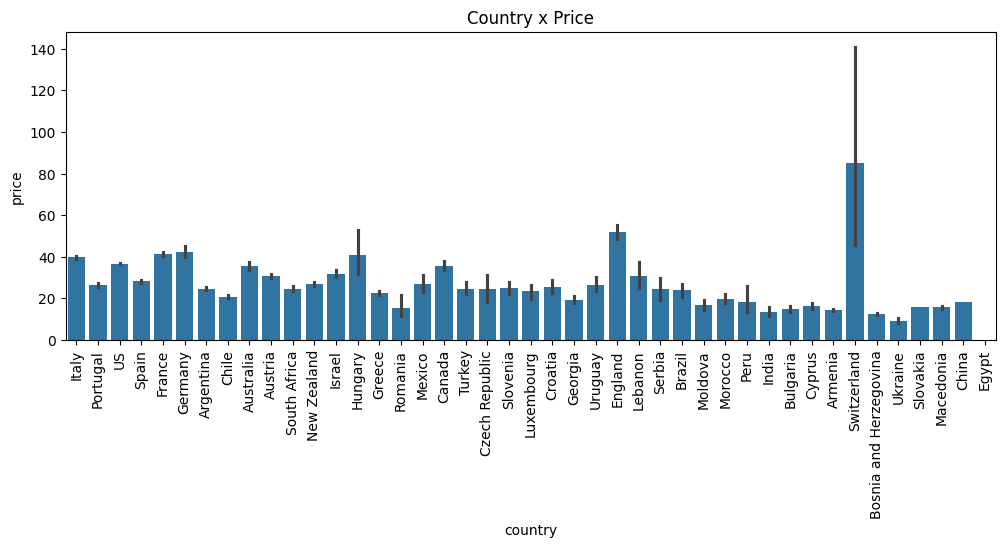

In [50]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine.country, y=wine.price)
plt.title('Country x Price')
plt.xticks(rotation=90)
plt.show()

#### Legenda

ax.legend(loc='lower right',fontsize=12) <br>
ax2.legend(fontsize=12)

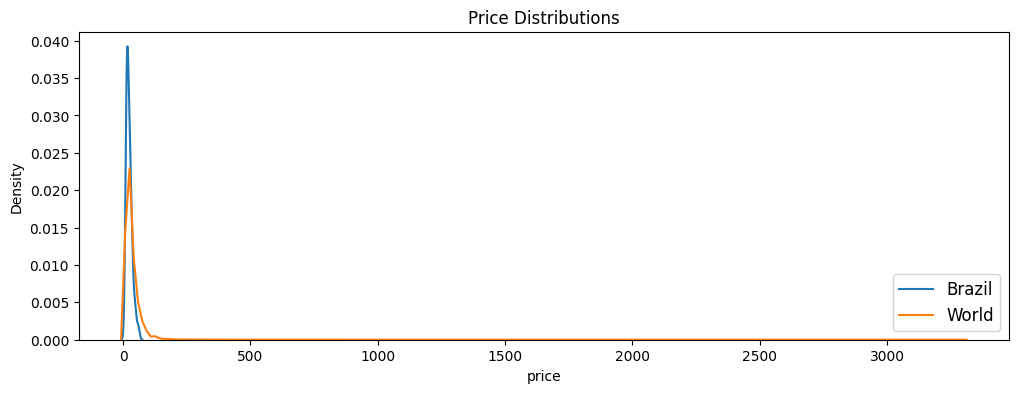

In [51]:
plt.figure(figsize=(12,4))
sns.kdeplot(wine[wine.country == 'Brazil'].price,label='Brazil')
sns.kdeplot(wine.price,label='World')
plt.title('Price Distributions')
plt.legend(loc='lower right',fontsize=12)
plt.show()

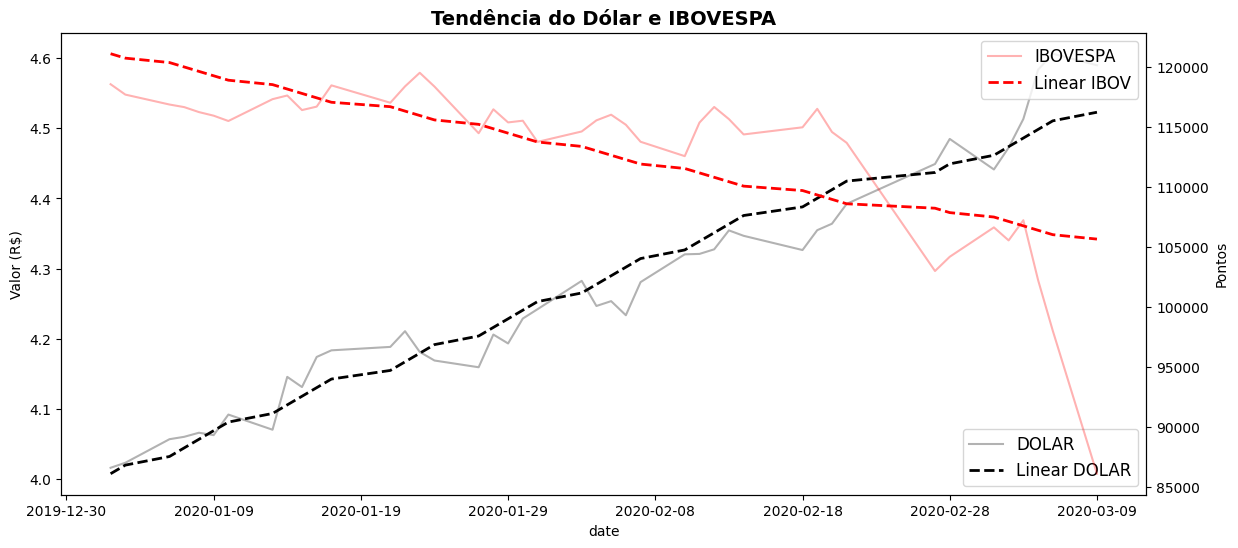

In [52]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR', color='k', alpha=0.3)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA', color='r', alpha=0.3)

ax.set_title('Tendência do Dólar e IBOVESPA', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")
ax2.set_ylabel("Pontos")

z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.index), linestyle='dashed', label='Linear DOLAR' ,linewidth=2, color='k')

z = np.polyfit(bovespa.index,bovespa.IBOV, 1)
p = np.poly1d(z)
ax2.plot(bovespa.data,p(bovespa.index), linestyle='dashed', label='Linear IBOV' ,linewidth=2, color='r')

ax.legend(loc='lower right',fontsize=12)
ax2.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

# Estátistica

## Valor Médio

In [53]:
mask = (df1.event == 'stim') & (df1.region == 'parietal')
df1_grouped = df1[['timepoint', 'signal']].groupby(['timepoint'])['signal'].agg(['mean', 'std', 'count'])

df1_grouped = df1_grouped.reset_index()
df1_grouped.head()

timepoint      mean       std  count
0          0 -0.016662  0.028326     56
1          1 -0.025002  0.030641     56
2          2 -0.012873  0.035440     56
3          3  0.034446  0.058260     56
4          4  0.098194  0.092838     56

## Intervalo de Confiança


Em probabilidade e estatística , o ponto percentil $97.5$ da distribuição normal padrão é um número comumente usado para cálculos estatísticos. O valor aproximado desse número é $1.96$, o que significa que $95$% da área sob uma curva normal está dentro de aproximadamente $1.96$ desvios padrão da média. Por causa do teorema do limite central , esse número é usado na construção de intervalos de confiança aproximados de $95$%. O uso de $95$% é uma convenção arbitrária, mas comum de ser aplicado em dados de ciências, medicina, economia, dados sociais etc. embora outros percentuais, como $90$%, $99$% possam ser também usados.

![imagem](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/NormalDist1.96.png/250px-NormalDist1.96.png)

Se $X$ tem uma distribuição normal, $X$ ~ $N(0,1)$,

$$\mathrm {P} (X>1.96)\approx 0.025$$

$$\mathrm {P} (X<1.96)\approx 0.975$$

que, sendo simétrica,

$$\mathrm {P} (-1.96 < X < 1.96)\approx 0.975$$

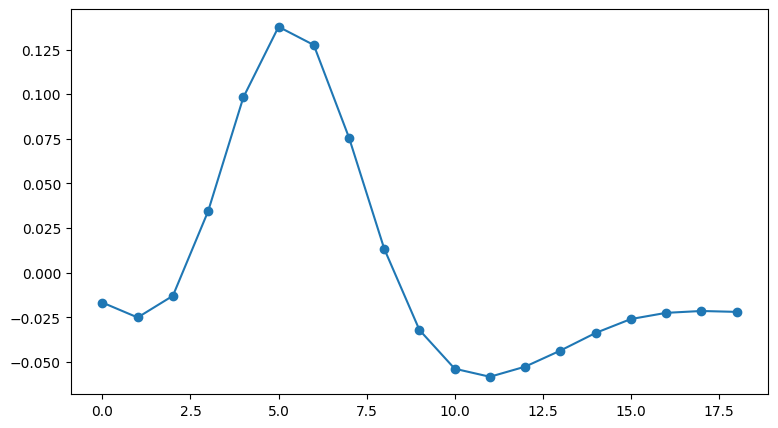

In [54]:
fig = plt.figure(figsize=(9,5))

x = df1_grouped.timepoint
y = df1_grouped['mean']

plt.plot(x,y)
plt.scatter(x,y)
plt.show()



In [55]:

# Calculate CI Confidence Interval 95%
df1_grouped['ci'] = 1.96 * df1_grouped['std'] / np.sqrt(df1_grouped['count'])
df1_grouped['ci_lower'] = df1_grouped['mean'] - df1_grouped['ci']
df1_grouped['ci_upper'] = df1_grouped['mean'] + df1_grouped['ci']
df1_grouped.head()

timepoint      mean       std  count        ci  ci_lower  ci_upper
0          0 -0.016662  0.028326     56  0.007419 -0.024081 -0.009243
1          1 -0.025002  0.030641     56  0.008025 -0.033027 -0.016976
2          2 -0.012873  0.035440     56  0.009282 -0.022155 -0.003591
3          3  0.034446  0.058260     56  0.015259  0.019187  0.049705
4          4  0.098194  0.092838     56  0.024316  0.073878  0.122510

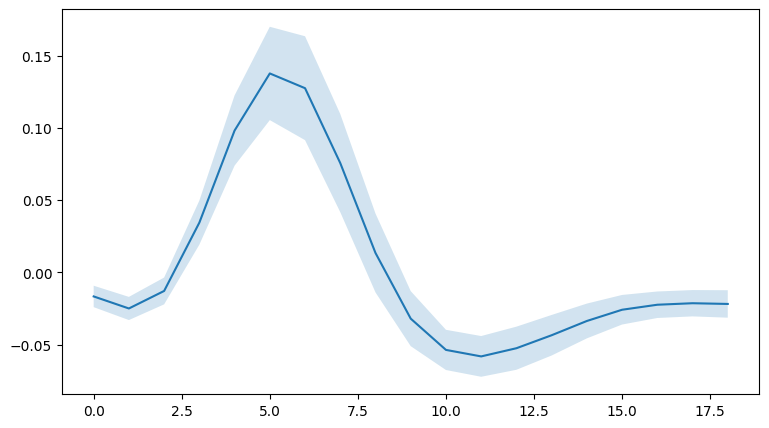

In [56]:
fig = plt.figure(figsize=(9,5))

x = df1_grouped.timepoint
y = df1_grouped['mean']

plt.plot(x,y)
plt.fill_between(x,df1_grouped['ci_lower'],df1_grouped['ci_upper'],alpha=.20)
plt.show()

## Distribuições

In [219]:
np.random.seed(42)
x = np.random.randint(36,43,30)
x

array([42, 39, 40, 42, 38, 40, 40, 42, 37, 38, 42, 38, 38, 40, 39, 38, 41,
       40, 37, 39, 41, 41, 37, 39, 40, 36, 39, 37, 41, 40])

In [220]:
mu = x.mean()
sigma = x.std()
mu, sigma

(39.36666666666667, 1.682920741515245)

In [221]:
from scipy.stats import norm
funcao_sapatos = norm(loc=mu,scale=sigma)

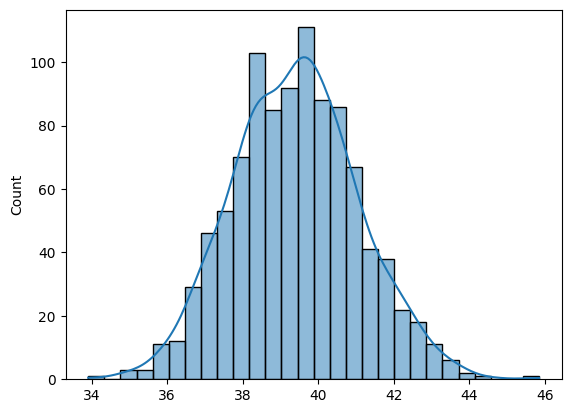

In [222]:
sns.histplot(funcao_sapatos.rvs(size=1000),kde=True)
plt.show()

### PDF

$$= P(X=x_0)$$

Função de probabilidade

In [210]:
funcao_sapatos.pdf(39) # prob de ser 39

0.23149334534231303

In [211]:
funcao_sapatos.pdf(np.linspace(33,46,100))

array([1.84952252e-04, 2.47704793e-04, 3.29735056e-04, 4.36266397e-04,
       5.73712525e-04, 7.49881825e-04, 9.74198041e-04, 1.25793327e-03,
       1.61444734e-03, 2.05942553e-03, 2.61110434e-03, 3.29047269e-03,
       4.12143336e-03, 5.13090768e-03, 6.34886434e-03, 7.80825203e-03,
       9.54481522e-03, 1.15967730e-02, 1.40043422e-02, 1.68090899e-02,
       2.00531044e-02, 2.37779800e-02, 2.80236194e-02, 3.28268661e-02,
       3.82199883e-02, 4.42290492e-02, 5.08722076e-02, 5.81580041e-02,
       6.60836969e-02, 7.46337211e-02, 8.37783471e-02, 9.34726184e-02,
       1.03655645e-01, 1.14250322e-01, 1.25163540e-01, 1.36286918e-01,
       1.47498101e-01, 1.58662618e-01, 1.69636277e-01, 1.80268056e-01,
       1.90403421e-01, 1.99887965e-01, 2.08571264e-01, 2.16310812e-01,
       2.22975892e-01, 2.28451241e-01, 2.32640359e-01, 2.35468342e-01,
       2.36884105e-01, 2.36861918e-01, 2.35402186e-01, 2.32531434e-01,
       2.28301505e-01, 2.22788007e-01, 2.16088060e-01, 2.08317454e-01,
      

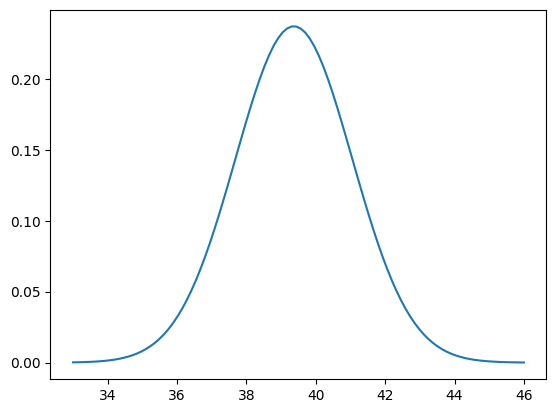

In [212]:
plt.plot(np.linspace(33,46,100),funcao_sapatos.pdf(np.linspace(33,46,100)))
plt.show()

### CDF

$$= P(X \le x_0)$$

Distribuição de Probabilidade Acumulada

In [213]:
funcao_sapatos.cdf(40)

0.6466641598445435

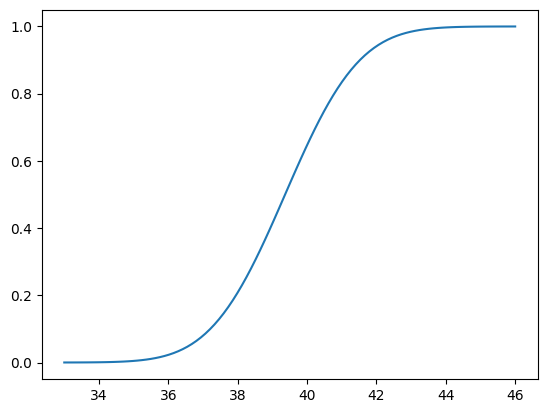

In [214]:
plt.plot(np.linspace(33,46,100),funcao_sapatos.cdf(np.linspace(33,46,100)))
plt.show()

### PPF

$$= x_0 | P(X \le x_0) = P_0 $$

Distribuição de Probabilidade Acumulada

Função inversa de CDF

In [215]:
funcao_sapatos.ppf(0.9)

41.52341637764301

In [216]:
funcao_sapatos.cdf(40), funcao_sapatos.ppf(funcao_sapatos.cdf(40))

(0.6466641598445435, 40.0)

In [229]:
f"cdf(ppf(40)) = {funcao_sapatos.ppf(funcao_sapatos.cdf(40))} "

'cdf(ppf(40)) = 40.0 '

In [231]:
f"ppf(cdf(0.2)) = {funcao_sapatos.cdf(funcao_sapatos.ppf(0.2))} "

'ppf(cdf(0.2)) = 0.2000000000000004 '

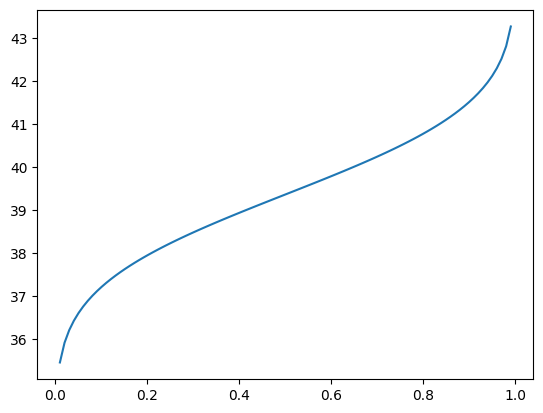

In [217]:
plt.plot(np.linspace(0,1,100),funcao_sapatos.ppf(np.linspace(0,1,100)))
plt.show()

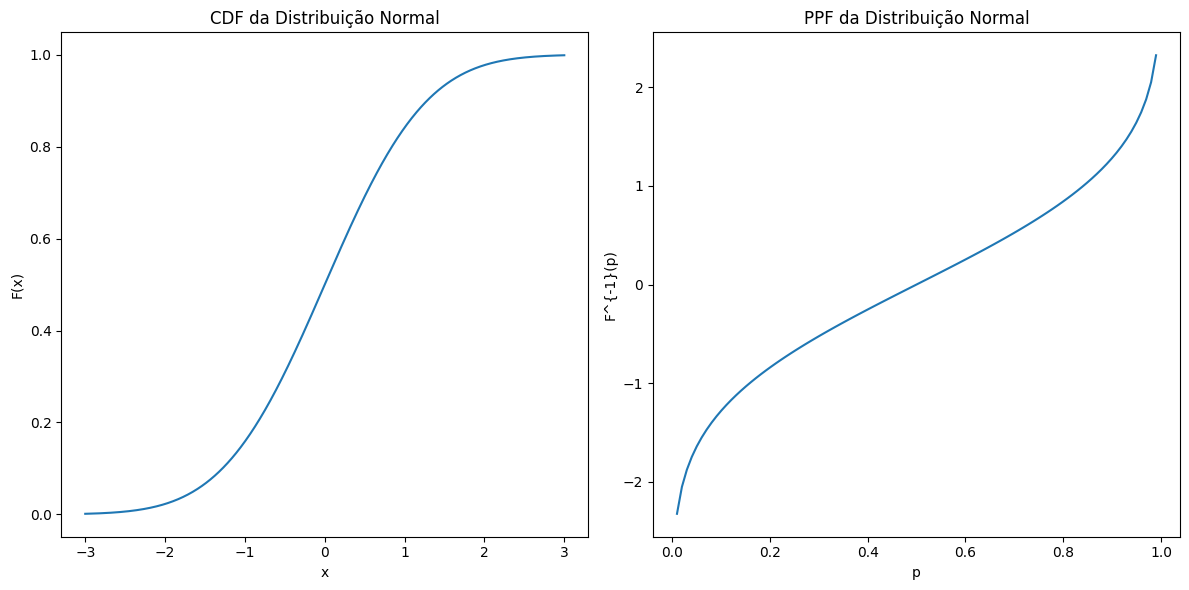

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definindo a distribuição normal padrão
distribuicao = norm

# Gerando valores x para a CDF
x_values = np.linspace(-3, 3, 1000)
cdf_values = distribuicao.cdf(x_values)

# Gerando probabilidades p para a PPF
p_values = np.linspace(0, 1, 100)
ppf_values = distribuicao.ppf(p_values)

# Plotando a CDF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, cdf_values)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF da Distribuição Normal')

# Plotando a PPF
plt.subplot(1, 2, 2)
plt.plot(p_values, ppf_values)
plt.xlabel('p')
plt.ylabel('F^{-1}(p)')
plt.title('PPF da Distribuição Normal')

plt.tight_layout()
plt.show()


In [227]:
# Valor x
x = 1.0

# Calculando a CDF em x
cdf_x = distribuicao.cdf(x)
print(f"CDF({x}) = {cdf_x}")

# Calculando a PPF na probabilidade obtida da CDF
ppf_cdf_x = distribuicao.ppf(cdf_x)
print(f"PPF(CDF({x})) = {ppf_cdf_x}")

# Probabilidade p
p = 0.8413

# Calculando a PPF em p
ppf_p = distribuicao.ppf(p)
print(f"PPF({p}) = {ppf_p}")

# Calculando a CDF no valor obtido da PPF
cdf_ppf_p = distribuicao.cdf(ppf_p)
print(f"CDF(PPF({p})) = {cdf_ppf_p}")


CDF(1.0) = 0.8413447460685429
PPF(CDF(1.0)) = 1.0
PPF(0.8413) = 0.9998150936147446
CDF(PPF(0.8413)) = 0.8413


In [218]:
funcao_sapatos.rvs(size=1000)

array([36.46376667, 38.42038132, 37.66215217, 39.89552002, 37.83853412,
       36.98987147, 41.83323738, 38.98670305, 39.48031128, 36.96892839,
       38.45051369, 39.55334059, 37.4296357 , 39.99893665, 38.35583936,
       38.8757692 , 38.35404213, 42.48390404, 39.34395191, 37.58662301,
       40.75094456, 37.31208357, 39.71816754, 36.06869717, 37.13143482,
       39.69796852, 40.60944739, 39.6550659 , 39.17203977, 38.85993301,
       36.87843134, 38.15522592, 38.59144812, 41.14571959, 39.94494901,
       36.39960982, 39.9120743 , 38.71860371, 38.22746059, 40.39606938,
       41.10175715, 40.9339373 , 37.95433009, 38.84628675, 39.92415677,
       41.0084318 , 38.5602544 , 39.05421732, 37.50479259, 37.35354573,
       40.73408323, 41.64911114, 39.24547934, 41.055533  , 39.97527143,
       38.28098125, 39.97486683, 41.95506031, 39.30637428, 41.99983793,
       34.95784329, 40.74986344, 39.51315998, 38.86346099, 39.52109278,
       36.02174572, 38.99697629, 39.96765882, 41.85384521, 38.49

### Histogramas

In [203]:
df = penguins
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       8000.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

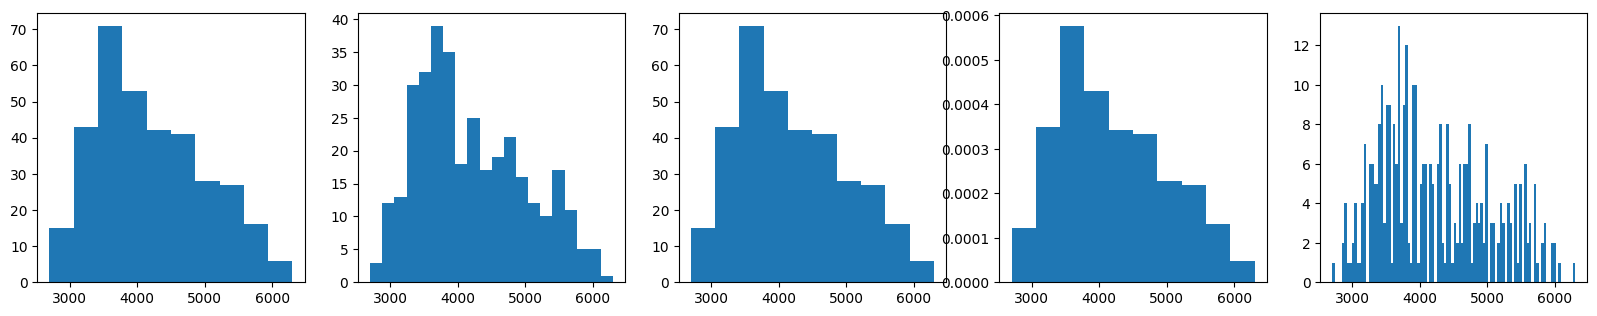

(array([15., 43., 71., 53., 42., 41., 28., 27., 16.,  6.]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]))

In [93]:
# plt.figure(figsize=(4,3.5))
plt.figure(figsize=(20,3.5))

plt.subplot(1,5,1)
valores = plt.hist(df.body_mass_g)
plt.subplot(1,5,2)
plt.hist(df.body_mass_g, bins=20) # bins numero de colunas
plt.subplot(1,5,3)
plt.hist(df.body_mass_g)

plt.subplot(1,5,4)
plt.hist(df.body_mass_g, density=True)
plt.subplot(1,5,5)

plt.hist(df.body_mass_g, bins=100)

plt.show()
valores[0], valores[1]

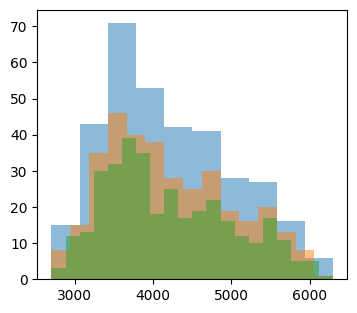

In [94]:
plt.figure(figsize=(4,3.5))
# alpha
plt.hist(df.body_mass_g, alpha=.5)
plt.hist(df.body_mass_g, bins=15, alpha=.5)
plt.hist(df.body_mass_g, bins=20, alpha=.5)

plt.show()

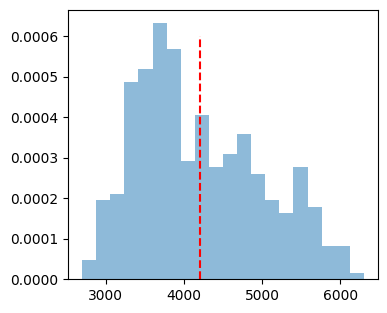

In [95]:
plt.figure(figsize=(4,3.5))

plt.hist(df.body_mass_g, bins=20, density=True, alpha=0.5)
plt.vlines(df.body_mass_g.mean(), 0, 0.0006, color='r', linestyle='dashed')

plt.show()

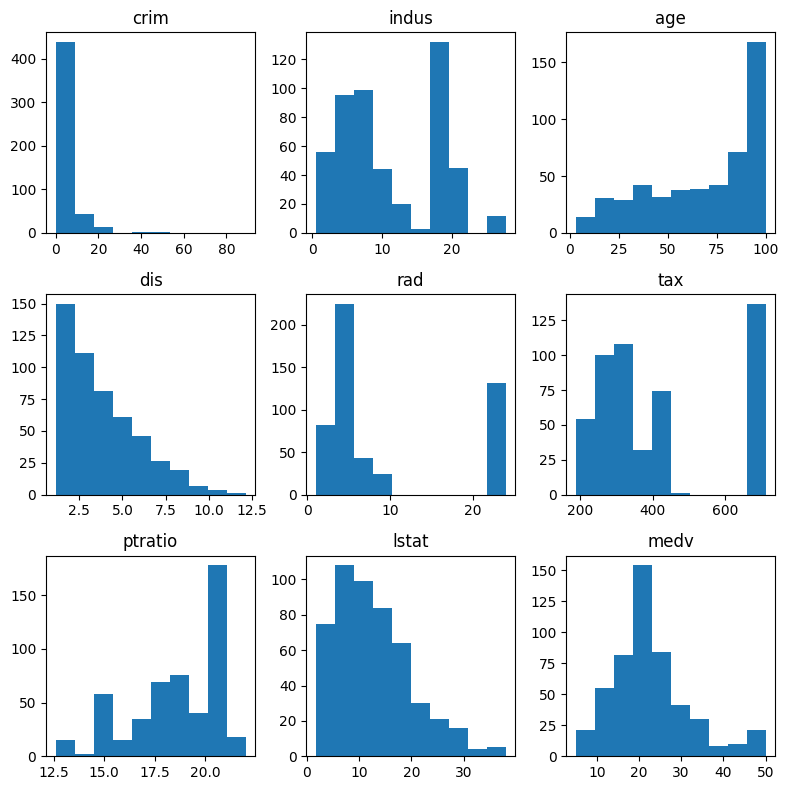

In [157]:
fig, axis = plt.subplots(3,3, figsize=(8,8))

ax = axis.reshape(-1)

cols = ['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for i in range(len(cols)):
  ax[i].hist(boston[cols[i]])
  ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()

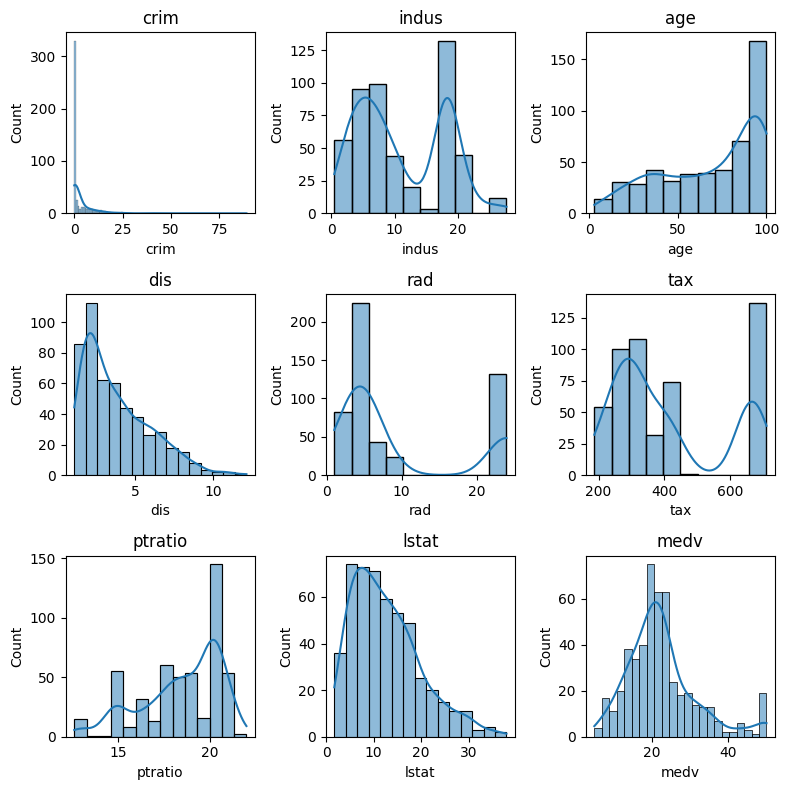

In [158]:
fig, axis = plt.subplots(3,3, figsize=(8,8))

ax = axis.reshape(-1)

cols = ['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for i in range(len(cols)):
  sns.histplot(boston[cols[i]],ax=ax[i],kde=True)
  ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()

#### Histograma Acumulativo



plt.hist(df.body_mass_g, density=True, cumulative=True, bins=20)

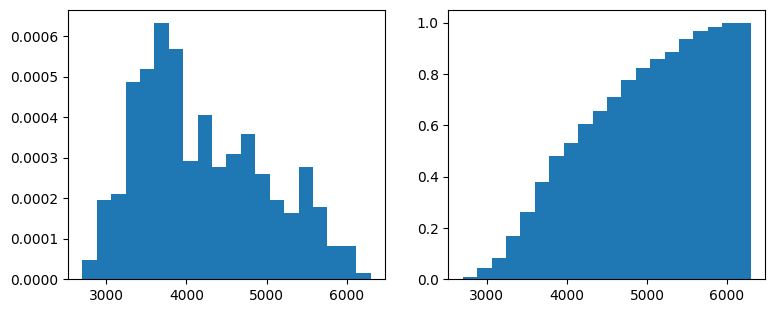

In [96]:
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
plt.hist(df.body_mass_g, density=True, bins=20)

plt.subplot(1,2,2)
plt.hist(df.body_mass_g, density=True, cumulative=True, bins=20)

plt.show()

#### Seaborn

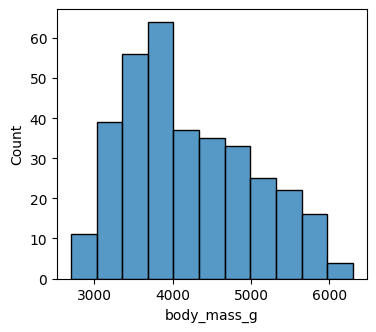

In [97]:
plt.figure(figsize=(4,3.5))

sns.histplot(df.body_mass_g)

plt.show()

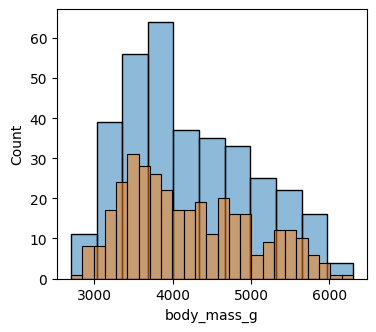

In [98]:
plt.figure(figsize=(4,3.5))

sns.histplot(df.body_mass_g,alpha=0.5)
sns.histplot(df.body_mass_g,bins=25,alpha=0.5)

plt.show()

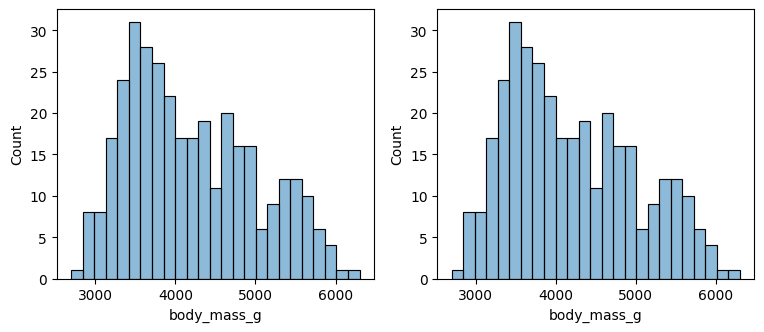

In [100]:
#Usando e não usando data=
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
sns.histplot(df.body_mass_g,bins=25,alpha=0.5)

plt.subplot(1,2,2)
sns.histplot(x='body_mass_g',data=df,bins=25,alpha=0.5)

plt.show()

Seaborn hue  ×  Matplotlib

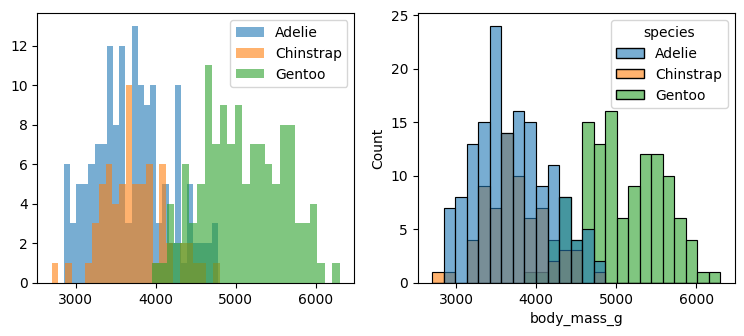

In [101]:
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
for s in df.species.unique():
  plt.hist(df[ df.species == s ].body_mass_g, bins=25, alpha=0.6,label=s)

plt.legend()

plt.subplot(1,2,2)
sns.histplot(x='body_mass_g',data=df,hue='species',bins=25,alpha=0.6)

plt.show()

###### Lembre de com empregar ax no Seaborn e Matplotlib

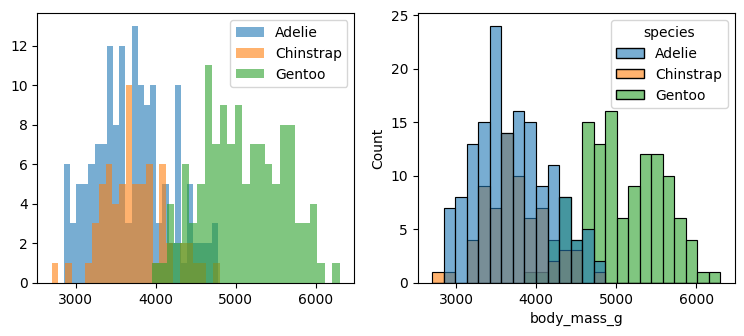

In [102]:
fig, ax = plt.subplots(1,2,figsize=(9,3.5))

for s in df.species.unique():
  ax[0].hist(df[ df.species == s ].body_mass_g, bins=25, alpha=0.6,label=s)

ax[0].legend()

sns.histplot(x='body_mass_g',data=df,hue='species',bins=25,alpha=0.6,ax=ax[1])

plt.show()

##### KDE

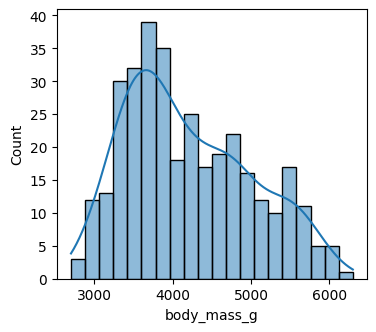

In [103]:
plt.figure(figsize=(4,3.5))

sns.histplot(df.body_mass_g,kde=True,bins=20,alpha=0.5)

plt.show()

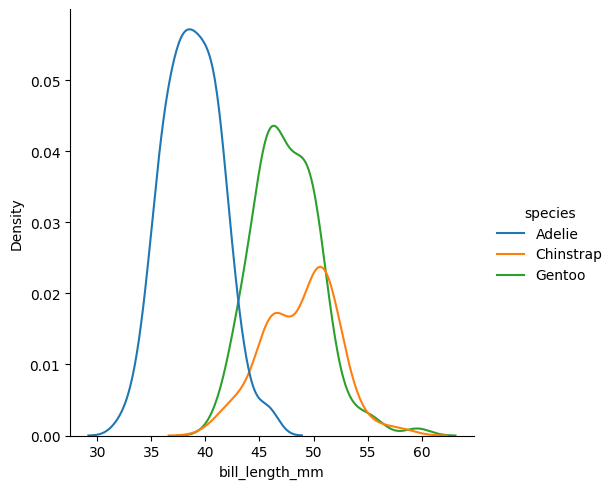

In [105]:
sns.displot(x='bill_length_mm',data=df,hue='species',kind='kde')

plt.show()

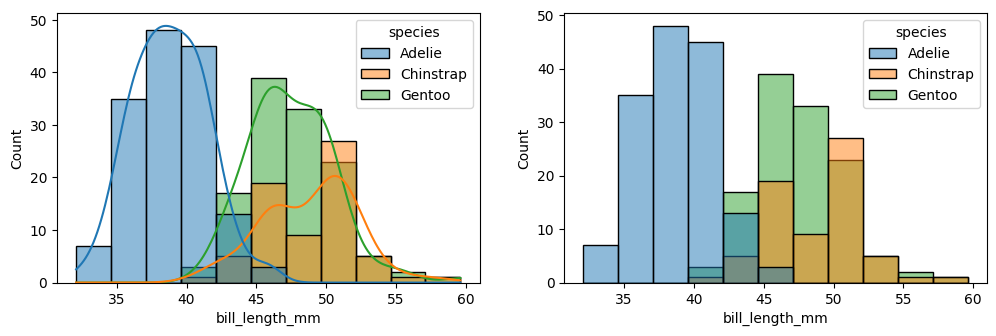

In [110]:
fig, ax = plt.subplots(1,2,figsize=(12,3.5))

sns.histplot(x='bill_length_mm',data=df,hue='species',ax=ax[1])
sns.histplot(x='bill_length_mm',data=df,hue='species',kde=True,ax=ax[0])

plt.show()

#### sns.displot()

histplot() (with kind="hist"; the default)

kdeplot() (with kind="kde")

ecdfplot() (with kind="ecdf"; univariate-only)

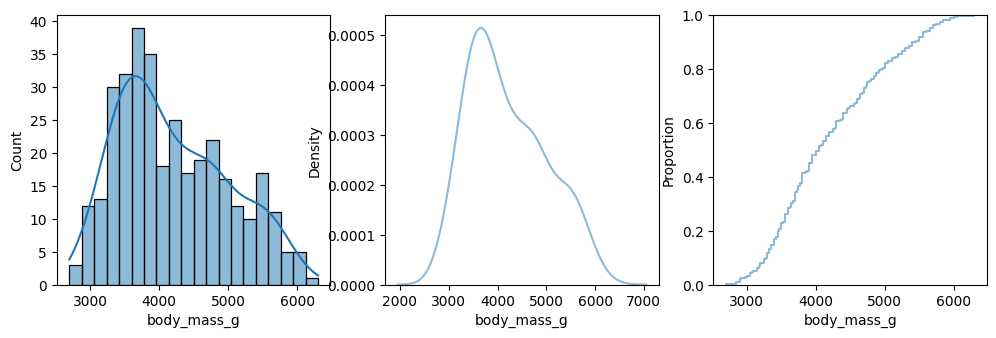

In [104]:
plt.figure(figsize=(12,3.5))

plt.subplot(1,3,1)
sns.histplot(df.body_mass_g,kde=True,bins=20,alpha=0.5)

plt.subplot(1,3,2)
sns.kdeplot(df.body_mass_g,alpha=0.5)

plt.subplot(1,3,3)
sns.ecdfplot(df.body_mass_g,alpha=0.5)

plt.show()

### AREA

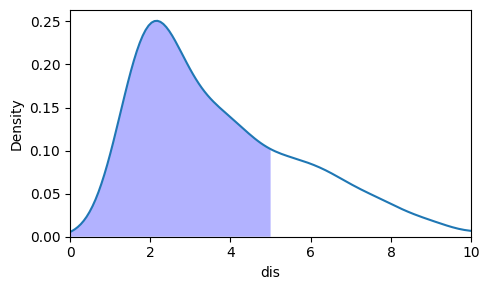

In [159]:
plt.figure(figsize=(5,3))

from scipy.stats import gaussian_kde

x = np.linspace(0,5,100)
prob = gaussian_kde(boston['dis'])(x)

a = sns.kdeplot(boston['dis'])

plt.fill_between(x,prob, facecolor='blue', alpha=0.3)
plt.xlim([0,10])

plt.tight_layout()
plt.show()

In [162]:
boston['dis'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

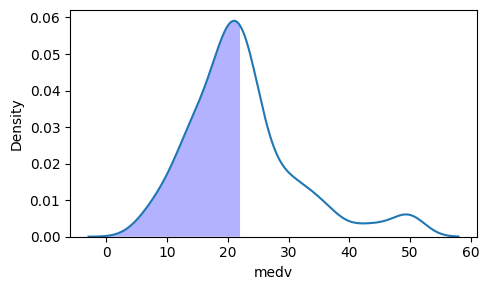

In [161]:
plt.figure(figsize=(5,3))

from scipy.stats import gaussian_kde

x = np.linspace(0,22,100)
prob = gaussian_kde(boston['medv'])(x)

a = sns.kdeplot(boston['medv'])

plt.fill_between(x,prob, facecolor='blue', alpha=0.3)

plt.tight_layout()
plt.show()

In [200]:
boston['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

## Linha de Tendência

z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)        (x,y,grau do polinomio)

p = np.poly1d(z)

ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')


<ipython-input-63-a768a8b318cf>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',bovespa.iloc[0].data.date(),'',bovespa.iloc[20].data.date(),'',bovespa.iloc[40].data.date()])


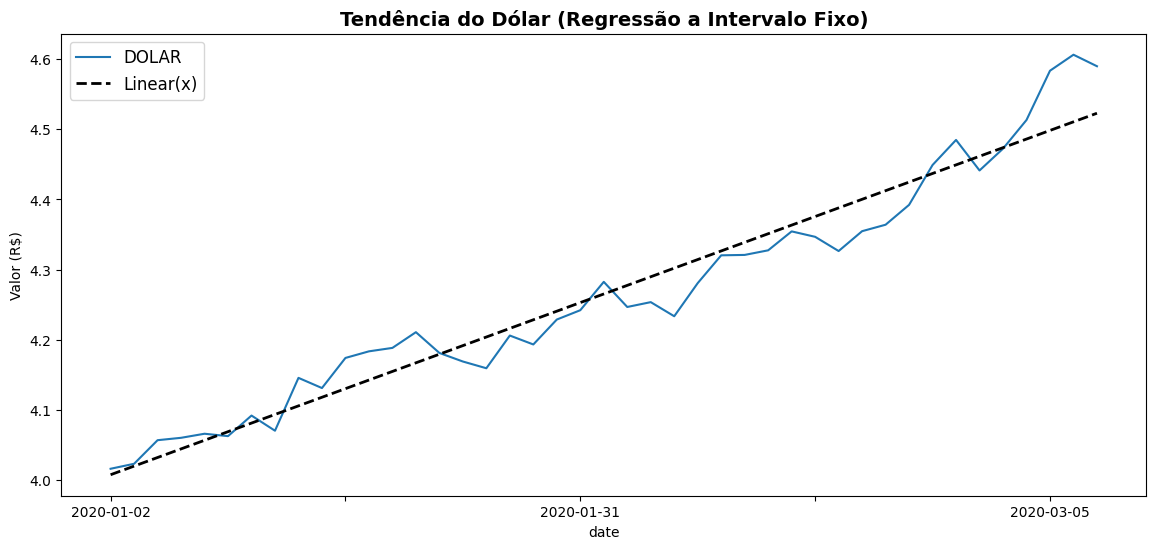

In [63]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.index, bovespa.DOLAR, label='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Fixo)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

# OU
# x = np.arange(0,len(bovespa),1)
# z = np.polyfit(x,bovespa.DOLAR, 1)
# p = np.poly1d(z)
# ax.plot(bovespa.data,p(x), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['',bovespa.iloc[0].data.date(),'',bovespa.iloc[20].data.date(),'',bovespa.iloc[40].data.date()])

plt.show()

<ipython-input-64-03e6cd522156>:22: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(bovespa.index,bovespa.DOLAR, 20)
<ipython-input-64-03e6cd522156>:26: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(bovespa.index,bovespa.DOLAR,70)
<ipython-input-64-03e6cd522156>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',bovespa.iloc[0].data.date(),'',bovespa.iloc[20].data.date(),'',bovespa.iloc[40].data.date()])


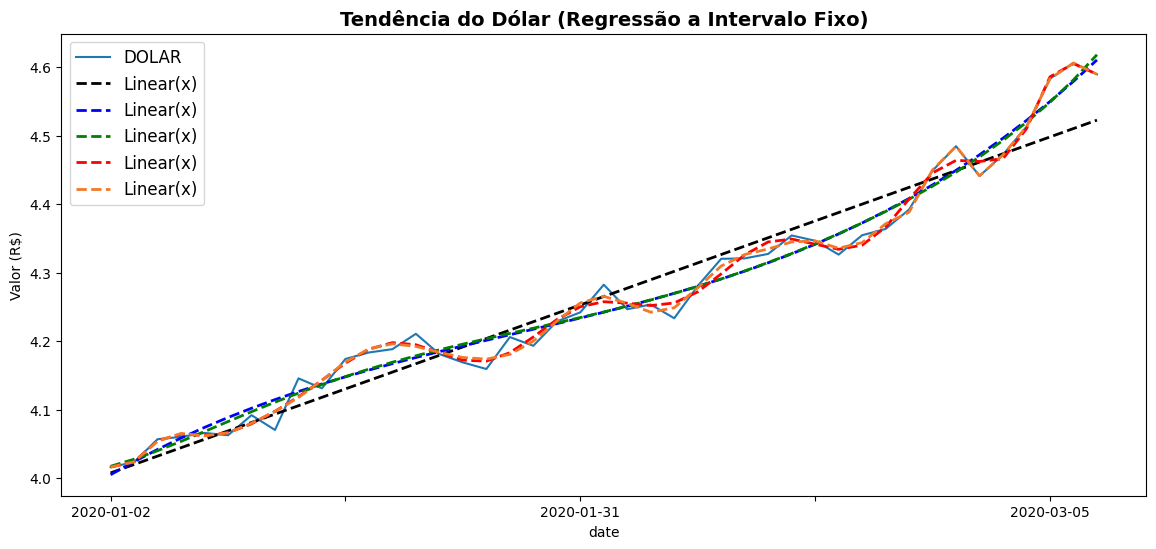

In [64]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.index, bovespa.DOLAR, label='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Fixo)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')
# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR, 3)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='b')
# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR, 6)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='g')
# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR, 20)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='r')
# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR,70)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='#F37928')

# OU
# x = np.arange(0,len(bovespa),1)
# z = np.polyfit(x,bovespa.DOLAR, 1)
# p = np.poly1d(z)
# ax.plot(bovespa.data,p(x), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['',bovespa.iloc[0].data.date(),'',bovespa.iloc[20].data.date(),'',bovespa.iloc[40].data.date()])

plt.show()

### Linha de Tendencia Média

In [65]:
bovespa['week'] = bovespa['data'].dt.isocalendar().week
bovespa.head()

data   DOLAR      PETR4  VALE3      IBOV  week
0 2020-01-02  4.0163  16.270000  13.45  118573.0     1
1 2020-01-03  4.0234  15.990000  13.29  117707.0     1
2 2020-01-06  4.0570  16.219999  13.14  116878.0     2
3 2020-01-07  4.0604  16.059999  13.23  116662.0     2
4 2020-01-08  4.0662  15.700000  13.22  116247.0     2

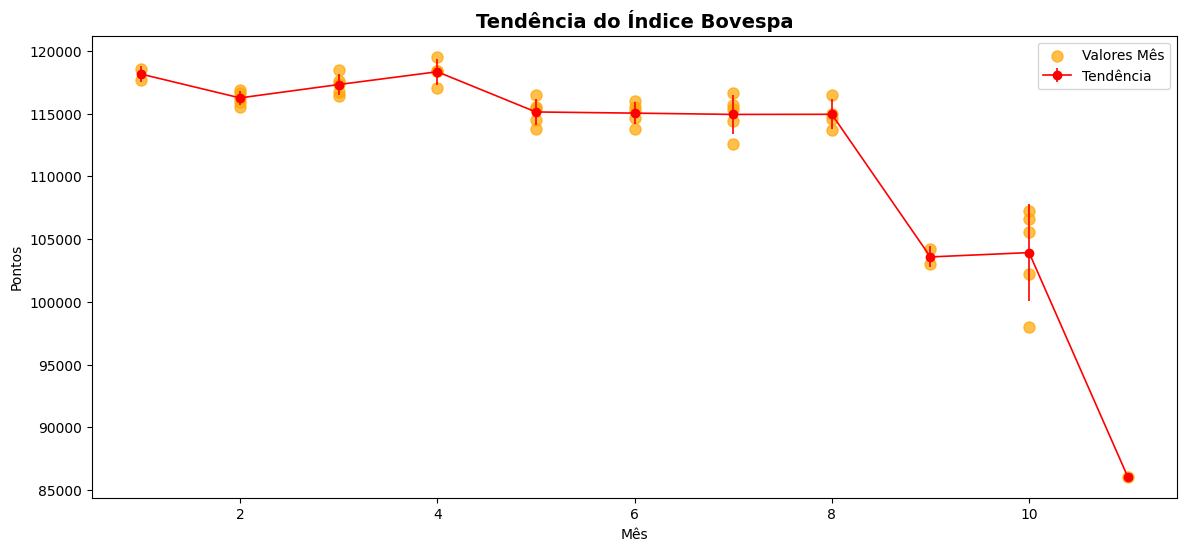

In [66]:
fig, ax = plt.subplots(figsize=(14,6))

yerr = []
ymean = []
for w in bovespa.week.unique():
  yerr.append(bovespa[bovespa.week == w]['IBOV'].std())
  ymean.append(bovespa[bovespa.week == w]['IBOV'].mean())
yerr = np.array(yerr)
ymean = np.array(ymean)

plt.errorbar(bovespa.week.unique(), ymean, yerr=yerr, label='Tendência', marker='o', color='r', linewidth=1.2)
plt.scatter(bovespa.week, bovespa.IBOV, label='Valores Mês', marker='o', color='orange', alpha=0.7, s=64)

plt.title("Tendência do Índice Bovespa", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

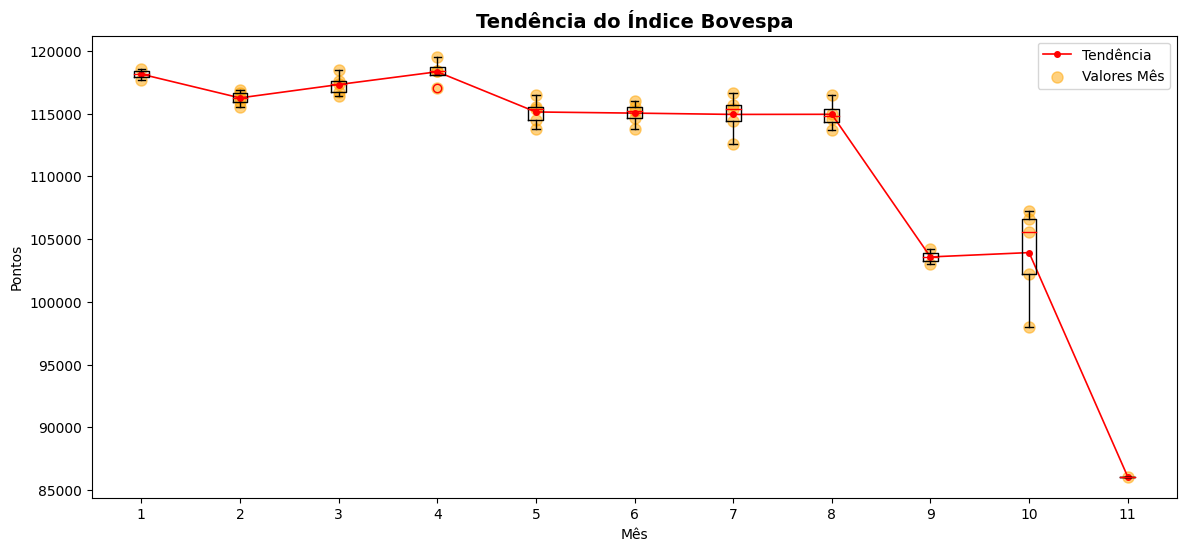

In [67]:
fig, ax = plt.subplots(figsize=(14,6))

plt.plot(np.array(bovespa.week.unique()), ymean, 'r-', label='Tendência', marker='o', linewidth=1.2, markersize=4)
plt.scatter(bovespa.week, bovespa.IBOV, label='Valores Mês', marker='o',  alpha=0.5, s=64, color='orange')
for week in bovespa.week.unique():
  plt.boxplot(bovespa[bovespa.week == week].IBOV, positions=[week], widths=0.15, flierprops=dict(color='r',markeredgecolor='r'),medianprops=dict(color='r'))

plt.title("Tendência do Índice Bovespa", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

## Gráfico de Dispersão

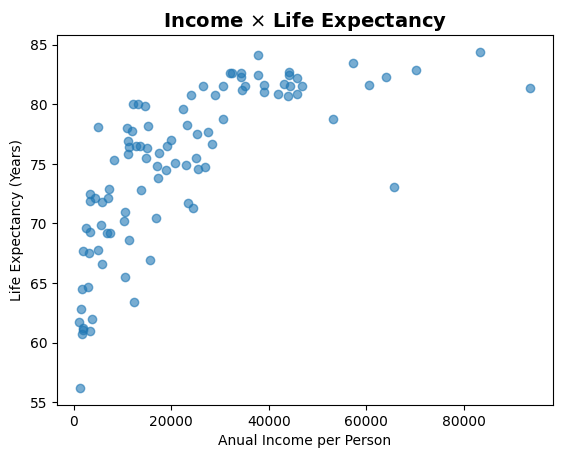

In [182]:
plt.scatter(desenvolvimento_Paises['income_per_person'],desenvolvimento_Paises['LifeExpect'] , alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.show()



In [179]:
dict(zip(desenvolvimento_Paises.continent.unique(), ['r','g','b','c','m']))

from matplotlib import cm
dict(zip(desenvolvimento_Paises.continent.unique(), cm.viridis(len( desenvolvimento_Paises.continent.unique() )) ) ) # Matplotlib.

sns.color_palette("Set2", len(desenvolvimento_Paises.continent.unique()))
dict(zip(desenvolvimento_Paises.continent.unique(), sns.color_palette("Set2", len(desenvolvimento_Paises.continent.unique()))))

{'Africa': (0.4, 0.7607843137254902, 0.6470588235294118),
 'Americas': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 'Asia': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'Europe': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'Oceania': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)}

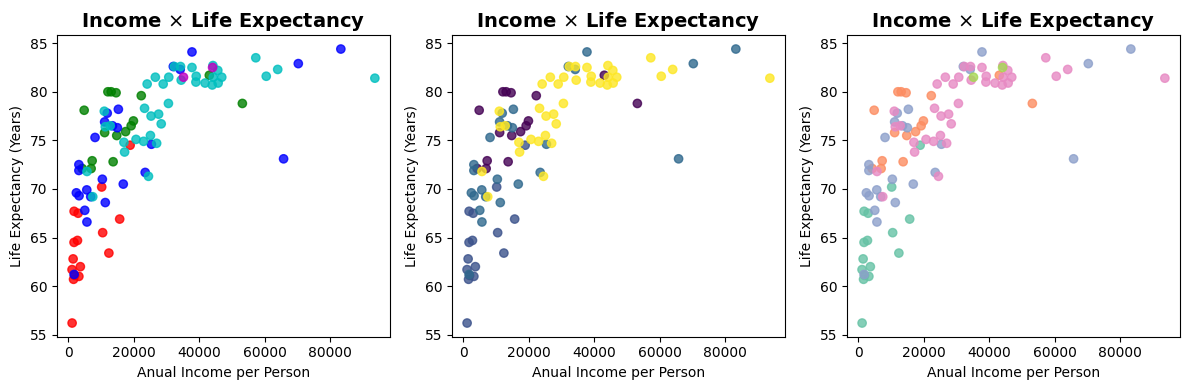

In [181]:
plt.figure(figsize=(12,4))

colors1 = dict(zip(desenvolvimento_Paises.continent.unique(), ['r','g','b','c','m']))
colors2 = dict(zip(desenvolvimento_Paises.continent.unique(), cm.viridis(len( desenvolvimento_Paises.continent.unique() )) ) )
colors3 = dict(zip(desenvolvimento_Paises.continent.unique(), sns.color_palette("Set2", len(desenvolvimento_Paises.continent.unique()))))

colors = [ colors1, colors2, colors3 ]

for i in range(len(colors)):
  plt.subplot(1,3,i+1)
  plt.scatter(desenvolvimento_Paises['income_per_person'], desenvolvimento_Paises['LifeExpect'], alpha=0.8,
              c = desenvolvimento_Paises['continent'].map(colors[i]))

  plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
  plt.xlabel('Anual Income per Person')
  plt.ylabel('Life Expectancy (Years)')

plt.tight_layout()
plt.show()


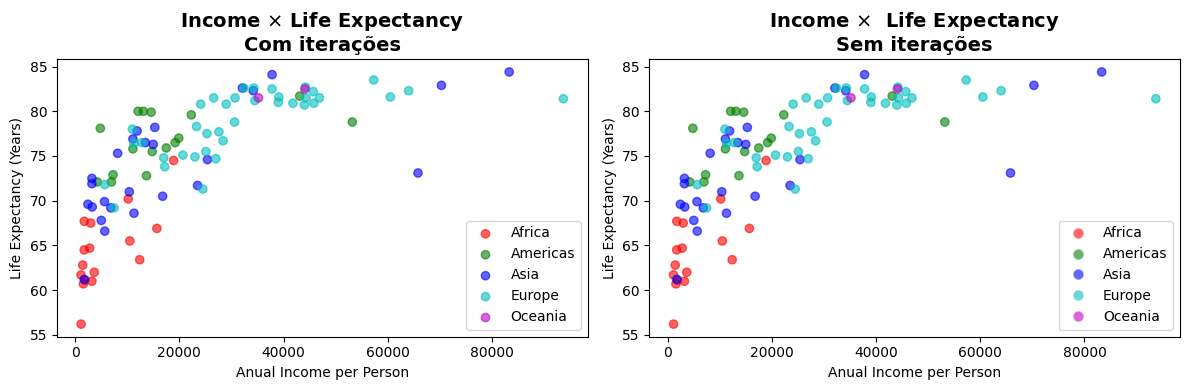

In [184]:
plt.figure(figsize=(12, 4))
colors1 = dict(zip(desenvolvimento_Paises.continent.unique(), ['r','g','b','c','m']))

plt.subplot(1,2,1)
for continent in desenvolvimento_Paises.continent.unique():
  plt.scatter(desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['income_per_person'],
              desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['LifeExpect'] ,
              c=desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['continent'].map(colors1),
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy\nCom iterações', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.subplot(1,2,2)
plt.scatter(desenvolvimento_Paises['income_per_person'],
            desenvolvimento_Paises['LifeExpect'] ,
            c=desenvolvimento_Paises['continent'].map(colors1),
            alpha=0.6)

plt.title('Income $\\times$  Life Expectancy\nSem iterações', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

# Adicionando a legenda
from matplotlib.lines import Line2D
legends = []
for color in colors1.values():
  legends.append( Line2D([0], [0], markerfacecolor=color, marker='o', markersize=8, color='w', alpha=0.6) )

plt.legend(legends, desenvolvimento_Paises['continent'].unique())

plt.tight_layout()
plt.show()



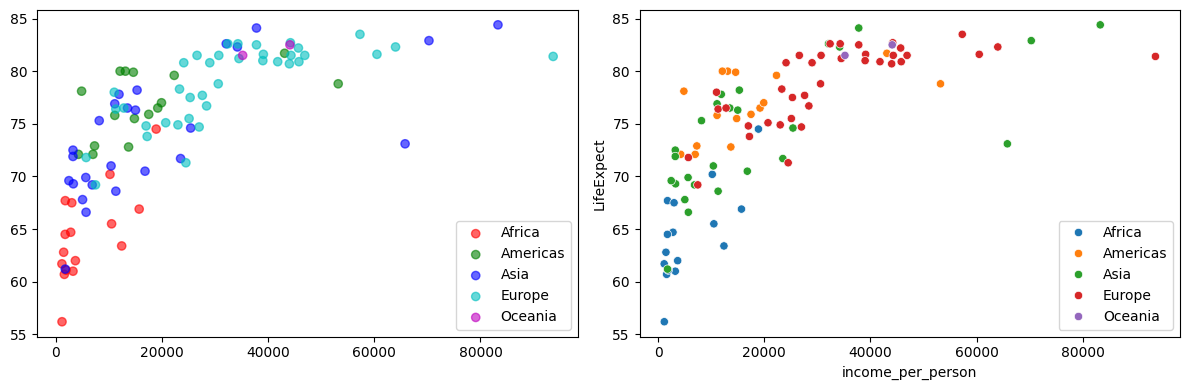

In [185]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
for continent in desenvolvimento_Paises.continent.unique():
  plt.scatter(desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['income_per_person'],
              desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['LifeExpect'] ,
              c=desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['continent'].map(colors1),
              label=continent,
              alpha=0.6)

plt.legend()

plt.subplot(1,2,2)
colors = sns.color_palette(['r','g','b','c','m'])

sns.scatterplot(x=desenvolvimento_Paises['income_per_person'], y=desenvolvimento_Paises['LifeExpect'], hue=desenvolvimento_Paises['continent'])

plt.legend()

plt.tight_layout()
plt.show()



In [188]:
dict(zip(desenvolvimento_Paises.continent.unique(), ['>','+','x','o','*'])) #usando markers

{'Africa': '>', 'Americas': '+', 'Asia': 'x', 'Europe': 'o', 'Oceania': '*'}

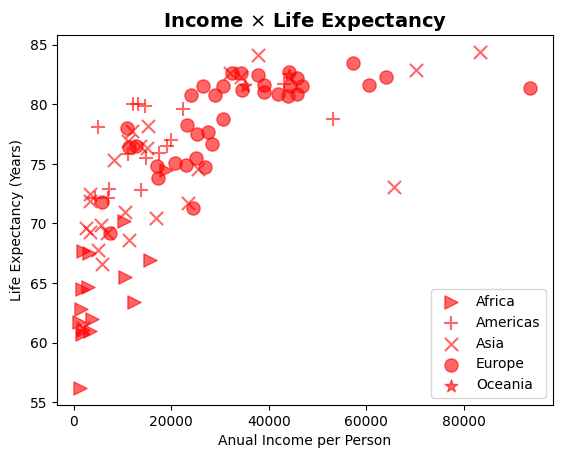

In [187]:
markers = dict(zip(desenvolvimento_Paises.continent.unique(), ['>','+','x','o','*']))

for continent in  desenvolvimento_Paises.continent.unique():
  plt.scatter(desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['income_per_person'],
              desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['LifeExpect'] ,
              marker=markers[continent],
              s=90,
              c='red',
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')
plt.legend()

plt.show()


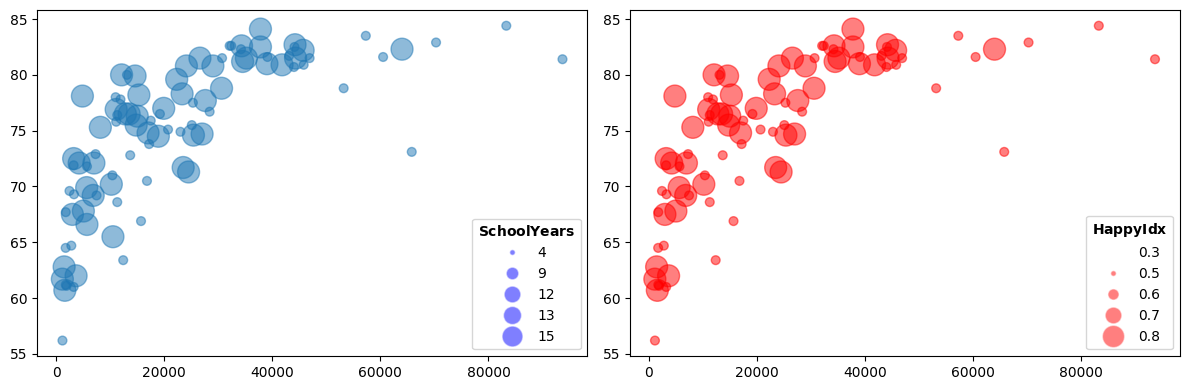

In [189]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(desenvolvimento_Paises['income_per_person'],
              desenvolvimento_Paises['LifeExpect'] ,
              sizes=(40,250),
              s=desenvolvimento_Paises['SchoolYears15_24'],
              alpha=0.5)


from matplotlib.lines import Line2D
legends = []
valores = np.round( desenvolvimento_Paises['SchoolYears15_24'].quantile([0,0.25,0.5,0.75,1]), 0).astype('int')
for size in valores:
  legends.append( Line2D([0], [0], markerfacecolor='blue', marker='o', markersize=size, color='w', alpha=0.5) )

plt.legend( legends,  valores, title='$\\bf{School Years}$')

plt.subplot(1,2,2)
plt.scatter(desenvolvimento_Paises['income_per_person'],
              desenvolvimento_Paises['LifeExpect'] ,
              sizes=(40,250),
              s=desenvolvimento_Paises['HappyIdx'],
              alpha=0.5,
              c='red')

from matplotlib.lines import Line2D
legends = []
valores = np.round( desenvolvimento_Paises['HappyIdx'].quantile([0,0.25,0.5,0.75,1]), 1)
for size, _ in enumerate(valores):
  legends.append( Line2D([0], [0], markerfacecolor='red', marker='o', markersize=size*4, color='w', alpha=0.5) )

plt.legend( legends,  valores, title='$\\bf{Happy Idx}$')

plt.tight_layout()
plt.show()

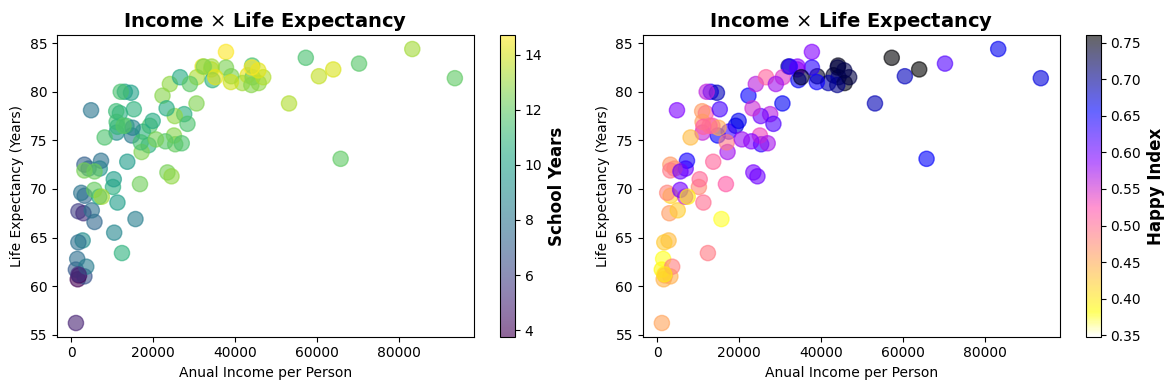

In [190]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(desenvolvimento_Paises['income_per_person'],desenvolvimento_Paises['LifeExpect'], alpha=0.6, s=120, c=desenvolvimento_Paises['SchoolYears15_24'], cmap=cm.viridis )

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar()
cbar.set_label('School Years', fontsize=12, weight='bold')

plt.subplot(1,2,2)
plt.scatter(desenvolvimento_Paises['income_per_person'],desenvolvimento_Paises['LifeExpect'], alpha=0.6, s=120, c=desenvolvimento_Paises['HappyIdx'], cmap=cm.gnuplot2_r)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar()
cbar.set_label('Happy Index', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

<ipython-input-191-db19de81f816>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt_colbar = plt.scatter([], [],


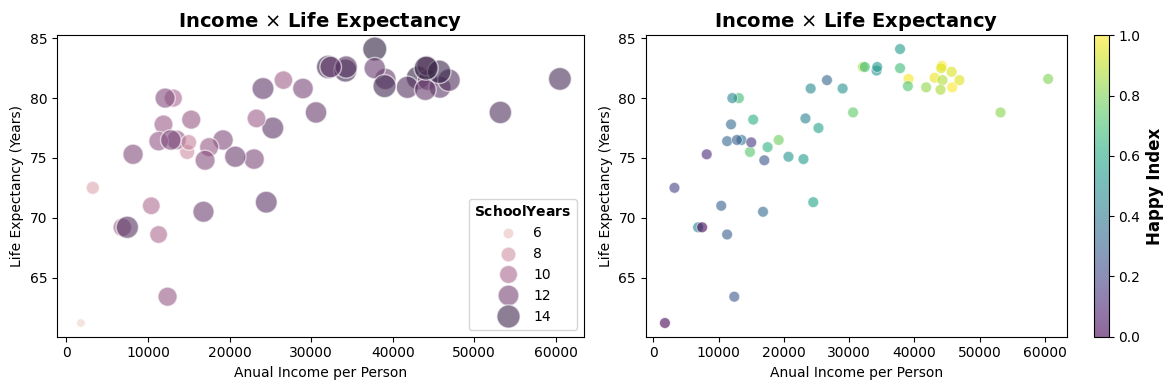

In [191]:
# Seaborn
desenvolvimento_Paises = desenvolvimento_Paises.dropna()
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
scatter= sns.scatterplot(x=desenvolvimento_Paises['income_per_person'],
            y=desenvolvimento_Paises['LifeExpect'] ,
            hue=desenvolvimento_Paises['SchoolYears15_24'],
            sizes=(40,300),
            size=desenvolvimento_Paises['SchoolYears15_24'],
            alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend(title='$\\bf{School Years}$')

plt.subplot(1,2,2)
plt_colbar = plt.scatter([], [],
            s=60,
            alpha=0.6,
            cmap=cm.viridis)

scatter = sns.scatterplot(x=desenvolvimento_Paises['income_per_person'],
            y=desenvolvimento_Paises['LifeExpect'] ,
#            c=desenvolvimento_Paises['HappyIdx'],
            hue=desenvolvimento_Paises['HappyIdx'],
            palette=cm.viridis,
            s=60,
            alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar(plt_colbar)
cbar.set_label('Happy Index', fontsize=12, weight='bold')
scatter.get_legend().remove()

plt.tight_layout()
plt.show()



#### Linha de Ajuste

In [193]:
# Produzindo o ajuste da curva
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*np.log(x) + b

coefs, covar = curve_fit(func, desenvolvimento_Paises['income_per_person'], desenvolvimento_Paises['LifeExpect'])

x = np.linspace(desenvolvimento_Paises['income_per_person'].min(), desenvolvimento_Paises['income_per_person'].max(), 100)
y = func(x,*coefs)

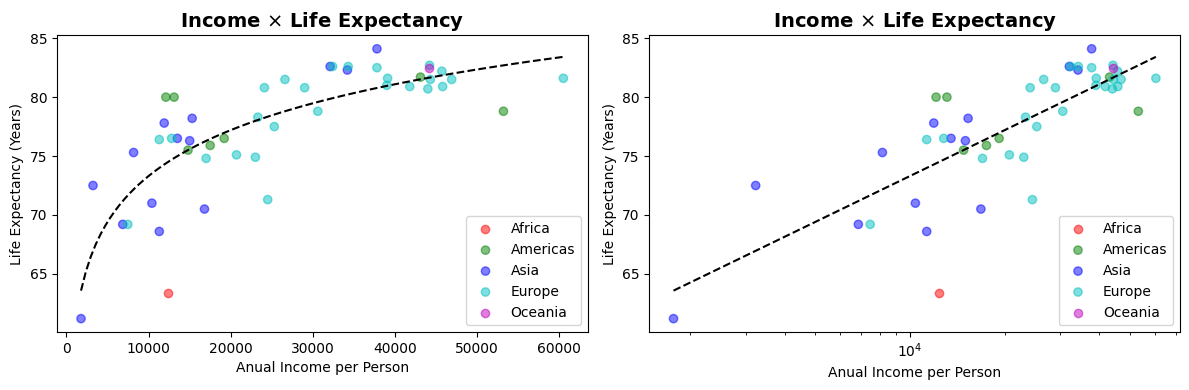

In [194]:
plt.figure(figsize=(12, 4))
colors1 = dict(zip(desenvolvimento_Paises.continent.unique(), ['r','g','b','c','m']))

plt.subplot(1,2,1)
for continent in desenvolvimento_Paises.continent.unique():
  plt.scatter(desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['income_per_person'],
              desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['LifeExpect'] ,
              c=desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['continent'].map(colors1),
              label=continent,
              alpha=0.5)

plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.subplot(1,2,2)
for continent in desenvolvimento_Paises.continent.unique():
  plt.scatter(desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['income_per_person'],
              desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['LifeExpect'] ,
              c=desenvolvimento_Paises[ desenvolvimento_Paises['continent'] == continent ]['continent'].map(colors1),
              label=continent,
              alpha=0.5)

plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

plt.xscale('log')

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend(loc='lower right')


plt.tight_layout()
plt.show()

Você pode notar como o primeiro gráfico se ajusta a uma função logarítmica e, alterando o eixo $x$ para uma escala logarítmica, obtemos o ajuste linear. Veja os coeficientes de correlação obtidos em cada caso.

In [199]:
from IPython.display import display, Math, Latex
Math('\\bf Corr( LifeExpect , Income ) =' +  f'{np.corrcoef(df["income_per_person"],df["LifeExpect"])[0,1]:.3f}')


<IPython.core.display.Math object>

In [198]:

Math('\\bf Corr( LifeExpect , Income ) =' +  f'{np.corrcoef(np.log( df["income_per_person"] ),df["LifeExpect"])[0,1]:.3f}')

<IPython.core.display.Math object>

## Correlação

Pearson - linear, distribuição      parametrico: CONHECEMOS A DISTRIBUIÇÃO   ---> mais informação geramente menor intervalo de confiança --> sabemos como os dados devem se comportar

SPEARMAN - Não distribuição       Não parametrico : não conhecemos a distribuição



conjunto das distribuições paramétricas está contido no conjunto não paramétrico

#### Teoria



A covariância busca mostrar se há um comportamento de **interdependência linear entre duas variáveis** o quê, como você já viu,  não elimina outros tipos de interdependência e não significa necessariamente uma relações de causa efeito.

A covariância de uma amostra é definida como:

$$ s_{xy} = COV(x,y) =\frac{1}{n-1} \sum_{i}^{n}  (x_i - \bar{x})(y_i - \bar{y}) $$
e, da mesma forma, a covariância populacional é dada por:

$$ \sigma_{xy} = COV(x,y) = \frac{1}{n} \sum_{i}^{n} (x_i - \mu_{x})(y_i - \mu_{y}) $$


A covariância, entretanto, é uma medida dimensional e, portanto, afetada pelas unidades de medida empregadas nos conjuntos de dados $x$ e $y$. Para corrigir isso podemos então empregar o coeficiente de correlação, que nada mais é que covariância normalizada (e portanto uma medida adimensional):

O **coeficiente de determinação**, ou mais exatamente o **coeficiente de determinação de Pearson** pode ser então calculado como:

$$ r_{xy} = \frac{COV(x,y)}{\sigma(x) \sigma(y)} $$






### Pratica

In [195]:
df = desenvolvimento_Paises
df.head()

continent       country  year  demox_eiu  income_per_person  invest_%_gdp  \
12    Africa  South Africa  2015       75.6              12400          21.0   
16  Americas     Argentina  2015       70.2              19200          17.1   
17  Americas        Brazil  2015       69.6              14800          17.4   
18  Americas        Canada  2015       90.8              43100          24.1   
20  Americas      Colombia  2015       66.2              13100          26.7   

    tax_%_gdp  gini_index  LifeExpect  HappyIdx  SchoolYears15_24  \
12       27.3        63.1        63.4     0.489             10.80   
16       12.3        41.8        76.5     0.670             11.70   
17       12.8        51.6        75.5     0.655              8.21   
18       12.3        31.7        81.7     0.741             14.30   
20       15.1        51.7        80.0     0.639             10.10   

    VacineBelieve  ChildMortality  Co2Emissions   CPI  Population  \
12          0.064           37.70          8.35  44.0    55400000   
16          0.005           11.50          4.64  32.0    43100000   
17          0.007           15.70          2.42  38.0   204000000   
18          0.062            5.28         16.00  83.0    36000000   
20          0.030           15.70          1.96  37.0    47500000   

    cod_continent  
12              0  
16              1  
17              1  
18              1  
20              1

Uma forma de observamos interdependências lineares dos dados é exibirmos um gráficos de pontos ou de dispersão das duas variáveis.


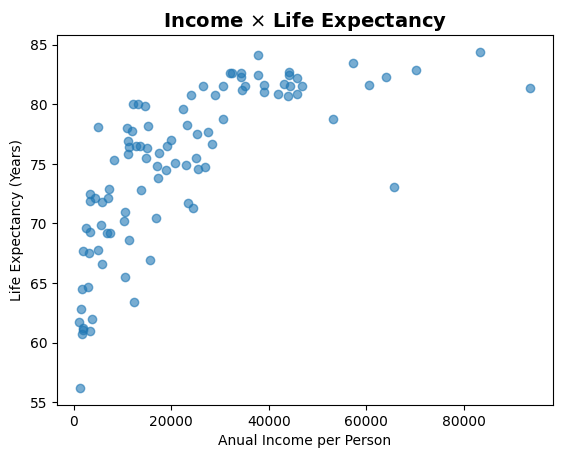

In [80]:
plt.scatter(df['income_per_person'],df['LifeExpect'] , alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.show()



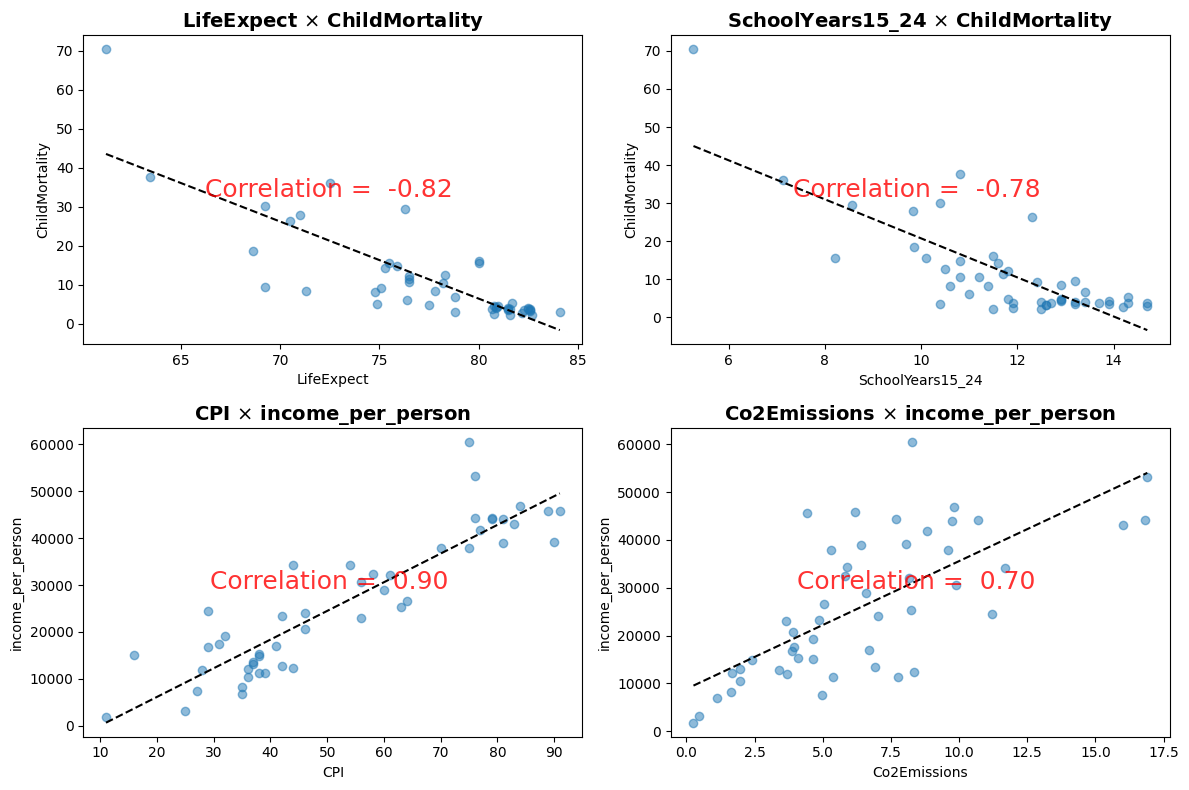

In [196]:
plt.figure(figsize=(12, 8))

def linear(x, a, b):
    return a*x + b

for i, pairs in enumerate( [ ['LifeExpect','ChildMortality',],
                ['SchoolYears15_24','ChildMortality'],
                ['CPI','income_per_person'],
                ['Co2Emissions','income_per_person'] ] ):

  coefs, covar = curve_fit(linear, df[pairs[0]], df[pairs[1]])
  x = np.linspace(df[pairs[0]].min(), df[pairs[0]].max(), 100)
  y = linear(x,*coefs)

  plt.subplot(2,2,i+1)
  plt.scatter(df[pairs[0]], df[pairs[1]], alpha=0.5)

  plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

  texto = f'Correlation =  {df[[pairs[0],pairs[1]]].corr().unstack()[1]:.2f} '
  plt.text(( plt.gca().get_xlim()[1] + plt.gca().get_xlim()[0])/2,
           ( plt.gca().get_ylim()[1] + plt.gca().get_ylim()[0])/2,
           texto, ha='center', va='center', fontsize=18, color='red', alpha=0.8)

  plt.title(pairs[0] + ' $\\times$ ' + pairs[1], fontsize=14, weight='bold')
  plt.xlabel(pairs[0])
  plt.ylabel(pairs[1])

plt.tight_layout()
plt.show()

### Coeficientes de Correlação (Duas Variáveis Quantitativas)

#### **Coeficiente de Pearson (r)**

* O coeficiente de correlação de Pearson mede a relação linear entre duas variáveis contínuas.
* Ele varia de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica ausência de correlação linear.
* É sensível a outliers e assume que as variáveis seguem uma distribuição normal e homocedasticidade
* É adequado para variáveis quantitativas com distribuição aproximadamente normal.

<br>


$$
r = \frac{{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}}{{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}}
$$

onde:
- $x_i$ e $y_i$: Valores individuais das variáveis $x$ e $y$.
- $ \bar{x} $ e $\bar{y}$: Médias das variáveis $x$ e $y$.
- $ n $: Número total de observações.

<br>



#### **Coeficiente de Spearman (ρ)**:

* O coeficiente de correlação de Spearman mede a relação monótona entre duas variáveis, independentemente do tipo de relação (linear ou não).
* Ele é baseado nos postos (ordem) dos dados, em vez dos próprios valores.
Varia de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica ausência de correlação monotônica.
* É menos sensível a outliers do que o coeficiente de Pearson, e pode ser aplicado a qualquer tipo de distribuição.
* É adequado para variáveis quantitativas ou ordinais.

<br>

$$
r = \frac{{\sum_{i=1}^{n} (R_i - \bar{R})(S_i - \bar{S})}}{{\sqrt{\sum_{i=1}^{n} (R_i - \bar{R})^2 \sum_{i=1}^{n} (S_i - \bar{S})^2}}}
$$

ou

$$
\rho = 1 - \frac{{6 \sum_{i=1}^{n} d_i^2}}{{n(n^2 - 1)}}
$$

onde:
- $d_i $: Diferença entre os postos das observações de $ x $ e $ y $.
- $ n $: Número total de observações.

<br>





3. **Coeficiente de Kendall (τ)**:

* O coeficiente de correlação de Kendall mede a relação de concordância ou discordância entre duas variáveis ordinais.
* Ele é baseado na contagem de pares concordantes e discordantes.
* Varia de -1 a 1, onde 1 indica concordância perfeita, -1 indica discordância perfeita e 0 indica ausência de concordância ou discordância.
* É robusto a outliers e adequado para variáveis ordinais.

<br>

$
\tau = \frac{{\text{Número de pares concordantes} - \text{Número de pares discordantes}}}{{\frac{{n(n-1)}}{2}}}
$

onde:
- Número de pares concordantes: Pares de casos onde a ordem de $ x $ é a mesma que a ordem de $ y $.
- Número de pares discordantes: Pares de casos onde a ordem de $ x$ é diferente da ordem de $ y $.
- $ n $: Número total de casos.

*Pares Concordantes*

$$
x = [3, 6, 8, 4, 7] \\
y = [5, 9, 7, 6, 8]
$$

- O par $(3, 5)$, $ x_1 < x_2 $ e $ y_1 < y_2 $, então é um par concordante.
- O par $(6, 9)$, $ x_1 < x_2 $ e $ y_1 < y_2 $, então é um par concordante.
- O par $(8, 7)$, $ x_1 > x_2 $ e $ y_1 < y_2 $, então não é um par concordante.
- O par $(4, 6)$, $ x_1 < x_2 $ e $ y_1 < y_2 $, então é um par concordante.
- O par $(7, 8)$, $ x_1 < x_2 $ e $ y_1 < y_2 $, então é um par concordante.


#### **Coeficiente Cohen's d**

 *d-Cohen*, ou medida de tamanho de efeito d, é uma estatística para quantificar a diferença entre as médias de dois grupos em termos de desvio padrão e empregado para avaliar a magnitude da diferença entre grupos. Os valores positivos indicam que o grupo 1 tem uma média maior do que o grupo 2, e valores negativos indicam que o grupo 1 tem uma média menor do que o grupo 2. Um valor de 0 indica que não há diferença entre as médias dos dois grupos. Seu cálculo é feido do seguinte modo:

$$d = \frac{\bar{x}_1 - \bar{x}_2}{s}$$

Onde $\bar{x}_1$ e $\bar{x}_2$ são as médias dos dois grupos e $s$ é o desvio padrão agrupado, calculado como:

$$s = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}$$

O valor do d-Cohen pode ser interpretado da seguinte forma:

- $\le$ 0,2: efeito pequeno
- $>$ 0,5: efeito médio
- $>$ 0,8: efeito grande  




In [175]:
def cohen_d(x1, x2):
    mean_x1 = np.mean(x1)
    mean_x2 = np.mean(x2)

    std_x1 = np.std(x1, ddof=1)
    std_x2 = np.std(x2, ddof=1)

    n1 = len(x1)
    n2 = len(x2)

    pooled_std = np.sqrt(((n1 - 1) * std_x1 ** 2 + (n2 - 1) * std_x2 ** 2) / (n1 + n2 - 2))
    d = (mean_x1 - mean_x2) / pooled_std

    return d

x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([6, 7, 8, 9, 10, 11, 12])

d = cohen_d(x1, x2)
print("Coeficiente de Cohen's d:", d)

d = cohen_d(x2, x1)
print("Coeficiente de Cohen's d:", d)

d = cohen_d(x2, x2)
print("Coeficiente de Cohen's d:", d)

d = cohen_d(x2, 2*x2)
print("Coeficiente de Cohen's d:", d)

d = cohen_d(x2, 3*x2)
print("Coeficiente de Cohen's d:", d)

d = cohen_d(x2, 4*x2)
print("Coeficiente de Cohen's d:", d)

Coeficiente de Cohen's d: -3.077935056255462
Coeficiente de Cohen's d: 3.077935056255462
Coeficiente de Cohen's d: 0.0
Coeficiente de Cohen's d: -2.6349301969610393
Coeficiente de Cohen's d: -3.7263540204487127
Coeficiente de Cohen's d: -4.286974604602201


#### Cálculo dos Coeficientes em Python

Pearson (r): 0.9006752160894268
Spearman (ρ): 0.8760516051605161
Kendall (τ): 0.707878787878788


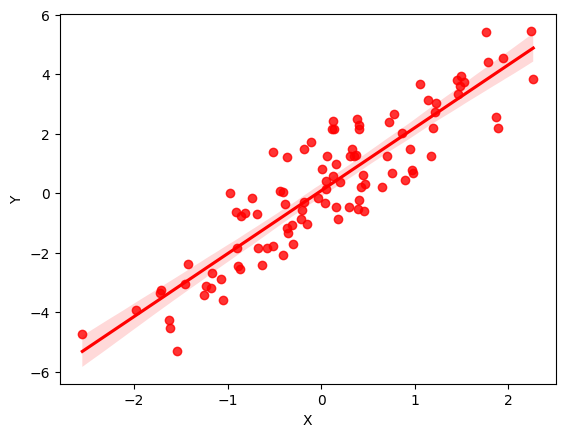

In [174]:
from scipy.stats import pearsonr, spearmanr, kendalltau

np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 1, 100)  # linear

sns.regplot(x=x, y=y, color='r')
plt.xlabel('X')
plt.ylabel('Y')

r, _ = pearsonr(x, y)
rho, _ = spearmanr(x, y)
tau, _ = kendalltau(x, y)

print("Pearson (r):", r)
print("Spearman (ρ):", rho)
print("Kendall (τ):", tau)

plt.show()


## Correlogramas

Correlogramas nada mais são do que vários gráficos de pontos de diferentes pares de variáveis. Desse modo, você explora as relações dos dados analisando separadamente cada par de variáveis. É uma forma de evitarmos o *overplotting* e dividirmos o problema da análise de  relações em várias partes.

Podemos fazer isso com o `Matplotlib`, mas havendo várias variáveis pode ser necessário fazer um laço de programa para produzir os diferentes gráficos de dispersão de cada par de variável (em geral empregamos somente as quantitativas, numéricas) e logo a seguir você verá um laço de programa como esse. Mas essa tarefa pode ser um tanto tediosa.

O `Seaborn` fornece uma função para exibir, em um único comando, os diferentes pares de variáveis e é, geralmente, a forma mais simples e empregada. Apenas para fins de apresentação no texto limitamos a quantidade de pares de variáveis a serem exploradas. De qualquer modo, embora possível, é recomendável evitar execuções do tipo `sns.pairs(df)` que exibirão *todas* as relações. Elas levarão muito tempo para serem processadas e, em muitos casos, produzem gráficos desnecessários (variáveis categóricas também serão incluídas neste caso).

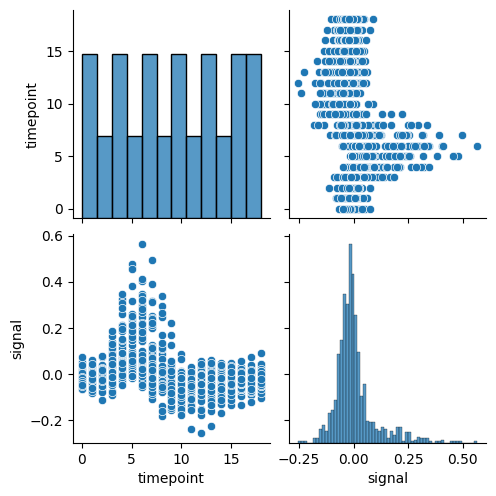

In [68]:
sns.pairplot(df1)
plt.show()

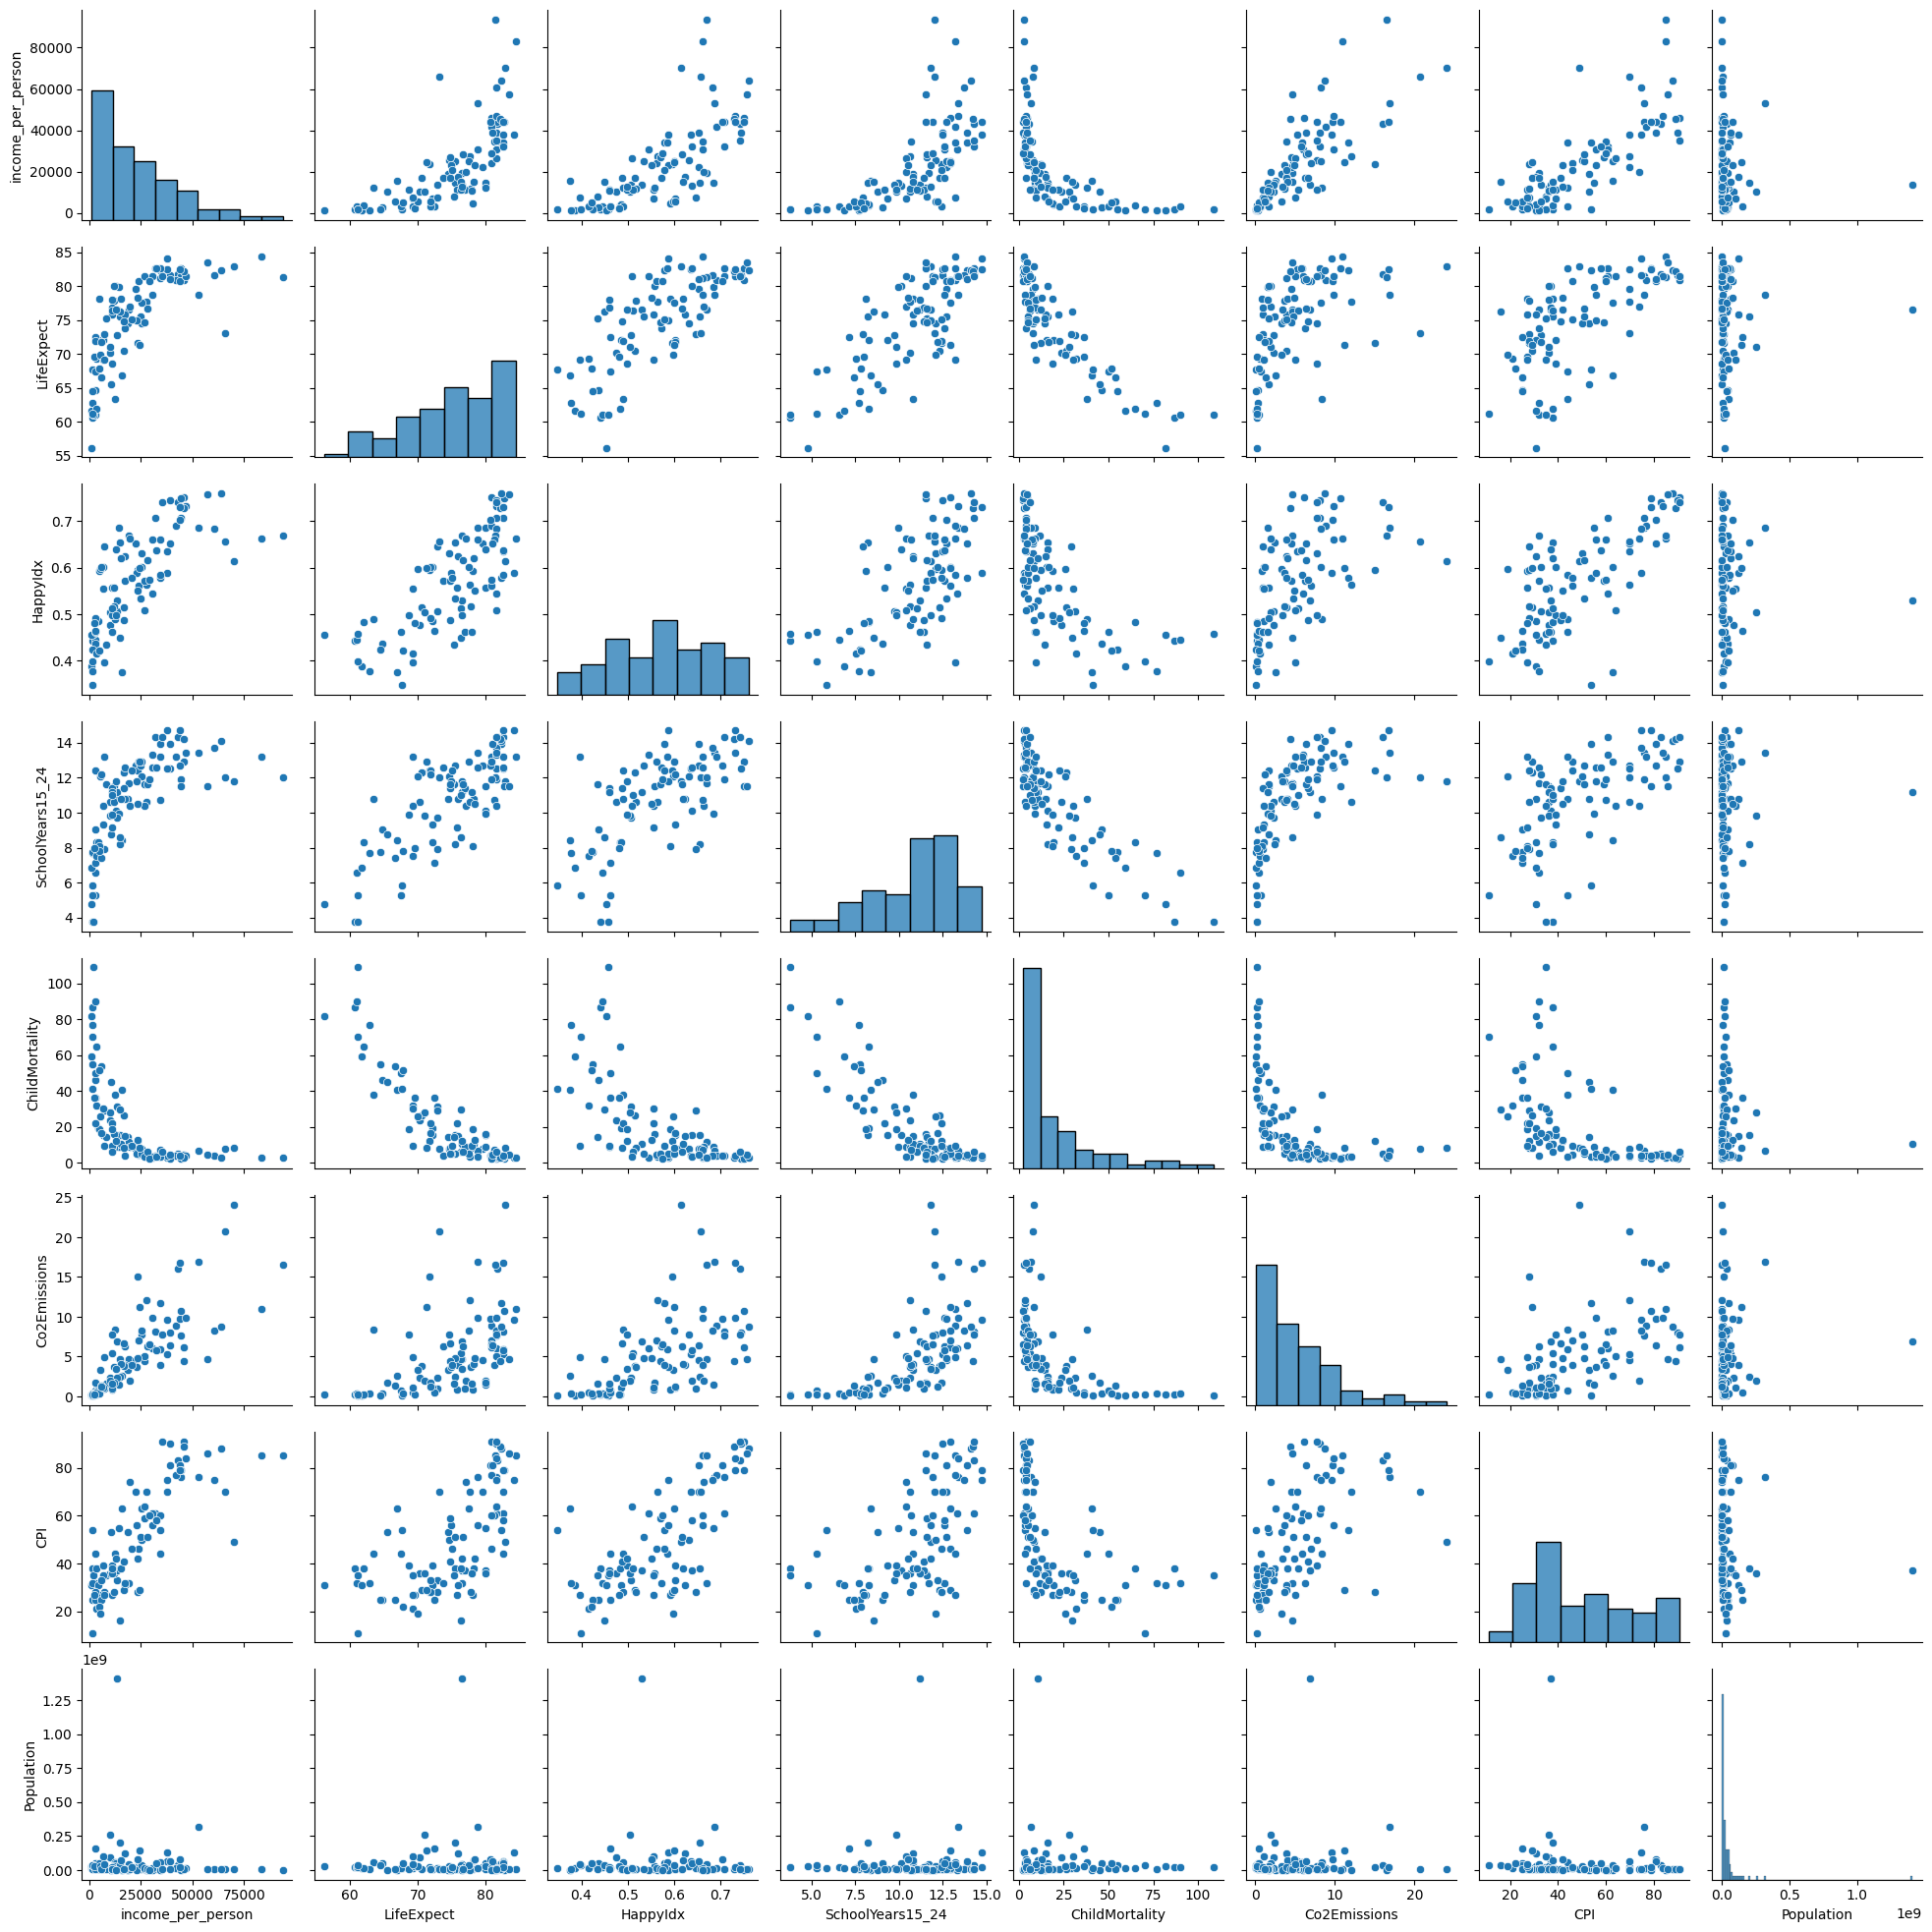

In [83]:
sns.pairplot(desenvolvimento_Paises[['income_per_person', 'LifeExpect', 'HappyIdx','SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
            'CPI', 'Population']])
plt.show()

In [84]:
pd.options.display.max_rows = 999
desenvolvimento_Paises[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr()

income_per_person  LifeExpect  HappyIdx  SchoolYears15_24  \
income_per_person           1.000000    0.710835  0.727471          0.652686   
LifeExpect                  0.710835    1.000000  0.750452          0.772257   
HappyIdx                    0.727471    0.750452  1.000000          0.661920   
SchoolYears15_24            0.652686    0.772257  0.661920          1.000000   
ChildMortality             -0.600019   -0.878321 -0.656261         -0.851195   
Co2Emissions                0.796020    0.532751  0.558667          0.628866   
CPI                         0.805391    0.651758  0.729569          0.583404   
Population                 -0.052656    0.017118 -0.030911          0.023106   

                   ChildMortality  Co2Emissions       CPI  Population  
income_per_person       -0.600019      0.796020  0.805391   -0.052656  
LifeExpect              -0.878321      0.532751  0.651758    0.017118  
HappyIdx                -0.656261      0.558667  0.729569   -0.030911  
SchoolYears15_24        -0.851195      0.628866  0.583404    0.023106  
ChildMortality           1.000000     -0.542851 -0.527718   -0.039804  
Co2Emissions            -0.542851      1.000000  0.558390    0.059660  
CPI                     -0.527718      0.558390  1.000000   -0.086626  
Population              -0.039804      0.059660 -0.086626    1.000000

In [85]:
desenvolvimento_Paises[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr().abs().unstack().drop_duplicates().sort_values(ascending=False).nlargest(5)

income_per_person  income_per_person    1.000000
LifeExpect         ChildMortality       0.878321
SchoolYears15_24   ChildMortality       0.851195
income_per_person  CPI                  0.805391
                   Co2Emissions         0.796020
dtype: float64

## Normalização

Para aplicar a normalização você pode aplicar simplesmente uma normalização *min/max*. Para dados unicamente positivos basta dividir cada valor pelo valor máximo da série de dados, o que levar cada valor para o intervalo $[0,1]$ (verifique na fórmula abaixo essa afirmação!). Na presença de valores negativos, entretanto, é necessário aplicar a fórmula:

$$ X_\text{normal} = \frac{X - X_\text{min}}{X_\text{max} - X_\text{min}} $$


Mas aqui vamos adotar um procedimento muito usado, e igualmente simples, aplicando uma normalização conhecida como *standard scaler*, estandardização, ou  que normaliza os valores levando o conjunto de dados a uma média 0 e desvio padrão 1.

$$ z = \frac{x - \bar{x}}{\sigma(x)}$$

## Incerteza

Muitas vezes o valores médios apresentados nos gráficos anteriores podem esconder discrepâncias, como no caso de haver poucas instâncias de dados para um determinado rad. Faça um gráfico de barras para identificar os valores de casas que apresentam maior e menor incerteza.

Para que índices de acessibilidade os valores apresentados das casas apresentam maior e menor incerteza?

Você poderia pensar em empregar um histograma... mas não parece uma boa ideia.

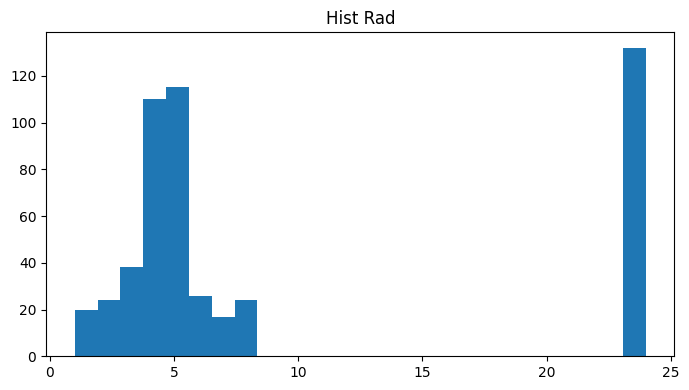

In [147]:
fig, ax = plt.subplots(figsize=(7,4))

ax.hist(x=boston.rad,bins=25)
ax.set_title('Hist Rad - ERRADO')

plt.tight_layout()
plt.show()

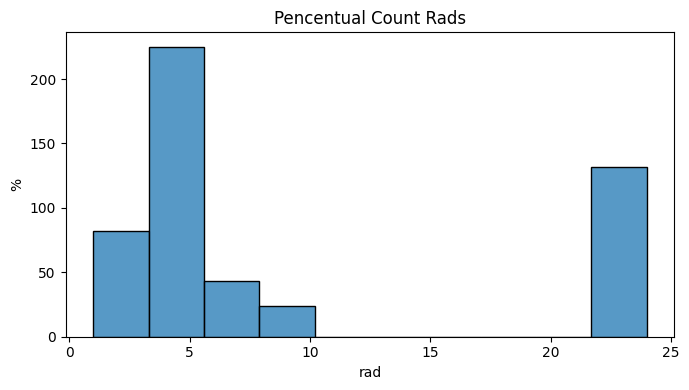

In [149]:
fig, ax = plt.subplots(figsize=(7,4))

ax = sns.histplot(x='rad',data=boston)
ax.set_title('Pencentual Count Rads')
ax.set_ylabel('%')

plt.tight_layout()
plt.show()

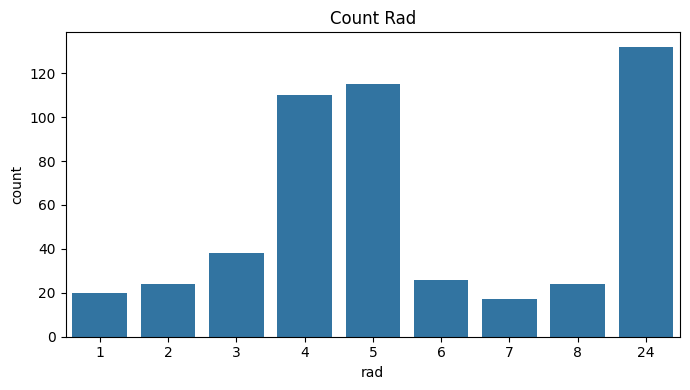

In [151]:
fig, ax = plt.subplots(figsize=(7,4))
# Uma boa solução nestes casos é empregarmos sns.countplot(), caso você conheça esta função...
sns.countplot(x=boston.rad,ax=ax)
ax.set_title('Count Rad')

plt.tight_layout()
plt.show()

In [152]:
boston_group = np.round( boston.groupby('rad')['rad'].count() / len(boston) * 100 , 2 )
boston_group

rad
1      3.95
2      4.74
3      7.51
4     21.74
5     22.73
6      5.14
7      3.36
8      4.74
24    26.09
Name: rad, dtype: float64

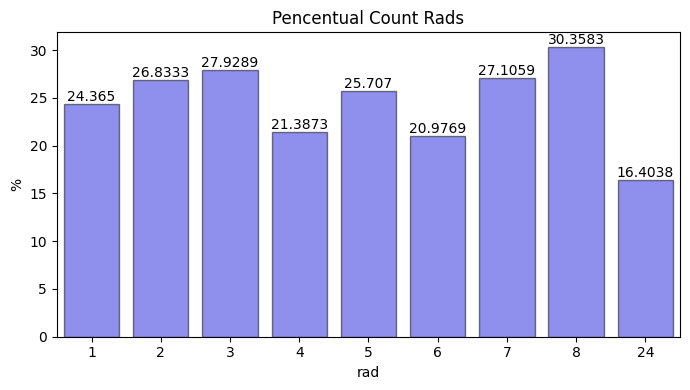

In [153]:
fig, ax = plt.subplots(figsize=(7,4))

ax = sns.barplot(x=df_group.index,y=df_group,ax=ax,color='blue',edgecolor='k',alpha=0.5)
ax.set_title('Pencentual Count Rads')
ax.set_ylabel('%')
ax.bar_label(ax.containers[0], fontsize=10);

plt.tight_layout()
plt.show()

## Intervalos de Confiança e Testes de Hipótese

In [261]:

from scipy import stats
from scipy.stats import norm, t

### Intervalo de Confiança (IC) para a média uma população e uma amostra (Distribuição Normal)

Quando temos dados de **uma população**, podemos calcular a média e o desvio padrão exatos. A fórmula para o IC da média da população pode ser então calculado como:

$$ IC = \mu \pm Z_{\alpha/2} \cdot \left(\frac{\sigma}{\sqrt{n}}\right) $$
onde:
- $\mu$ é a média da população.
- $Z_{\alpha/2}$ é o valor crítico da distribuição normal (para um nível de confiança $(1-\alpha)$.
- $\sigma$ é o desvio padrão da população.
- $n$ é o tamanho da população.

Para **uma amostra** fazemos uma aproximação pela distribuição de t-student.

$$ IC = \bar{x} \pm t_{\alpha/2, n-1} \cdot \left(\frac{s}{\sqrt{n}}\right) $$
onde:
- $\bar{x}$ é a média da população.
- $t_{\alpha/2, n-1}$ é o valor crítico da distribuição t de Student (para um nível de confiança $(1-\alpha)$ e $n-1$ graus de liberdade).  
- $s$ é o desvio padrão da amostra.
- $n$ é o tamanho da população.

Na prática, para $n \ge 30$ ambos são valores muito próximos.





In [262]:
dados = np.array([2.3, 2.1, 3.5, 2.8, 3.3, 3.0, 2.7])
# dados = np.random.normal(size=1000) # Tente esse agora

n = len(dados)
media_amostra = np.mean(dados)
desvio_padrao_amostra = np.std(dados, ddof=1)
nivel_confianca = 0.95

# População
z_critico = stats.norm.ppf((1 + nivel_confianca) / 2)

margem_erro = z_critico * (desvio_padrao_amostra / np.sqrt(n))

IC_inferior = media_amostra - margem_erro
IC_superior = media_amostra + margem_erro
print(f"IC para a população: ({IC_inferior:.2f}, {IC_superior:.2f}), Intervalo = ({IC_superior - IC_inferior:.2f})")

# Amostra
t_critico = stats.t.ppf((1 + nivel_confianca) / 2, df=n-1)

margem_erro = t_critico * (desvio_padrao_amostra / np.sqrt(n))

IC_inferior = media_amostra - margem_erro
IC_superior = media_amostra + margem_erro
print(f"IC para a amostra  : ({IC_inferior:.2f}, {IC_superior:.2f}), Intervalo = ({IC_superior - IC_inferior:.2f})")


IC para a população: (2.44, 3.19), Intervalo = (0.75)
IC para a amostra  : (2.35, 3.28), Intervalo = (0.93)


Usando  `norm.interval()`, `t.interval()`

In [263]:
IC_inferior, IC_superior = norm.interval(nivel_confianca, loc=media_amostra, scale=desvio_padrao_amostra/np.sqrt(n))
print(f"IC para a população: ({IC_inferior:.2f}, {IC_superior:.2f}), Intervalo = ({IC_superior - IC_inferior:.2f})")

IC_inferior, IC_superior = t.interval(nivel_confianca, loc=media_amostra, scale=desvio_padrao_amostra/np.sqrt(n), df=n-1)
print(f"IC para a amostra  : ({IC_inferior:.2f}, {IC_superior:.2f}), Intervalo = ({IC_superior - IC_inferior:.2f})")

IC para a população: (2.44, 3.19), Intervalo = (0.75)
IC para a amostra  : (2.35, 3.28), Intervalo = (0.93)


**Hipótese Estatística:** Uma hipótese estatística é geralmente uma afirmação sobre um conjunto de parâmetros de uma distribuição populacional.

<br>

* **$H_0$ (Hipótese Nula):** A hipótese nula é uma hipótese estatística a ser testada e aceita ou rejeitada em favor de uma alternativa.

Exemplos:
* A média dos valores é igual a $\bar{x}$.
* A média de dois conjuntos A e B de dados é igual.
* A média de A é maior que B.
* A é linearmente dependente de B.
* A é dependente de B.

etc.


* **$H_1$ (Hipótese Alternativa):** Uma hipótese alternativa é uma teoria oposta em relação à hipótese nula.

<br>

**Erro de tipo $\mathrm{I}$**

Diz-se que o erro de tipo $\mathrm{I}$ ocorre se o teste solicitar incorretamente a rejeição de $H_0$ quando estiver realmente correto.

$\alpha = P(Rejeita \ H_0\ |\ H_0\ is\ true)$

<br>

**Erro de tipo $\mathrm{II}$**

O erro de tipo $\mathrm{II}$ ocorre se o teste solicitar a aceitação de $H_0$ quando for falso.

$\beta = P(Aceita \ H_0\ |\ H_0\ is \ not \ true)$

<br>

**Nível de significância**

Sempre que $H_0$ for verdadeiro, sua probabilidade de ser rejeitado nunca é maior que $\alpha$. O valor $\alpha$, chamado de nível de significância do teste, geralmente é definido antecipadamente, sendo os valores comumente escolhidos $\alpha = 0,1, 0,05, 0,005$.

<br>

**P_value**

O valor P, ou probabilidade calculada, é a probabilidade de encontrar os resultados observados, ou mais extremos, quando a hipótese nula (H 0) de uma questão de estudo é verdadeira - a definição de 'extremo' depende de como a hipótese está sendo testada.

Se o seu valor P for menor que o nível de significância escolhido, então você rejeita a hipótese nula, ou seja, aceita que sua amostra fornece evidências razoáveis para apoiar a hipótese alternativa.




| Teste Estatístico               | Situação                                          | Tipo dos Dados | Paramétrico/ Não Paramétrico | Distribuição dos Dados        |
|--------------------------------|---------------------------------------------------|----------------|-------------------------------|-------------------------------|
| Teste t (unpaired)             | Comparar média de duas amostras independentes     | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste t (paired)               | Comparar média de duas amostras pareadas          | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste z                         | Comparar proporção de uma amostra com um valor conhecido | Numérico    | Paramétrico                   | Aproximação normal (n > 30)  |
| ANOVA                          | Comparar média de três ou mais grupos independentes | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| ANOVA de Medidas Repetidas     | Comparar médias em várias ocasiões                | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Wilcoxon (Mann-Whitney U) | Comparar medianas de duas amostras independentes | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Wilcoxon Signed-Rank  | Comparar medianas de duas amostras pareadas       | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Kruskal-Wallis        | Comparar medianas de três ou mais grupos independentes | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Qui-quadrado                    | Testar independência entre duas variáveis categóricas | Categórico     | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Dependência (ex: Correlação de Pearson) | Testar dependência entre duas variáveis numéricas | Numérico | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Friedman              | Comparar médias de três ou mais grupos pareados   | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Fisher (ANOVA Multivariada) | Comparar média de três ou mais grupos independentes (MANOVA) | Numérico | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Welch (t)              | Comparar média de duas amostras independentes     | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |


### Teste Bi-lateral (Bi-caudal)

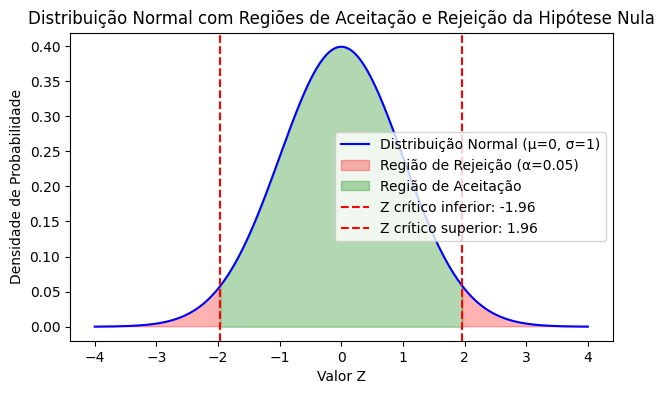

In [264]:
media = 0
desvio_padrao = 1

# Valor crítico para alpha = 0.05 (95% de confiança)
alpha = 0.05
z_critico_inferior = stats.norm.ppf(alpha / 2)
z_critico_superior = stats.norm.ppf(1 - alpha / 2)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, media, desvio_padrao)

plt.figure(figsize=(7,4))
plt.plot(x, y, label='Distribuição Normal (μ=0, σ=1)', color='blue')
plt.fill_between(x, y, where=(x <= z_critico_inferior) | (x >= z_critico_superior), color='red', alpha=0.3, label='Região de Rejeição (α=0.05)')
plt.fill_between(x, y, where=(x > z_critico_inferior) & (x < z_critico_superior), color='green', alpha=0.3, label='Região de Aceitação')
plt.axvline(z_critico_inferior, color='red', linestyle='--', label=f'Z crítico inferior: {z_critico_inferior:.2f}')
plt.axvline(z_critico_superior, color='red', linestyle='--', label=f'Z crítico superior: {z_critico_superior:.2f}')

plt.title('Distribuição Normal com Regiões de Aceitação e Rejeição da Hipótese Nula')
plt.xlabel('Valor Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend(fontsize=10)
plt.show()


### Teste-Unilateral (Uni-caudal)

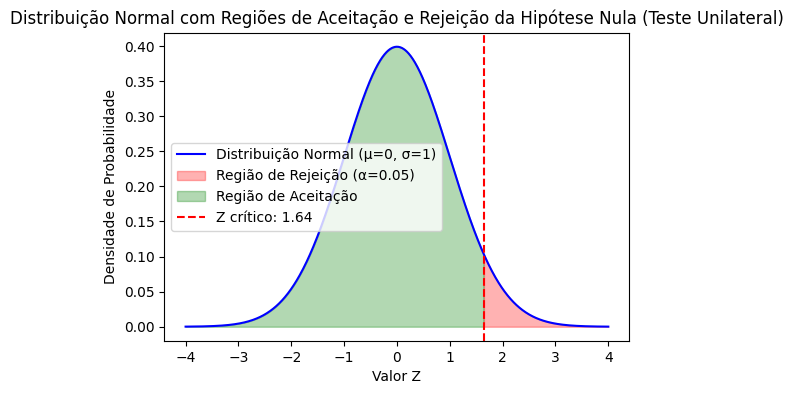

In [265]:
media = 0
desvio_padrao = 1

# Valor crítico para alpha = 0.05 (unilateral à direita)
alpha = 0.05
z_critico = stats.norm.ppf(1 - alpha)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, media, desvio_padrao)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='Distribuição Normal (μ=0, σ=1)', color='blue')
plt.fill_between(x, y, where=(x >= z_critico), color='red', alpha=0.3, label='Região de Rejeição (α=0.05)')
plt.fill_between(x, y, where=(x < z_critico), color='green', alpha=0.3, label='Região de Aceitação')
plt.axvline(z_critico, color='red', linestyle='--', label=f'Z crítico: {z_critico:.2f}')

plt.title('Distribuição Normal com Regiões de Aceitação e Rejeição da Hipótese Nula (Teste Unilateral)')
plt.xlabel('Valor Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()


### Teste de Hipotes

In [270]:
media_homens = 35
media_mulheres = 30
desvio_padrao_homens = 5
desvio_padrao_mulheres = 4
tamanho_amostra = 50

amostra_homens = np.random.normal(media_homens, desvio_padrao_homens, tamanho_amostra)
amostra_mulheres = np.random.normal(media_mulheres, desvio_padrao_mulheres, tamanho_amostra)

In [271]:
t_stat, p_valor = stats.ttest_ind(amostra_homens, amostra_mulheres)

print("Estatística t:", t_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar diferença das médias.")

Estatística t: 5.91396444332017
Valor p: 4.8881803250313146e-08

Rejeita a hipótese nula - as médias são estatisticamente diferentes.


### Testes de Hipóteses: Paramétricos $\times$ Não Paramétricos

Testes Paramétricos assumem uma distribuição normal dos dados (ou alguma outra distribuição específica) requerendo outros pressupostos, como variância constante, mas têm poder estatístico maior quando os pressupostos são atendidos. Já os Testes Não Paramétricos, não assumem distribuição específica dos dados, são mais flexíveis e robustos, mas geralmente têm menor poder estatístico.

* **Testes Paramétricos** $\longrightarrow$ Distribuição normal, variância constante, grandes amostras, valores contínuos.
* **Testes Não Paramétricos** $\longrightarrow$ Distribuição desconhecida ou não normal, pequenas amostras, valores ordinais ou categóricos ,grande presença de *outliers*

**Cuidado: usar teste paramétricos violando os pressupostos pode levar a resultados e conclusões erradas! O cálculo sempre pode ser feito, mas a interpretação e adequação do teste está com você!**

<br>
<br>

### Teste de hipóteses para comparar duas médias $μ_1$ e $μ_2$ de duas populações

Sejam $X_1$ e $X_2$ as duas variáveis aleatórias de interesse com médias $\mu_1$ e $\mu_2$, respectivamente, e variâncias $\sigma_1$ e $\sigma_2$ respectivamente.
\
As hipóteses de interesse são:

> $H_0:μ_A=μ_B$

> $H_a:μ_A \ne μ_B$ ou $H_a:μ_A < μ_B$ ou $H_a:μ_A > μ_B$


É necessário que as amostras aleatórias das duas populações sejam independentes.

*   **Para tamanhos de amostras grandes**
1.  Variâncias ($\sigma_1$ e $\sigma_2$) conhecidas é iguais (difícil de encontrar na prática)
\
Usaremos a distribuição Normal padrão para calcular o valor-p (valor aproximado). O valor-p será exato se as duas v.a. tiveram distribuições normais.
2. Variâncias ($\sigma_1$ e $\sigma_2$) desconhecidas, porém iguais
\
Usaremos a distribuição t-student com $n_1+n_2-2$ graus de liberdade se as duas v.a. tiveram distribuições normais. Caso contrário, podemos usar a aproximação da distribuição normal uma vez que os tamanhos das amostras serão grandes.
3. Variâncias ($\sigma_1$ e $\sigma_2$) desconhecidas diferentes
\
Usaremos a distribuição t-student com $p$ graus de liberdade (calculados em função das variâncias amostrais) se as duas v.a. tiveram distribuições normais. Caso contrário, podemos usar a aproximação da distribuição normal uma vez que os tamanhos das amostras são grandes.


#### Exemplos 1, `ttest`, `ztest`

Agora estamos interessados em verificar se os salários médios dos homens e as mulheres na companhia Glassdoor são diferentes.
Vamos verificar estatísticamente usando os dados da base Glassdoor

In [273]:
HM.head()

jobtitle  gender  age  performance education      department  \
0     Graphic Designer  Female   18            5   College      Operations   
1    Software Engineer    Male   21            5   College      Management   
2  Warehouse Associate  Female   19            4       PhD  Administration   
3    Software Engineer    Male   20            5   Masters           Sales   
4     Graphic Designer    Male   26            5   Masters     Engineering   

   seniority  income  bonus  
0          2   42363   9938  
1          5  108476  11128  
2          5   90208   9268  
3          4  108080  10154  
4          5   99464   9319

In [274]:
# Estatística descritiva

incomeFemale = HM[HM.gender == 'Female'].income
incomeMale = HM[HM.gender == 'Male'].income

print('Média de Salários:')
print('Homens: {:.2f}'.format(incomeMale.mean()))
print('Mulheres: {:.2f}'.format(incomeFemale.mean()))
print('Diferença da média salarial é de {:.2f} ou {:.2f}%'.format(
        incomeMale.mean() - incomeFemale.mean(), 100*(incomeMale.mean() - incomeFemale.mean())/ incomeMale.mean()))
print("")
print('Desvio padrão de Salários:')
print('Homens: {:.2f}'.format(incomeMale.std()))
print('Mulheres: {:.2f}'.format(incomeFemale.std()))


Média de Salários:
Homens: 98457.55
Mulheres: 89942.82
Diferença da média salarial é de 8514.73 ou 8.65%

Desvio padrão de Salários:
Homens: 25517.52
Mulheres: 24378.28


Note que, aparentemente, os salários médio dos homens é maior quando comparado com o salário médio das mulheres. No entanto, observa-se um alta variabilidade nos salários destes dois grupo.

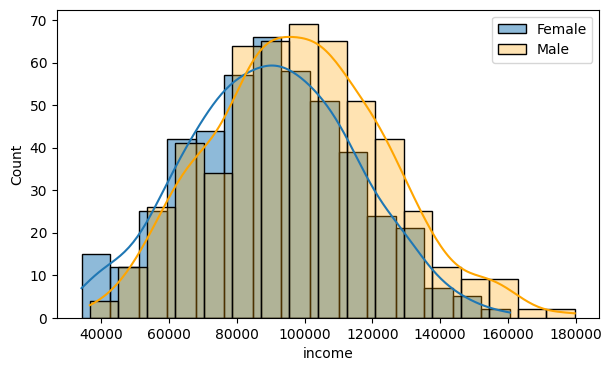

In [275]:
# Histogramas

fig = plt.figure(figsize=(7,4))
sns.histplot(incomeFemale,label='Female',kde=True)
sns.histplot(incomeMale,color='orange',alpha=0.3,label='Male',kde=True)

plt.legend()
plt.show()

# Operações

In [69]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [70]:
display( wine.country.value_counts()[0:10] )
print( 'Percentual de vinhos nacionais: ', wine[wine.country == 'Brazil'].country.count() / len(wine))
display( wine.isnull().sum() / len(wine) )

country
US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: count, dtype: int64

Percentual de vinhos nacionais:  0.00040008925067899764


Unnamed: 0               0.000000
country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

In [71]:
pd.DataFrame(wine.country.value_counts()).reset_index()[23:30]

country  count
23  Croatia     73
24   Mexico     70
25  Moldova     59
26   Brazil     52
27  Lebanon     35
28  Morocco     28
29     Peru     16

##### Maiores e menores

In [72]:
wine.loc[wine.price.nlargest(5).index][['country','title','variety','price']]

country                                              title  \
80290   France               Château les Ormes Sorbet 2013  Médoc   
15840   France                       Château Pétrus 2014  Pomerol   
98380   France     Domaine du Comte Liger-Belair 2010  La Romanée   
120391      US  Blair 2013 Roger Rose Vineyard Chardonnay (Arr...   
65352   France                       Château Pétrus 2011  Pomerol   

                         variety   price  
80290   Bordeaux-style Red Blend  3300.0  
15840   Bordeaux-style Red Blend  2500.0  
98380                 Pinot Noir  2500.0  
120391                Chardonnay  2013.0  
65352   Bordeaux-style Red Blend  2000.0

In [73]:
wine.loc[wine.price.nsmallest(5).index][['country','title','variety','price']]

country                                              title  \
1987       Spain  Felix Solis 2013 Flirty Bird Syrah (Vino de la...   
20484         US             Dancing Coyote 2015 White (Clarksburg)   
29553  Argentina          Broke Ass 2009 Red Malbec-Syrah (Mendoza)   
31530         US                  Bandit NV Chardonnay (California)   
59507         US    Pam's Cuties NV Unoaked Chardonnay (California)   

            variety  price  
1987          Syrah    4.0  
20484   White Blend    4.0  
29553  Malbec-Syrah    4.0  
31530    Chardonnay    4.0  
59507    Chardonnay    4.0

https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_EDA.ipynb#scrollTo=VwY-pDIY9NTQ


https://colab.research.google.com/drive/1vc9_s2uTx9hoNLqrfLQpRbkNj_M-GBrZ?usp=sharing

# Exercicios

## Distribuição

In [233]:
from scipy.stats import lognorm, norm, expon, weibull_min

As vendas diárias de uma loja têm média de R$ 5000. Em geral o volume de vendas tem uma distribuição lognorm. O valor do desvio padrão da distribuição lognormal é 0.5 (note, este é s, shape da distribuição lognorm).


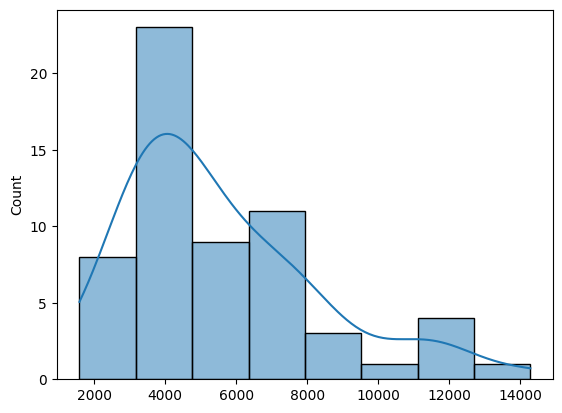

array([11263.9864252 ,  3682.38155891,  3839.53795946,  2924.00309789,
        7707.09803598,  1581.96629529, 11963.30196612,  3417.24428614,
        5864.73595401,  4413.87383583])

In [234]:

np.random.seed(1)
x = lognorm.rvs(s=0.5, scale=5000, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

In [235]:
shape, loc, scale = lognorm.fit(x, floc=0)  # floc=0 força o deslocamento (loc) a ser 0
shape, loc, scale


(0.4632259381029043, 0, 5020.82910233391)

In [236]:
lognorm.cdf(3000,s=0.5,scale=5000) #Qual a probabilidade das vendas ficarem abaixo de R$ 3000.

0.15347299656473

In [238]:
1 - lognorm.cdf(8000,s=0.5,scale=5000) # Qual a probabilidade das vendas ficarem acima de R$ 8000.


0.17360691875027223

In [239]:
lognorm.ppf(1 - 0.9,s=0.5,scale=5000) # Qual o valor mínimo que você pode esperar vender em 90% dos dias? (renda mínima garantida)

2634.4175914801826


A fila de atendimento de um serviço de saúde tem nos finais de semana taxa de chegada de 3 pacientes por hora e taxa de atendimento (serviço) de 4 pacientes por hora. Filas desse tipo são modeladas com distribuição exponencial (poisson).

Dica: Empregue `mean_time_in_system = 1 / (mu_service - lambda_arrival)` para sua distribuição, e sempre `mu_service > lambda_arrival`.



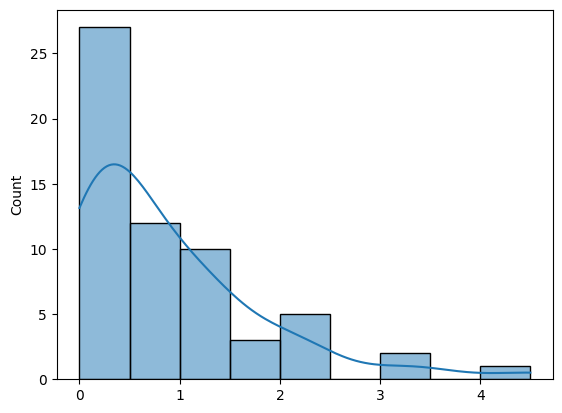

array([5.39605837e-01, 1.27412525e+00, 1.14381359e-04, 3.60012755e-01,
       1.58709595e-01, 9.68838717e-02, 2.06114634e-01, 4.23976482e-01,
       5.05452542e-01, 7.73959775e-01])

In [240]:
np.random.seed(1)
mean_time_in_system = 1 / (4 - 3)

x = expon.rvs(scale=mean_time_in_system, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

In [241]:
expon.cdf(1, scale=mean_time_in_system) # Qual a probabilidade de espera de até 1h na fila de atendimento?

0.6321205588285577

In [242]:
1 - expon.cdf(1, scale=mean_time_in_system)  # Qual a probabilidade de espera de mais de 1h na fila de atendimento?

0.36787944117144233

O setor precisa garantir, para não ter penalidades, que 90% dos atendimentos são realizados em menos de 2h. O setor está atendendo essa demanda? NÃO

In [243]:
expon.ppf(0.90, scale=mean_time_in_system)

2.302585092994046

In [244]:
(1 - expon.cdf(1, scale=mean_time_in_system)) - (1 - expon.cdf(2, scale=mean_time_in_system))# Qual o percentual de pacientes atendidos entre 1h e 2h de atendimento?

0.23254415793482963

Uma peça do trem de pouso de uma aeronave tem uma vida útil de 5000 horas e uma taxa de falhas crescente ao longo do tempo estimada em 1.5.

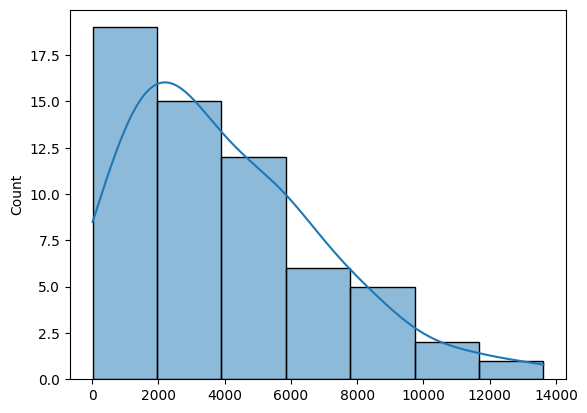

array([3314.01469915, 5876.40094596,   11.78166957, 2530.35776144,
       1465.67875777, 1054.72116597, 1744.65364761, 2821.83218212,
       3172.66044575, 4214.8513656 ])

In [245]:
np.random.seed(1)
lambda_scale = 5000  # escala, vida média em horas
k_shape = 1.5  # forma, <1 pouquissímas falhas, =1 taxa constante (exponencial), >1.5 taxa aumenta, modelando por exemplo desgaste

x = weibull_min.rvs(c=k_shape, scale=lambda_scale, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

In [246]:
weibull_min.cdf(1000,c=k_shape, scale=lambda_scale)  # Qual a probabilidade de falha dessa peça em menos de 1000h?

0.08555935639278299

Você tem 500 peças que foram compradas e instaladas em um lote único (mesma data). Considerando 2000h (cerca de 90 dias), qual estoque de reposição precisa haver para garantir cobrir 90 das falhas nessas próximas 2000h?

In [259]:
weibull_min.cdf(2000,c=k_shape,scale=lambda_scale) * 500 # numero de peças com falha

111.7591534371911

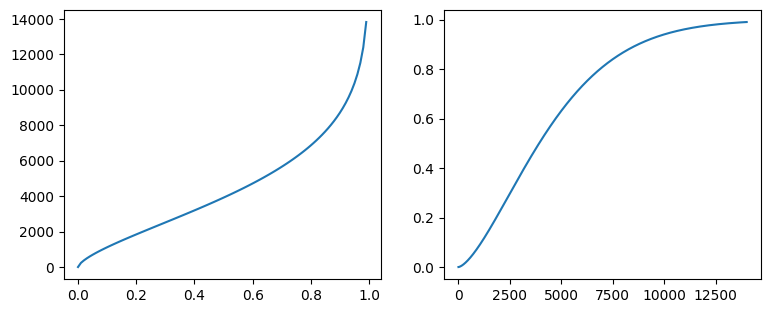

In [258]:
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
plt.plot(np.linspace(0,1,100),weibull_min.ppf(np.linspace(0,1,100),c=k_shape,scale=lambda_scale))
plt.subplot(1,2,2)
plt.plot(np.linspace(0,14000,14000),weibull_min.cdf(np.linspace(0,14000,14000),c=k_shape,scale=lambda_scale))


In [260]:
weibull_min.ppf(0.1,c=k_shape,scale=lambda_scale) # Qual o tempo de vida dos 10% de peças que apresentam falhas mais cedo?

1115.3776281845855

## Teste de Hipótese

Vamos considera que você tem dados de homens e mulheres e deseja testar hipóteses sobre a média de idade de homens e mulheres.

In [266]:
media_homens = 35
media_mulheres = 30
desvio_padrao_homens = 5
desvio_padrao_mulheres = 4
tamanho_amostra = 50

amostra_homens = np.random.normal(media_homens, desvio_padrao_homens, tamanho_amostra)
amostra_mulheres = np.random.normal(media_mulheres, desvio_padrao_mulheres, tamanho_amostra)


In [267]:
t_stat, p_valor = stats.ttest_ind(amostra_homens, amostra_mulheres)

print("Estatística t:", t_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar diferença das médias.")

Estatística t: 7.331517132979003
Valor p: 6.570667908686228e-11

Rejeita a hipótese nula - as médias são estatisticamente diferentes.


In [268]:
from statsmodels.stats.weightstats import ztest
z_stat, p_valor = ztest(amostra_homens, amostra_mulheres, value=0)
# z_stat, p_valor = ztest(amostra_homens, amostra_mulheres, value=0)

print("Estatística z:", z_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar diferença das médias.")

Estatística z: 7.331517132979003
Valor p: 2.275617249010194e-13

Rejeita a hipótese nula - as médias são estatisticamente diferentes.


In [269]:
t_stat, p_valor = stats.ttest_ind(amostra_homens, amostra_mulheres, alternative='greater')

print("Estatística t:", t_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - a média das idades dos homens é estatisticamente maior.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar que a média de idade dos homens é maior.")


Estatística t: 7.331517132979003
Valor p: 3.285333954343114e-11

Rejeita a hipótese nula - a média das idades dos homens é estatisticamente maior.
